In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import os
from tqdm import tqdm
import json
import time
import random
import pickle

In [2]:

from keras.models import Model, Sequential
from keras.layers import Dense, Input,Flatten,BatchNormalization,Conv2D,MaxPooling2D,BatchNormalization
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed

model=Sequential()
model.add(Input(shape=(None,128,96,1)))
model.add(TimeDistributed(Conv2D(filters=128,kernel_size=(5,5),padding="valid")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=128,kernel_size=(5,5),padding="valid")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=64,kernel_size=(3,3),padding="same")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=32,kernel_size=(3,3),padding="same")))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(512,return_sequences=True))
model.add(LSTM(256,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(128))
model.add(Dense(50,activation="softmax"))

In [3]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam( learning_rate=0.01),
              metrics=["accuracy"]) 

In [4]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 124, 92, 128 3328      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 61, 45, 128) 0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 61, 45, 128) 512       
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 57, 41, 128) 409728    
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 28, 20, 128) 0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 28, 20, 128) 512       
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 28, 20, 64)  7

In [5]:
ed=np.zeros((50,50))


In [6]:
for i in range(ed.shape[0]):
    ed[i][i]=1

In [7]:
ed=pd.DataFrame(ed)

In [8]:
ed.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df=pd.read_csv("E:\capstone\code\WLASL-master\WLASL-master\start_kit\data.csv")
df.head()

,gloss,video_id,xmin,ymin,xmax,ymax,fps,frame_end,frame_start,instance_id,signer_id,source,split,url,variation_id
0,book,69241,385,37,885,720,25.0,-1,1,0,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,0
1,book,65225,190,25,489,370,25.0,-1,1,1,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,0
2,book,68011,262,1,652,480,25.0,-1,1,2,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,0
3,book,68208,123,19,516,358,25.0,60,1,3,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0
4,book,68012,95,0,1180,720,25.0,-1,1,4,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,0


In [10]:
words=df.gloss.unique()

In [11]:
len(words)

2000

In [12]:
ed['gloss']=words[:50]

In [13]:
ed.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,gloss
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,book
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drink
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,computer
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,before
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chair


In [14]:
x_train=[]
x_test=[]
x_val=[]
y_train=[]
y_test=[]
y_val=[]
y_words_train=[]
y_words_test=[]
y_words_val=[]


for word in tqdm(words[:50]): 

    for split in os.listdir(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}'.format(word)):
        if split==".DS_Store" or split=='._.DS_Store':
            continue
        try:
            for v in os.listdir(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}\{}'.format(word,split)):
                y_ind=ed[ed['gloss']==word].values[:,:-1].reshape((1,50))
            
                x_ind=np.load(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}\{}\{}'.format(word,split,v))
                gray_scale=[]
                for frame in x_ind:
                    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                    frame=frame.reshape(128,96,1)
                    gray_scale.append(frame)
                gray_scale=np.asarray(gray_scale)
                gray_scale=gray_scale/255
                if(split=="train"):
                    
                    x_train.append(gray_scale)
                    y_train.append(y_ind)
                    y_words_train.append(word)
                elif(split=="test"):
                    x_test.append(gray_scale)
                    y_test.append(y_ind)
                    y_words_test.append(word)
                else:
                    x_val.append(gray_scale)
                    y_val.append(y_ind)
                    y_words_val.append(word)
                
        except Exception as e:
            print("Error:" ,e ,"file",i)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  5.57it/s]


In [15]:
os.listdir(r"E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\book")

['.DS_Store', '._.DS_Store', 'test', 'train', 'val']

In [16]:
len(x_train),len(y_train),len(x_test),len(y_test),len(x_val),len(y_val)

(675, 675, 132, 132, 158, 158)

In [17]:
x_train=np.array(x_train)
x_test=np.array(x_test)
x_val=np.array(x_val)
y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)

In [18]:
from sklearn.utils import shuffle
x_train, y_train,y_words_train = shuffle(x_train, y_train,y_words_train,random_state=0)

In [19]:
x_train[0].shape

(77, 128, 96, 1)

  0%|                                                                                          | 0/675 [00:00<?, ?it/s]

epoch 0
1/1 [==============================] - 0s 5ms/step - loss: 3.6770 - accuracy: 0.0000e+00


  0%|                                                                                | 1/675 [00:12<2:22:05, 12.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9533 - accuracy: 0.0000e+00


  0%|▏                                                                               | 2/675 [00:22<2:11:48, 11.75s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0766 - accuracy: 0.0000e+00


  0%|▎                                                                               | 3/675 [00:32<2:05:15, 11.18s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4675 - accuracy: 0.0000e+00


  1%|▍                                                                               | 4/675 [00:35<1:39:15,  8.88s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7955 - accuracy: 0.0000e+00


  1%|▌                                                                               | 5/675 [00:39<1:23:33,  7.48s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2011 - accuracy: 0.0000e+00


  1%|▋                                                                               | 6/675 [00:43<1:10:47,  6.35s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9588 - accuracy: 0.0000e+00


  1%|▊                                                                               | 7/675 [00:51<1:15:30,  6.78s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5236 - accuracy: 0.0000e+00


  1%|▉                                                                               | 8/675 [00:56<1:10:09,  6.31s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.5459 - accuracy: 0.0000e+00


  1%|█                                                                               | 9/675 [01:01<1:05:03,  5.86s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4225 - accuracy: 0.0000e+00


  1%|█▏                                                                               | 10/675 [01:04<56:32,  5.10s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.5512 - accuracy: 0.0000e+00


  2%|█▎                                                                               | 11/675 [01:10<57:00,  5.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.8637 - accuracy: 0.0000e+00


  2%|█▍                                                                               | 12/675 [01:15<57:53,  5.24s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0272 - accuracy: 0.0000e+00


  2%|█▌                                                                               | 13/675 [01:17<48:17,  4.38s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5624 - accuracy: 0.0000e+00


  2%|█▋                                                                             | 14/675 [01:26<1:01:21,  5.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9340 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 15/675 [01:33<1:06:19,  6.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3111 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 16/675 [01:39<1:07:50,  6.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 2.4936 - accuracy: 0.0000e+00


  3%|█▉                                                                             | 17/675 [01:46<1:09:07,  6.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 2.4382 - accuracy: 0.0000e+00


  3%|██                                                                             | 18/675 [01:52<1:08:30,  6.26s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4486 - accuracy: 0.0000e+00


  3%|██▎                                                                              | 19/675 [01:55<57:53,  5.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.7508 - accuracy: 0.0000e+00


  3%|██▍                                                                              | 20/675 [01:58<49:32,  4.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5624 - accuracy: 0.0000e+00


  3%|██▍                                                                            | 21/675 [02:08<1:08:38,  6.30s/it]

1/1 [==============================] - 0s 2ms/step - loss: 5.0718 - accuracy: 0.0000e+00


  3%|██▌                                                                            | 22/675 [02:14<1:05:26,  6.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9197 - accuracy: 0.0000e+00


  3%|██▊                                                                              | 23/675 [02:16<53:56,  4.96s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3434 - accuracy: 0.0000e+00


  4%|██▉                                                                              | 24/675 [02:21<52:25,  4.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.9878 - accuracy: 0.0000e+00


  4%|███                                                                              | 25/675 [02:24<48:41,  4.50s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.6287 - accuracy: 0.0000e+00


  4%|███                                                                              | 26/675 [02:27<43:14,  4.00s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1809 - accuracy: 0.0000e+00


  4%|███▏                                                                             | 27/675 [02:34<53:14,  4.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5723 - accuracy: 0.0000e+00


  4%|███▎                                                                             | 28/675 [02:37<47:01,  4.36s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.7277 - accuracy: 0.0000e+00


  4%|███▍                                                                             | 29/675 [02:42<47:38,  4.43s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8905 - accuracy: 0.0000e+00


  4%|███▌                                                                             | 30/675 [02:46<46:21,  4.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.6543 - accuracy: 0.0000e+00


  5%|███▋                                                                             | 31/675 [02:50<45:23,  4.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4760 - accuracy: 0.0000e+00


  5%|███▊                                                                             | 32/675 [02:56<51:53,  4.84s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9524 - accuracy: 0.0000e+00


  5%|███▊                                                                           | 33/675 [03:05<1:03:01,  5.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.2261 - accuracy: 0.0000e+00


  5%|███▉                                                                           | 34/675 [03:11<1:04:58,  6.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 5.1857 - accuracy: 0.0000e+00


  5%|████▏                                                                            | 35/675 [03:15<56:42,  5.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 2.8270 - accuracy: 0.0000e+00


  5%|████▏                                                                          | 36/675 [03:22<1:02:30,  5.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2688 - accuracy: 0.0000e+00


  5%|████▎                                                                          | 37/675 [03:27<1:01:37,  5.80s/it]

1/1 [==============================] - 0s 2ms/step - loss: 2.7321 - accuracy: 0.0000e+00


  6%|████▌                                                                            | 38/675 [03:31<54:11,  5.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6435 - accuracy: 0.0000e+00


  6%|████▋                                                                            | 39/675 [03:36<54:10,  5.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.6582 - accuracy: 0.0000e+00


  6%|████▋                                                                          | 40/675 [03:45<1:05:11,  6.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.2624 - accuracy: 0.0000e+00


  6%|████▊                                                                          | 41/675 [03:54<1:15:12,  7.12s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7546 - accuracy: 0.0000e+00


  6%|████▉                                                                          | 42/675 [04:03<1:20:32,  7.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.8334 - accuracy: 0.0000e+00


  6%|█████                                                                          | 43/675 [04:07<1:09:19,  6.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2034 - accuracy: 0.0000e+00


  7%|█████▏                                                                         | 44/675 [04:13<1:08:32,  6.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 2.7694 - accuracy: 0.0000e+00


  7%|█████▎                                                                         | 45/675 [04:19<1:06:02,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5044 - accuracy: 0.0000e+00


  7%|█████▍                                                                         | 46/675 [04:26<1:07:37,  6.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4817 - accuracy: 0.0000e+00


  7%|█████▌                                                                         | 47/675 [04:32<1:05:08,  6.22s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.6902 - accuracy: 0.0000e+00


  7%|█████▊                                                                           | 48/675 [04:35<55:58,  5.36s/it]

1/1 [==============================] - 0s 2ms/step - loss: 2.4035 - accuracy: 0.0000e+00


  7%|█████▉                                                                           | 49/675 [04:38<49:37,  4.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.3885 - accuracy: 0.0000e+00


  7%|██████                                                                           | 50/675 [04:45<55:41,  5.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4318 - accuracy: 0.0000e+00


  8%|██████                                                                           | 51/675 [04:49<52:18,  5.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0496 - accuracy: 0.0000e+00


  8%|██████▏                                                                          | 52/675 [04:54<50:52,  4.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4117 - accuracy: 0.0000e+00


  8%|██████▎                                                                          | 53/675 [05:01<56:57,  5.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2052 - accuracy: 0.0000e+00


  8%|██████▍                                                                          | 54/675 [05:07<59:31,  5.75s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.6923 - accuracy: 0.0000e+00


  8%|██████▌                                                                          | 55/675 [05:10<50:16,  4.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3520 - accuracy: 0.0000e+00


  8%|██████▋                                                                          | 56/675 [05:15<52:01,  5.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6042 - accuracy: 0.0000e+00


  8%|██████▊                                                                          | 57/675 [05:21<52:59,  5.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5081 - accuracy: 0.0000e+00


  9%|██████▉                                                                          | 58/675 [05:27<57:28,  5.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0932 - accuracy: 0.0000e+00


  9%|███████                                                                          | 59/675 [05:33<57:44,  5.62s/it]

1/1 [==============================] - 0s 6ms/step - loss: 4.7720 - accuracy: 0.0000e+00


  9%|███████▏                                                                         | 60/675 [05:38<53:48,  5.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 5.1213 - accuracy: 0.0000e+00


  9%|███████▏                                                                       | 61/675 [05:47<1:08:02,  6.65s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.7576 - accuracy: 0.0000e+00


  9%|███████▍                                                                         | 62/675 [05:50<56:09,  5.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.8825 - accuracy: 0.0000e+00


  9%|███████▌                                                                         | 63/675 [05:57<58:32,  5.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.7360 - accuracy: 0.0000e+00


  9%|███████▋                                                                         | 64/675 [06:02<57:48,  5.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7824 - accuracy: 0.0000e+00


 10%|███████▊                                                                         | 65/675 [06:07<56:03,  5.51s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.5790 - accuracy: 0.0000e+00


 10%|███████▉                                                                         | 66/675 [06:12<53:06,  5.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3134 - accuracy: 0.0000e+00


 10%|████████                                                                         | 67/675 [06:16<48:59,  4.84s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.2267 - accuracy: 0.0000e+00


 10%|████████▏                                                                        | 68/675 [06:21<49:41,  4.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6919 - accuracy: 0.0000e+00


 10%|████████▎                                                                        | 69/675 [06:28<58:06,  5.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6171 - accuracy: 0.0000e+00


 10%|████████▍                                                                        | 70/675 [06:31<47:44,  4.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6281 - accuracy: 0.0000e+00


 11%|████████▌                                                                        | 71/675 [06:34<43:43,  4.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7654 - accuracy: 0.0000e+00


 11%|████████▍                                                                      | 72/675 [06:47<1:09:57,  6.96s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.6839 - accuracy: 0.0000e+00


 11%|████████▌                                                                      | 73/675 [06:53<1:06:45,  6.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9766 - accuracy: 0.0000e+00


 11%|████████▉                                                                        | 74/675 [06:56<55:30,  5.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3635 - accuracy: 0.0000e+00


 11%|████████▊                                                                      | 75/675 [07:03<1:00:04,  6.01s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.7795 - accuracy: 0.0000e+00


 11%|████████▉                                                                      | 76/675 [07:12<1:08:38,  6.88s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.2513 - accuracy: 0.0000e+00


 11%|█████████                                                                      | 77/675 [07:19<1:09:24,  6.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4432 - accuracy: 0.0000e+00


 12%|█████████▏                                                                     | 78/675 [07:24<1:01:30,  6.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9568 - accuracy: 0.0000e+00


 12%|█████████▍                                                                       | 79/675 [07:28<56:17,  5.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2318 - accuracy: 0.0000e+00


 12%|█████████▌                                                                       | 80/675 [07:31<48:27,  4.89s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.3454 - accuracy: 0.0000e+00


 12%|█████████▋                                                                       | 81/675 [07:36<48:24,  4.89s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8158 - accuracy: 0.0000e+00


 12%|█████████▊                                                                       | 82/675 [07:40<44:07,  4.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1236 - accuracy: 0.0000e+00


 12%|█████████▉                                                                       | 83/675 [07:47<51:37,  5.23s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9628 - accuracy: 0.0000e+00


 12%|█████████▊                                                                     | 84/675 [07:56<1:03:22,  6.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6957 - accuracy: 0.0000e+00


 13%|█████████▉                                                                     | 85/675 [08:01<1:00:15,  6.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.1503 - accuracy: 0.0000e+00


 13%|██████████▎                                                                      | 86/675 [08:06<54:58,  5.60s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6889 - accuracy: 0.0000e+00


 13%|██████████▍                                                                      | 87/675 [08:12<55:39,  5.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3249 - accuracy: 0.0000e+00


 13%|██████████▌                                                                      | 88/675 [08:17<54:35,  5.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0518 - accuracy: 0.0000e+00


 13%|██████████▋                                                                      | 89/675 [08:23<56:04,  5.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.7243 - accuracy: 0.0000e+00


 13%|██████████▊                                                                      | 90/675 [08:29<56:22,  5.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6179 - accuracy: 0.0000e+00


 13%|██████████▉                                                                      | 91/675 [08:35<58:12,  5.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3252 - accuracy: 0.0000e+00


 14%|██████████▊                                                                    | 92/675 [08:42<1:00:17,  6.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7070 - accuracy: 0.0000e+00


 14%|███████████▏                                                                     | 93/675 [08:47<55:06,  5.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9342 - accuracy: 0.0000e+00


 14%|███████████▎                                                                     | 94/675 [08:51<51:26,  5.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1569 - accuracy: 0.0000e+00


 14%|███████████▍                                                                     | 95/675 [08:54<43:50,  4.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.2387 - accuracy: 0.0000e+00


 14%|███████████▌                                                                     | 96/675 [08:56<37:43,  3.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0612 - accuracy: 0.0000e+00


 14%|███████████▋                                                                     | 97/675 [09:02<42:07,  4.37s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1187 - accuracy: 0.0000e+00


 15%|███████████▊                                                                     | 98/675 [09:06<40:58,  4.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7661 - accuracy: 0.0000e+00


 15%|███████████▉                                                                     | 99/675 [09:12<47:29,  4.95s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4946 - accuracy: 0.0000e+00


 15%|███████████▊                                                                    | 100/675 [09:15<42:24,  4.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6224 - accuracy: 0.0000e+00


 15%|███████████▉                                                                    | 101/675 [09:22<48:32,  5.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4054 - accuracy: 0.0000e+00


 15%|████████████                                                                    | 102/675 [09:26<44:55,  4.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.3400 - accuracy: 0.0000e+00


 15%|████████████▏                                                                   | 103/675 [09:34<53:29,  5.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7679 - accuracy: 0.0000e+00


 15%|████████████▎                                                                   | 104/675 [09:38<50:32,  5.31s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.8379 - accuracy: 0.0000e+00


 16%|████████████▍                                                                   | 105/675 [09:41<43:15,  4.55s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.6470 - accuracy: 0.0000e+00


 16%|████████████▌                                                                   | 106/675 [09:47<48:10,  5.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7905 - accuracy: 0.0000e+00


 16%|████████████▋                                                                   | 107/675 [09:50<41:47,  4.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3419 - accuracy: 0.0000e+00


 16%|████████████▊                                                                   | 108/675 [09:58<51:28,  5.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1338 - accuracy: 0.0000e+00


 16%|████████████▉                                                                   | 109/675 [10:02<48:41,  5.16s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7240 - accuracy: 0.0000e+00


 16%|█████████████                                                                   | 110/675 [10:05<41:55,  4.45s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.6888 - accuracy: 0.0000e+00


 16%|█████████████▏                                                                  | 111/675 [10:12<46:55,  4.99s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8108 - accuracy: 0.0000e+00


 17%|█████████████▎                                                                  | 112/675 [10:17<48:16,  5.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6767 - accuracy: 0.0000e+00


 17%|█████████████▍                                                                  | 113/675 [10:22<46:58,  5.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3471 - accuracy: 0.0000e+00


 17%|█████████████▌                                                                  | 114/675 [10:30<57:04,  6.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9381 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 115/675 [10:33<47:40,  5.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2272 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 116/675 [10:35<38:44,  4.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5425 - accuracy: 0.0000e+00


 17%|█████████████▊                                                                  | 117/675 [10:43<49:43,  5.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9273 - accuracy: 0.0000e+00


 17%|█████████████▉                                                                  | 118/675 [10:49<51:17,  5.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6020 - accuracy: 0.0000e+00


 18%|██████████████                                                                  | 119/675 [10:56<53:39,  5.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0547 - accuracy: 0.0000e+00


 18%|██████████████▏                                                                 | 120/675 [10:58<44:22,  4.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4126 - accuracy: 0.0000e+00


 18%|██████████████▎                                                                 | 121/675 [11:02<40:51,  4.43s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.5491 - accuracy: 0.0000e+00


 18%|██████████████▍                                                                 | 122/675 [11:07<43:19,  4.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9943 - accuracy: 0.0000e+00


 18%|██████████████▌                                                                 | 123/675 [11:12<45:11,  4.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8174 - accuracy: 0.0000e+00


 18%|██████████████▋                                                                 | 124/675 [11:16<42:42,  4.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4597 - accuracy: 0.0000e+00


 19%|██████████████▊                                                                 | 125/675 [11:20<40:25,  4.41s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2771 - accuracy: 0.0000e+00


 19%|██████████████▉                                                                 | 126/675 [11:25<41:26,  4.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6992 - accuracy: 0.0000e+00


 19%|███████████████                                                                 | 127/675 [11:30<42:15,  4.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5665 - accuracy: 0.0000e+00


 19%|███████████████▏                                                                | 128/675 [11:39<54:06,  5.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.2902 - accuracy: 0.0000e+00


 19%|███████████████▎                                                                | 129/675 [11:43<49:13,  5.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6485 - accuracy: 0.0000e+00


 19%|███████████████▍                                                                | 130/675 [11:47<44:29,  4.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6695 - accuracy: 0.0000e+00


 19%|███████████████▌                                                                | 131/675 [11:50<40:55,  4.51s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9923 - accuracy: 0.0000e+00


 20%|███████████████▋                                                                | 132/675 [11:53<35:50,  3.96s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.5903 - accuracy: 0.0000e+00


 20%|███████████████▊                                                                | 133/675 [12:00<43:18,  4.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2052 - accuracy: 0.0000e+00


 20%|███████████████▉                                                                | 134/675 [12:06<46:07,  5.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3268 - accuracy: 0.0000e+00


 20%|████████████████                                                                | 135/675 [12:11<47:04,  5.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3097 - accuracy: 0.0000e+00


 20%|████████████████                                                                | 136/675 [12:20<56:21,  6.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5176 - accuracy: 0.0000e+00


 20%|████████████████▏                                                               | 137/675 [12:24<49:27,  5.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4914 - accuracy: 0.0000e+00


 20%|███████████████▉                                                              | 138/675 [12:34<1:01:33,  6.88s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1682 - accuracy: 0.0000e+00


 21%|████████████████▍                                                               | 139/675 [12:39<58:18,  6.53s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8851 - accuracy: 0.0000e+00


 21%|████████████████▌                                                               | 140/675 [12:46<57:33,  6.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0643 - accuracy: 0.0000e+00


 21%|████████████████▎                                                             | 141/675 [12:53<1:00:51,  6.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0221 - accuracy: 0.0000e+00


 21%|████████████████▍                                                             | 142/675 [13:02<1:04:19,  7.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.5392 - accuracy: 0.0000e+00


 21%|████████████████▌                                                             | 143/675 [13:10<1:06:14,  7.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2506 - accuracy: 0.0000e+00


 21%|████████████████▋                                                             | 144/675 [13:15<1:00:37,  6.85s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.7851 - accuracy: 0.0000e+00


 21%|█████████████████▏                                                              | 145/675 [13:21<58:40,  6.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7698 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                              | 146/675 [13:23<45:32,  5.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0333 - accuracy: 0.0000e+00


 22%|█████████████████▍                                                              | 147/675 [13:27<41:58,  4.77s/it]

1/1 [==============================] - 0s 2ms/step - loss: 5.0445 - accuracy: 0.0000e+00


 22%|█████████████████▌                                                              | 148/675 [13:31<40:25,  4.60s/it]

1/1 [==============================] - 0s 2ms/step - loss: 2.8922 - accuracy: 0.0000e+00


 22%|█████████████████▋                                                              | 149/675 [13:34<36:29,  4.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8570 - accuracy: 0.0000e+00


 22%|█████████████████▊                                                              | 150/675 [13:43<48:11,  5.51s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0984 - accuracy: 0.0000e+00


 22%|█████████████████▉                                                              | 151/675 [13:46<41:47,  4.79s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6027 - accuracy: 0.0000e+00


 23%|██████████████████                                                              | 152/675 [13:52<45:48,  5.26s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1199 - accuracy: 0.0000e+00


 23%|██████████████████▏                                                             | 153/675 [13:55<39:45,  4.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2074 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 154/675 [14:00<39:31,  4.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5074 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 155/675 [14:02<33:43,  3.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5697 - accuracy: 0.0000e+00


 23%|██████████████████▍                                                             | 156/675 [14:04<29:42,  3.43s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5534 - accuracy: 0.0000e+00


 23%|██████████████████▌                                                             | 157/675 [14:10<36:37,  4.24s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.4991 - accuracy: 0.0000e+00


 23%|██████████████████▋                                                             | 158/675 [14:16<40:49,  4.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7817 - accuracy: 0.0000e+00


 24%|██████████████████▊                                                             | 159/675 [14:20<38:10,  4.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6959 - accuracy: 0.0000e+00


 24%|██████████████████▉                                                             | 160/675 [14:26<40:59,  4.78s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.3278 - accuracy: 1.0000


 24%|███████████████████                                                             | 161/675 [14:32<44:29,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0823 - accuracy: 0.0000e+00


 24%|███████████████████▏                                                            | 162/675 [14:33<34:53,  4.08s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8164 - accuracy: 0.0000e+00


 24%|███████████████████▎                                                            | 163/675 [14:38<36:51,  4.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7426 - accuracy: 0.0000e+00


 24%|███████████████████▍                                                            | 164/675 [14:46<45:47,  5.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2200 - accuracy: 0.0000e+00


 24%|███████████████████▌                                                            | 165/675 [14:50<42:15,  4.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7610 - accuracy: 0.0000e+00


 25%|███████████████████▋                                                            | 166/675 [14:57<47:13,  5.57s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4969 - accuracy: 0.0000e+00


 25%|███████████████████▊                                                            | 167/675 [15:00<41:20,  4.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7583 - accuracy: 0.0000e+00


 25%|███████████████████▉                                                            | 168/675 [15:05<40:51,  4.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3248 - accuracy: 0.0000e+00


 25%|████████████████████                                                            | 169/675 [15:11<43:26,  5.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7838 - accuracy: 0.0000e+00


 25%|████████████████████▏                                                           | 170/675 [15:19<49:34,  5.89s/it]

1/1 [==============================] - 0s 6ms/step - loss: 4.1791 - accuracy: 0.0000e+00


 25%|████████████████████▎                                                           | 171/675 [15:23<47:04,  5.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3237 - accuracy: 0.0000e+00


 25%|████████████████████▍                                                           | 172/675 [15:29<46:44,  5.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.3312 - accuracy: 0.0000e+00


 26%|████████████████████▌                                                           | 173/675 [15:34<45:33,  5.44s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5046 - accuracy: 0.0000e+00


 26%|████████████████████▌                                                           | 174/675 [15:41<49:48,  5.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1865 - accuracy: 0.0000e+00


 26%|████████████████████▋                                                           | 175/675 [15:42<37:24,  4.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.5106 - accuracy: 0.0000e+00


 26%|████████████████████▊                                                           | 176/675 [15:48<41:06,  4.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4229 - accuracy: 0.0000e+00


 26%|████████████████████▉                                                           | 177/675 [15:53<39:20,  4.74s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9157 - accuracy: 0.0000e+00


 26%|█████████████████████                                                           | 178/675 [15:56<35:59,  4.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0461 - accuracy: 0.0000e+00


 27%|█████████████████████▏                                                          | 179/675 [16:00<33:49,  4.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1206 - accuracy: 0.0000e+00


 27%|█████████████████████▎                                                          | 180/675 [16:04<35:04,  4.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6173 - accuracy: 0.0000e+00


 27%|█████████████████████▍                                                          | 181/675 [16:09<37:28,  4.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6439 - accuracy: 0.0000e+00


 27%|█████████████████████▌                                                          | 182/675 [16:12<33:12,  4.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9939 - accuracy: 0.0000e+00


 27%|█████████████████████▋                                                          | 183/675 [16:17<35:25,  4.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8289 - accuracy: 0.0000e+00


 27%|█████████████████████▊                                                          | 184/675 [16:24<42:14,  5.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1745 - accuracy: 0.0000e+00


 27%|█████████████████████▉                                                          | 185/675 [16:30<42:29,  5.20s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8613 - accuracy: 0.0000e+00


 28%|██████████████████████                                                          | 186/675 [16:32<34:38,  4.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4120 - accuracy: 0.0000e+00


 28%|██████████████████████▏                                                         | 187/675 [16:39<43:10,  5.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3630 - accuracy: 0.0000e+00


 28%|██████████████████████▎                                                         | 188/675 [16:44<40:47,  5.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6362 - accuracy: 0.0000e+00


 28%|██████████████████████▍                                                         | 189/675 [16:53<50:54,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5143 - accuracy: 0.0000e+00


 28%|██████████████████████▌                                                         | 190/675 [16:56<41:59,  5.20s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2722 - accuracy: 0.0000e+00


 28%|██████████████████████▋                                                         | 191/675 [17:01<42:48,  5.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0785 - accuracy: 0.0000e+00


 28%|██████████████████████▊                                                         | 192/675 [17:08<46:22,  5.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0213 - accuracy: 0.0000e+00


 29%|██████████████████████▊                                                         | 193/675 [17:12<42:25,  5.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0604 - accuracy: 0.0000e+00


 29%|██████████████████████▉                                                         | 194/675 [17:17<41:57,  5.23s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0951 - accuracy: 0.0000e+00


 29%|███████████████████████                                                         | 195/675 [17:24<46:09,  5.77s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1841 - accuracy: 0.0000e+00


 29%|███████████████████████▏                                                        | 196/675 [17:30<45:05,  5.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7598 - accuracy: 0.0000e+00


 29%|███████████████████████▎                                                        | 197/675 [17:35<44:32,  5.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7184 - accuracy: 0.0000e+00


 29%|███████████████████████▍                                                        | 198/675 [17:43<50:33,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5217 - accuracy: 0.0000e+00


 29%|███████████████████████▌                                                        | 199/675 [17:48<45:30,  5.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0288 - accuracy: 0.0000e+00


 30%|███████████████████████▋                                                        | 200/675 [17:53<45:34,  5.76s/it]

1/1 [==============================] - 0s 2ms/step - loss: 5.1071 - accuracy: 0.0000e+00


 30%|███████████████████████▊                                                        | 201/675 [17:57<40:12,  5.09s/it]

1/1 [==============================] - 0s 1ms/step - loss: 4.2139 - accuracy: 0.0000e+00


 30%|███████████████████████▉                                                        | 202/675 [18:03<42:44,  5.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1185 - accuracy: 0.0000e+00


 30%|████████████████████████                                                        | 203/675 [18:08<41:21,  5.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9204 - accuracy: 0.0000e+00


 30%|████████████████████████▏                                                       | 204/675 [18:16<46:55,  5.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1165 - accuracy: 0.0000e+00


 30%|████████████████████████▎                                                       | 205/675 [18:22<47:24,  6.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4917 - accuracy: 1.0000


 31%|████████████████████████▍                                                       | 206/675 [18:28<48:03,  6.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9254 - accuracy: 0.0000e+00


 31%|████████████████████████▌                                                       | 207/675 [18:34<46:32,  5.97s/it]

1/1 [==============================] - 0s 966us/step - loss: 4.0267 - accuracy: 0.0000e+00


 31%|████████████████████████                                                      | 208/675 [18:49<1:07:11,  8.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7210 - accuracy: 0.0000e+00


 31%|████████████████████████▊                                                       | 209/675 [18:53<56:47,  7.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8451 - accuracy: 0.0000e+00


 31%|████████████████████████▎                                                     | 210/675 [19:02<1:00:05,  7.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0371 - accuracy: 0.0000e+00


 31%|█████████████████████████                                                       | 211/675 [19:04<46:39,  6.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1888 - accuracy: 0.0000e+00


 31%|█████████████████████████▏                                                      | 212/675 [19:09<44:23,  5.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1353 - accuracy: 0.0000e+00


 32%|█████████████████████████▏                                                      | 213/675 [19:13<40:57,  5.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1691 - accuracy: 0.0000e+00


 32%|█████████████████████████▎                                                      | 214/675 [19:17<37:50,  4.93s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7784 - accuracy: 0.0000e+00


 32%|█████████████████████████▍                                                      | 215/675 [19:21<36:19,  4.74s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0745 - accuracy: 0.0000e+00


 32%|█████████████████████████▌                                                      | 216/675 [19:28<39:19,  5.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0731 - accuracy: 0.0000e+00


 32%|█████████████████████████▋                                                      | 217/675 [19:33<40:20,  5.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6274 - accuracy: 0.0000e+00


 32%|█████████████████████████▊                                                      | 218/675 [19:36<34:47,  4.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7218 - accuracy: 0.0000e+00


 32%|█████████████████████████▉                                                      | 219/675 [19:41<35:56,  4.73s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0107 - accuracy: 0.0000e+00


 33%|██████████████████████████                                                      | 220/675 [19:44<32:33,  4.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8276 - accuracy: 0.0000e+00


 33%|██████████████████████████▏                                                     | 221/675 [19:48<30:02,  3.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0076 - accuracy: 0.0000e+00


 33%|██████████████████████████▎                                                     | 222/675 [19:51<28:38,  3.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9608 - accuracy: 0.0000e+00


 33%|██████████████████████████▍                                                     | 223/675 [19:59<38:00,  5.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6214 - accuracy: 0.0000e+00


 33%|██████████████████████████▌                                                     | 224/675 [20:04<38:09,  5.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3944 - accuracy: 0.0000e+00


 33%|██████████████████████████▋                                                     | 225/675 [20:11<41:29,  5.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8034 - accuracy: 0.0000e+00


 33%|██████████████████████████▊                                                     | 226/675 [20:13<34:57,  4.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8454 - accuracy: 0.0000e+00


 34%|██████████████████████████▉                                                     | 227/675 [20:24<48:26,  6.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1269 - accuracy: 0.0000e+00


 34%|███████████████████████████                                                     | 228/675 [20:30<47:14,  6.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9952 - accuracy: 0.0000e+00


 34%|███████████████████████████▏                                                    | 229/675 [20:36<46:05,  6.20s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7546 - accuracy: 0.0000e+00


 34%|███████████████████████████▎                                                    | 230/675 [20:43<48:42,  6.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9040 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 231/675 [20:47<42:57,  5.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8256 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 232/675 [20:50<35:02,  4.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8546 - accuracy: 0.0000e+00


 35%|███████████████████████████▌                                                    | 233/675 [20:56<37:10,  5.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5761 - accuracy: 1.0000


 35%|███████████████████████████▋                                                    | 234/675 [21:00<36:56,  5.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0020 - accuracy: 0.0000e+00


 35%|███████████████████████████▊                                                    | 235/675 [21:08<42:30,  5.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0231 - accuracy: 0.0000e+00


 35%|███████████████████████████▉                                                    | 236/675 [21:15<44:42,  6.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5739 - accuracy: 0.0000e+00


 35%|████████████████████████████                                                    | 237/675 [21:22<47:32,  6.51s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0139 - accuracy: 0.0000e+00


 35%|████████████████████████████▏                                                   | 238/675 [21:28<45:49,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8918 - accuracy: 0.0000e+00


 35%|████████████████████████████▎                                                   | 239/675 [21:32<41:05,  5.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9689 - accuracy: 0.0000e+00


 36%|████████████████████████████▍                                                   | 240/675 [21:35<34:26,  4.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9160 - accuracy: 0.0000e+00


 36%|████████████████████████████▌                                                   | 241/675 [21:37<29:07,  4.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9616 - accuracy: 0.0000e+00


 36%|████████████████████████████▋                                                   | 242/675 [21:43<31:49,  4.41s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1041 - accuracy: 0.0000e+00


 36%|████████████████████████████▊                                                   | 243/675 [21:47<32:18,  4.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8197 - accuracy: 0.0000e+00


 36%|████████████████████████████▉                                                   | 244/675 [21:53<35:47,  4.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0018 - accuracy: 0.0000e+00


 36%|█████████████████████████████                                                   | 245/675 [21:59<37:00,  5.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8202 - accuracy: 0.0000e+00


 36%|█████████████████████████████▏                                                  | 246/675 [22:07<42:50,  5.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4722 - accuracy: 1.0000


 37%|█████████████████████████████▎                                                  | 247/675 [22:16<50:03,  7.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0805 - accuracy: 0.0000e+00


 37%|█████████████████████████████▍                                                  | 248/675 [22:23<49:59,  7.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1255 - accuracy: 0.0000e+00


 37%|█████████████████████████████▌                                                  | 249/675 [22:34<56:51,  8.01s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8364 - accuracy: 0.0000e+00


 37%|█████████████████████████████▋                                                  | 250/675 [22:41<55:17,  7.81s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0534 - accuracy: 0.0000e+00


 37%|█████████████████████████████▋                                                  | 251/675 [22:47<51:28,  7.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1924 - accuracy: 0.0000e+00


 37%|█████████████████████████████▊                                                  | 252/675 [22:50<41:48,  5.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9980 - accuracy: 0.0000e+00


 37%|█████████████████████████████▉                                                  | 253/675 [22:53<35:37,  5.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1739 - accuracy: 0.0000e+00


 38%|██████████████████████████████                                                  | 254/675 [22:58<36:37,  5.22s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8933 - accuracy: 0.0000e+00


 38%|██████████████████████████████▏                                                 | 255/675 [23:06<42:06,  6.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2071 - accuracy: 0.0000e+00


 38%|██████████████████████████████▎                                                 | 256/675 [23:14<46:08,  6.61s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8200 - accuracy: 0.0000e+00


 38%|██████████████████████████████▍                                                 | 257/675 [23:19<41:57,  6.02s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0902 - accuracy: 0.0000e+00


 38%|██████████████████████████████▌                                                 | 258/675 [23:23<38:05,  5.48s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8708 - accuracy: 0.0000e+00


 38%|██████████████████████████████▋                                                 | 259/675 [23:30<39:55,  5.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5411 - accuracy: 0.0000e+00


 39%|██████████████████████████████▊                                                 | 260/675 [23:35<38:59,  5.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0276 - accuracy: 0.0000e+00


 39%|██████████████████████████████▉                                                 | 261/675 [23:38<32:29,  4.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9372 - accuracy: 0.0000e+00


 39%|███████████████████████████████                                                 | 262/675 [23:48<43:20,  6.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9753 - accuracy: 0.0000e+00


 39%|███████████████████████████████▏                                                | 263/675 [23:55<44:56,  6.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7631 - accuracy: 0.0000e+00


 39%|███████████████████████████████▎                                                | 264/675 [24:01<43:50,  6.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9005 - accuracy: 0.0000e+00


 39%|███████████████████████████████▍                                                | 265/675 [24:07<43:35,  6.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0499 - accuracy: 0.0000e+00


 39%|███████████████████████████████▌                                                | 266/675 [24:12<40:47,  5.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0803 - accuracy: 0.0000e+00


 40%|███████████████████████████████▋                                                | 267/675 [24:15<33:30,  4.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0416 - accuracy: 0.0000e+00


 40%|███████████████████████████████▊                                                | 268/675 [24:21<35:47,  5.28s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8711 - accuracy: 0.0000e+00


 40%|███████████████████████████████▉                                                | 269/675 [24:26<36:15,  5.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8727 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 270/675 [24:28<29:12,  4.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9493 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 271/675 [24:37<38:37,  5.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0142 - accuracy: 0.0000e+00


 40%|████████████████████████████████▏                                               | 272/675 [24:39<30:12,  4.50s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1954 - accuracy: 0.0000e+00


 40%|████████████████████████████████▎                                               | 273/675 [24:50<44:38,  6.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7349 - accuracy: 0.0000e+00


 41%|████████████████████████████████▍                                               | 274/675 [24:55<41:16,  6.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2588 - accuracy: 0.0000e+00


 41%|████████████████████████████████▌                                               | 275/675 [25:07<51:24,  7.71s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1044 - accuracy: 0.0000e+00


 41%|████████████████████████████████▋                                               | 276/675 [25:13<47:28,  7.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8141 - accuracy: 0.0000e+00


 41%|████████████████████████████████▊                                               | 277/675 [25:22<52:28,  7.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9888 - accuracy: 0.0000e+00


 41%|████████████████████████████████▉                                               | 278/675 [25:29<50:39,  7.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9778 - accuracy: 0.0000e+00


 41%|█████████████████████████████████                                               | 279/675 [25:38<53:02,  8.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7638 - accuracy: 0.0000e+00


 41%|█████████████████████████████████▏                                              | 280/675 [25:44<47:45,  7.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0560 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▎                                              | 281/675 [25:47<40:33,  6.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0355 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▍                                              | 282/675 [25:55<42:35,  6.50s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8493 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▌                                              | 283/675 [25:58<36:38,  5.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0704 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▋                                              | 284/675 [26:02<33:18,  5.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3416 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▊                                              | 285/675 [26:05<29:08,  4.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9339 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▉                                              | 286/675 [26:10<30:04,  4.64s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9711 - accuracy: 0.0000e+00


 43%|██████████████████████████████████                                              | 287/675 [26:13<26:16,  4.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8319 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▏                                             | 288/675 [26:20<32:41,  5.07s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7233 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 289/675 [26:24<30:25,  4.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7886 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 290/675 [26:28<28:10,  4.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0221 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▍                                             | 291/675 [26:35<34:15,  5.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0795 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▌                                             | 292/675 [26:40<32:43,  5.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9910 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▋                                             | 293/675 [26:46<34:00,  5.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7528 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▊                                             | 294/675 [26:52<36:16,  5.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7690 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▉                                             | 295/675 [26:59<38:35,  6.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0629 - accuracy: 0.0000e+00


 44%|███████████████████████████████████                                             | 296/675 [27:08<43:04,  6.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0575 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▏                                            | 297/675 [27:14<40:45,  6.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1524 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▎                                            | 298/675 [27:24<48:06,  7.66s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8924 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▍                                            | 299/675 [27:35<54:06,  8.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8685 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▌                                            | 300/675 [27:42<50:11,  8.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1372 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▋                                            | 301/675 [27:52<53:56,  8.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7796 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▊                                            | 302/675 [27:57<47:04,  7.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9096 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▉                                            | 303/675 [28:03<44:38,  7.20s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0714 - accuracy: 0.0000e+00


 45%|████████████████████████████████████                                            | 304/675 [28:11<45:28,  7.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0471 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▏                                           | 305/675 [28:14<38:24,  6.23s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8289 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▎                                           | 306/675 [28:18<32:53,  5.35s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0489 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▍                                           | 307/675 [28:20<27:54,  4.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9477 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 308/675 [28:26<29:21,  4.80s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0115 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 309/675 [28:32<31:56,  5.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9908 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▋                                           | 310/675 [28:37<31:59,  5.26s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9869 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▊                                           | 311/675 [28:42<31:21,  5.17s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9805 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▉                                           | 312/675 [28:50<35:33,  5.88s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9469 - accuracy: 0.0000e+00


 46%|█████████████████████████████████████                                           | 313/675 [28:59<40:56,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9278 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▏                                          | 314/675 [29:03<36:10,  6.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0873 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▎                                          | 315/675 [29:07<32:02,  5.34s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9928 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▍                                          | 316/675 [29:16<38:16,  6.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6376 - accuracy: 1.0000


 47%|█████████████████████████████████████▌                                          | 317/675 [29:25<42:55,  7.19s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9725 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▋                                          | 318/675 [29:30<39:30,  6.64s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9059 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▊                                          | 319/675 [29:35<36:50,  6.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8701 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▉                                          | 320/675 [29:41<36:46,  6.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9129 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████                                          | 321/675 [29:49<39:09,  6.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9637 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▏                                         | 322/675 [29:52<32:12,  5.47s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.8009 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▎                                         | 323/675 [30:03<41:41,  7.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9425 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▍                                         | 324/675 [30:06<34:26,  5.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8576 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▌                                         | 325/675 [30:12<34:48,  5.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1064 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▋                                         | 326/675 [30:14<28:37,  4.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0010 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▊                                         | 327/675 [30:21<32:25,  5.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9947 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▊                                         | 328/675 [30:28<33:55,  5.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0274 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▉                                         | 329/675 [30:31<28:42,  4.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7731 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████                                         | 330/675 [30:37<30:10,  5.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0045 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▏                                        | 331/675 [30:45<34:27,  6.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8957 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▎                                        | 332/675 [30:52<36:49,  6.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7913 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▍                                        | 333/675 [30:55<30:54,  5.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0118 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                        | 334/675 [31:02<33:33,  5.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0173 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▋                                        | 335/675 [31:09<35:52,  6.33s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8501 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▊                                        | 336/675 [31:14<33:29,  5.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0813 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▉                                        | 337/675 [31:22<35:33,  6.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6472 - accuracy: 1.0000


 50%|████████████████████████████████████████                                        | 338/675 [31:25<30:28,  5.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1133 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▏                                       | 339/675 [31:28<26:09,  4.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8978 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▎                                       | 340/675 [31:33<26:24,  4.73s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8388 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▍                                       | 341/675 [31:40<30:18,  5.44s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7079 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▌                                       | 342/675 [31:42<24:21,  4.39s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0653 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▋                                       | 343/675 [31:46<23:10,  4.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9552 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▊                                       | 344/675 [31:50<24:24,  4.43s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8014 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▉                                       | 345/675 [31:57<28:07,  5.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2415 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████                                       | 346/675 [32:04<30:22,  5.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0448 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████▏                                      | 347/675 [32:09<29:25,  5.38s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0953 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▏                                      | 348/675 [32:15<30:11,  5.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2145 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▎                                      | 349/675 [32:19<27:21,  5.04s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9628 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▍                                      | 350/675 [32:26<30:28,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8919 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▌                                      | 351/675 [32:30<27:51,  5.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9186 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▋                                      | 352/675 [32:32<23:06,  4.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9812 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▊                                      | 353/675 [32:37<24:40,  4.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1312 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▉                                      | 354/675 [32:40<21:08,  3.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0968 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████                                      | 355/675 [32:49<29:26,  5.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9479 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▏                                     | 356/675 [32:55<31:04,  5.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9008 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▎                                     | 357/675 [32:59<26:46,  5.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9932 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▍                                     | 358/675 [33:06<29:38,  5.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9854 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▌                                     | 359/675 [33:12<30:09,  5.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9906 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▋                                     | 360/675 [33:15<27:16,  5.20s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8320 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▊                                     | 361/675 [33:21<27:50,  5.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0309 - accuracy: 0.0000e+00


 54%|██████████████████████████████████████████▉                                     | 362/675 [33:31<34:21,  6.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8410 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████                                     | 363/675 [33:36<33:07,  6.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8526 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▏                                    | 364/675 [33:45<36:04,  6.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9303 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▎                                    | 365/675 [33:52<36:18,  7.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0556 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 366/675 [33:54<28:27,  5.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9171 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 367/675 [34:01<30:47,  6.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9193 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▌                                    | 368/675 [34:11<35:53,  7.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9392 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▋                                    | 369/675 [34:15<31:23,  6.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9524 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▊                                    | 370/675 [34:19<28:51,  5.68s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7912 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▉                                    | 371/675 [34:21<23:31,  4.64s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9611 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████                                    | 372/675 [34:27<25:21,  5.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9399 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▏                                   | 373/675 [34:33<26:31,  5.27s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9352 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▎                                   | 374/675 [34:38<25:51,  5.15s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9915 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▍                                   | 375/675 [34:41<22:13,  4.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7966 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▌                                   | 376/675 [34:44<20:48,  4.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9855 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▋                                   | 377/675 [34:52<25:26,  5.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9958 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▊                                   | 378/675 [34:55<22:16,  4.50s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9912 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▉                                   | 379/675 [35:03<28:02,  5.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8171 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████                                   | 380/675 [35:09<28:38,  5.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9721 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████▏                                  | 381/675 [35:15<27:43,  5.66s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9649 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▎                                  | 382/675 [35:21<28:19,  5.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9590 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▍                                  | 383/675 [35:25<25:35,  5.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7991 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▌                                  | 384/675 [35:34<30:31,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8531 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 385/675 [35:45<37:16,  7.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9038 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 386/675 [35:53<37:40,  7.82s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8734 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▊                                  | 387/675 [36:00<36:30,  7.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9337 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▉                                  | 388/675 [36:08<37:39,  7.87s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9291 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████                                  | 389/675 [36:12<31:04,  6.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9285 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▏                                 | 390/675 [36:16<27:33,  5.80s/it]

1/1 [==============================] - 0s 1ms/step - loss: 4.0519 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▎                                 | 391/675 [36:20<25:32,  5.40s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9763 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▍                                 | 392/675 [36:27<28:04,  5.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7928 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▌                                 | 393/675 [36:30<23:33,  5.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9555 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▋                                 | 394/675 [36:34<21:04,  4.50s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7392 - accuracy: 0.0000e+00


 59%|██████████████████████████████████████████████▊                                 | 395/675 [36:38<20:29,  4.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8019 - accuracy: 0.0000e+00


 59%|██████████████████████████████████████████████▉                                 | 396/675 [36:45<24:26,  5.25s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8946 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████                                 | 397/675 [36:54<29:02,  6.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9470 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▏                                | 398/675 [37:07<39:27,  8.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9270 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▎                                | 399/675 [37:16<39:56,  8.68s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8997 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▍                                | 400/675 [37:25<39:07,  8.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0713 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▌                                | 401/675 [37:39<46:49, 10.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8915 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▋                                | 402/675 [37:48<44:57,  9.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0805 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▊                                | 403/675 [37:53<37:48,  8.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8990 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▉                                | 404/675 [38:00<35:43,  7.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0564 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 405/675 [38:03<29:26,  6.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8933 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 406/675 [38:11<31:20,  6.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9123 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▏                               | 407/675 [38:16<28:48,  6.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8996 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▎                               | 408/675 [38:18<22:56,  5.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8684 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▍                               | 409/675 [38:24<23:20,  5.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0192 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▌                               | 410/675 [38:28<21:42,  4.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8245 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▋                               | 411/675 [38:35<24:27,  5.56s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9595 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▊                               | 412/675 [38:38<21:16,  4.85s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8934 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▉                               | 413/675 [38:42<19:17,  4.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9259 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████                               | 414/675 [38:47<20:40,  4.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9792 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████▏                              | 415/675 [38:49<17:33,  4.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8035 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▎                              | 416/675 [38:52<15:06,  3.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9704 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▍                              | 417/675 [38:56<16:04,  3.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0712 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▌                              | 418/675 [39:02<18:54,  4.42s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9330 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▋                              | 419/675 [39:14<28:52,  6.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0100 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▊                              | 420/675 [39:22<29:52,  7.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8708 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▉                              | 421/675 [39:27<27:37,  6.52s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9884 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████                              | 422/675 [39:31<24:08,  5.72s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7847 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▏                             | 423/675 [39:38<26:03,  6.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1694 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 424/675 [39:42<22:17,  5.33s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9174 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 425/675 [39:50<25:25,  6.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7505 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▍                             | 426/675 [39:56<25:05,  6.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9138 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▌                             | 427/675 [39:59<21:42,  5.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8504 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▋                             | 428/675 [40:04<21:39,  5.26s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7965 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▊                             | 429/675 [40:07<17:57,  4.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0494 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▉                             | 430/675 [40:11<18:08,  4.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0070 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████                             | 431/675 [40:21<25:03,  6.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7769 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▏                            | 432/675 [40:27<24:29,  6.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9698 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▎                            | 433/675 [40:35<26:36,  6.60s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9747 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▍                            | 434/675 [40:39<23:47,  5.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1702 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▌                            | 435/675 [40:42<20:03,  5.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9509 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▋                            | 436/675 [40:51<24:00,  6.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8981 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▊                            | 437/675 [40:59<26:57,  6.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0286 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▉                            | 438/675 [41:03<22:46,  5.77s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9088 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████                            | 439/675 [41:05<19:08,  4.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9250 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▏                           | 440/675 [41:09<17:18,  4.42s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9054 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▎                           | 441/675 [41:18<22:51,  5.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7604 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▍                           | 442/675 [41:26<25:27,  6.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7068 - accuracy: 1.0000


 66%|████████████████████████████████████████████████████▌                           | 443/675 [41:35<28:39,  7.41s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8898 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▌                           | 444/675 [41:46<32:21,  8.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0168 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▋                           | 445/675 [41:54<31:47,  8.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8757 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▊                           | 446/675 [42:00<28:13,  7.40s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9751 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▉                           | 447/675 [42:08<28:47,  7.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0087 - accuracy: 0.0000e+00


 66%|█████████████████████████████████████████████████████                           | 448/675 [42:13<26:33,  7.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7505 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▏                          | 449/675 [42:21<27:34,  7.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0709 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▎                          | 450/675 [42:24<22:00,  5.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9855 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▍                          | 451/675 [42:29<20:39,  5.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0228 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▌                          | 452/675 [42:33<19:21,  5.21s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9130 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▋                          | 453/675 [42:40<20:47,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9275 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▊                          | 454/675 [42:44<19:09,  5.20s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9917 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▉                          | 455/675 [42:47<16:36,  4.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8771 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████                          | 456/675 [42:49<14:30,  3.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8735 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▏                         | 457/675 [42:54<14:54,  4.10s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9138 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▎                         | 458/675 [42:56<12:47,  3.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9620 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▍                         | 459/675 [43:01<14:00,  3.89s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8677 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▌                         | 460/675 [43:04<13:27,  3.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0189 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▋                         | 461/675 [43:10<15:35,  4.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0436 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▊                         | 462/675 [43:17<18:14,  5.14s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9527 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▊                         | 463/675 [43:24<20:34,  5.82s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7913 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▉                         | 464/675 [43:32<22:26,  6.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0879 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████                         | 465/675 [43:37<20:47,  5.94s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0006 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▏                        | 466/675 [43:43<20:56,  6.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9297 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▎                        | 467/675 [43:51<22:22,  6.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7981 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▍                        | 468/675 [43:57<22:18,  6.47s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7035 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▌                        | 469/675 [44:00<18:18,  5.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8425 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▋                        | 470/675 [44:06<19:00,  5.56s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0244 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▊                        | 471/675 [44:17<24:09,  7.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6954 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▉                        | 472/675 [44:23<23:02,  6.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0627 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████                        | 473/675 [44:28<21:38,  6.43s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8850 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████▏                       | 474/675 [44:37<23:53,  7.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1461 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████▎                       | 475/675 [44:42<21:48,  6.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9535 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▍                       | 476/675 [44:46<19:03,  5.75s/it]

1/1 [==============================] - 0s 1000us/step - loss: 3.9759 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▌                       | 477/675 [44:58<25:04,  7.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0725 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▋                       | 478/675 [45:01<20:07,  6.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8442 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▊                       | 479/675 [45:07<20:33,  6.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0455 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▉                       | 480/675 [45:14<20:54,  6.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9400 - accuracy: 0.0000e+00


 71%|█████████████████████████████████████████████████████████                       | 481/675 [45:20<20:10,  6.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0940 - accuracy: 0.0000e+00


 71%|█████████████████████████████████████████████████████████▏                      | 482/675 [45:25<18:37,  5.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8706 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▏                      | 483/675 [45:37<25:02,  7.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9059 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▎                      | 484/675 [45:40<20:23,  6.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0688 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▍                      | 485/675 [45:46<19:42,  6.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0437 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▌                      | 486/675 [45:52<19:41,  6.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0692 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▋                      | 487/675 [46:03<23:54,  7.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9864 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▊                      | 488/675 [46:11<23:57,  7.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8430 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▉                      | 489/675 [46:16<20:46,  6.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8784 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████                      | 490/675 [46:22<20:46,  6.74s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7998 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▏                     | 491/675 [46:28<19:13,  6.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9647 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▎                     | 492/675 [46:34<19:29,  6.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8964 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▍                     | 493/675 [46:41<19:43,  6.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8978 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▌                     | 494/675 [46:57<28:09,  9.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9402 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▋                     | 495/675 [47:03<25:10,  8.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9576 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▊                     | 496/675 [47:10<24:03,  8.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9026 - accuracy: 0.0000e+00


 74%|██████████████████████████████████████████████████████████▉                     | 497/675 [47:17<22:52,  7.71s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8948 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████                     | 498/675 [47:26<23:29,  7.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0447 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▏                    | 499/675 [47:34<23:17,  7.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7498 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▎                    | 500/675 [47:41<22:27,  7.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9891 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▍                    | 501/675 [47:47<21:06,  7.28s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8957 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▍                    | 502/675 [47:56<22:29,  7.80s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9399 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▌                    | 503/675 [48:01<19:58,  6.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8956 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▋                    | 504/675 [48:05<17:16,  6.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0317 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▊                    | 505/675 [48:11<16:47,  5.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0046 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▉                    | 506/675 [48:16<15:45,  5.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8310 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████                    | 507/675 [48:20<14:40,  5.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9549 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████▏                   | 508/675 [48:28<16:41,  5.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9788 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████▎                   | 509/675 [48:31<14:19,  5.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9618 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▍                   | 510/675 [48:39<16:24,  5.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9000 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▌                   | 511/675 [48:48<18:46,  6.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8686 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▋                   | 512/675 [49:01<24:01,  8.84s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8490 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▊                   | 513/675 [49:12<25:33,  9.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9140 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▉                   | 514/675 [49:19<23:00,  8.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9067 - accuracy: 0.0000e+00


 76%|█████████████████████████████████████████████████████████████                   | 515/675 [49:21<18:08,  6.81s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9992 - accuracy: 0.0000e+00


 76%|█████████████████████████████████████████████████████████████▏                  | 516/675 [49:32<20:42,  7.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7273 - accuracy: 1.0000


 77%|█████████████████████████████████████████████████████████████▎                  | 517/675 [49:38<19:28,  7.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9448 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▍                  | 518/675 [49:41<15:56,  6.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8827 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▌                  | 519/675 [49:44<13:35,  5.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9711 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▋                  | 520/675 [49:52<15:24,  5.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8333 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▋                  | 521/675 [49:57<14:38,  5.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8555 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▊                  | 522/675 [50:02<13:51,  5.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0114 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▉                  | 523/675 [50:07<13:35,  5.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9097 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████                  | 524/675 [50:09<11:16,  4.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9538 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▏                 | 525/675 [50:13<10:48,  4.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0230 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▎                 | 526/675 [50:15<08:53,  3.58s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9205 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▍                 | 527/675 [50:18<08:18,  3.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9814 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▌                 | 528/675 [50:21<07:52,  3.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8665 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▋                 | 529/675 [50:26<09:05,  3.73s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9368 - accuracy: 0.0000e+00


 79%|██████████████████████████████████████████████████████████████▊                 | 530/675 [50:34<12:23,  5.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9540 - accuracy: 0.0000e+00


 79%|██████████████████████████████████████████████████████████████▉                 | 531/675 [50:37<10:22,  4.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9846 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████                 | 532/675 [50:40<09:23,  3.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9112 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▏                | 533/675 [50:46<10:40,  4.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9660 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▎                | 534/675 [50:54<13:22,  5.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8376 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▍                | 535/675 [51:01<14:09,  6.07s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9558 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▌                | 536/675 [51:08<14:25,  6.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8860 - accuracy: 0.0000e+00


 80%|███████████████████████████████████████████████████████████████▋                | 537/675 [51:17<16:26,  7.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9361 - accuracy: 0.0000e+00


 80%|███████████████████████████████████████████████████████████████▊                | 538/675 [51:26<17:46,  7.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6839 - accuracy: 1.0000


 80%|███████████████████████████████████████████████████████████████▉                | 539/675 [51:33<16:47,  7.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8146 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████                | 540/675 [51:40<16:52,  7.50s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8930 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████                | 541/675 [51:44<14:09,  6.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8829 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████▏               | 542/675 [51:54<16:27,  7.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8700 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████▎               | 543/675 [52:02<17:02,  7.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9066 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▍               | 544/675 [52:05<13:48,  6.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8947 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▌               | 545/675 [52:12<13:50,  6.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8908 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▋               | 546/675 [52:16<12:26,  5.78s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9687 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▊               | 547/675 [52:24<13:25,  6.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9493 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▉               | 548/675 [52:30<13:22,  6.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9501 - accuracy: 0.0000e+00


 81%|█████████████████████████████████████████████████████████████████               | 549/675 [52:37<13:31,  6.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8975 - accuracy: 0.0000e+00


 81%|█████████████████████████████████████████████████████████████████▏              | 550/675 [52:46<15:08,  7.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9010 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▎              | 551/675 [52:55<15:47,  7.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5382 - accuracy: 1.0000


 82%|█████████████████████████████████████████████████████████████████▍              | 552/675 [52:59<13:54,  6.79s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9175 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▌              | 553/675 [53:08<14:50,  7.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8477 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▋              | 554/675 [53:14<13:53,  6.89s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2020 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▊              | 555/675 [53:21<14:01,  7.02s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6601 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▉              | 556/675 [53:27<13:11,  6.65s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3082 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████              | 557/675 [53:33<12:31,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9543 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▏             | 558/675 [53:37<11:24,  5.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1592 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▎             | 559/675 [53:41<10:02,  5.19s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7834 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▎             | 560/675 [53:47<10:17,  5.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2359 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▍             | 561/675 [53:55<11:57,  6.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8172 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▌             | 562/675 [54:04<13:06,  6.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8732 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▋             | 563/675 [54:09<12:06,  6.48s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9625 - accuracy: 0.0000e+00


 84%|██████████████████████████████████████████████████████████████████▊             | 564/675 [54:16<12:04,  6.52s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2071 - accuracy: 0.0000e+00


 84%|██████████████████████████████████████████████████████████████████▉             | 565/675 [54:21<11:28,  6.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9687 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████             | 566/675 [54:28<11:23,  6.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9583 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▏            | 567/675 [54:32<10:18,  5.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9974 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▎            | 568/675 [54:48<15:42,  8.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8531 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▍            | 569/675 [54:59<16:23,  9.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8521 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▌            | 570/675 [55:05<14:44,  8.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0435 - accuracy: 0.0000e+00


 85%|███████████████████████████████████████████████████████████████████▋            | 571/675 [55:10<13:00,  7.50s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0294 - accuracy: 0.0000e+00


 85%|███████████████████████████████████████████████████████████████████▊            | 572/675 [55:19<13:20,  7.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4160 - accuracy: 1.0000


 85%|███████████████████████████████████████████████████████████████████▉            | 573/675 [55:24<12:02,  7.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7945 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████            | 574/675 [55:28<10:07,  6.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9931 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▏           | 575/675 [55:31<08:45,  5.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6373 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▎           | 576/675 [55:35<08:04,  4.89s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0030 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▍           | 577/675 [55:39<07:17,  4.47s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6576 - accuracy: 0.0000e+00


 86%|████████████████████████████████████████████████████████████████████▌           | 578/675 [55:44<07:22,  4.56s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7737 - accuracy: 0.0000e+00


 86%|████████████████████████████████████████████████████████████████████▌           | 579/675 [55:50<08:00,  5.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3703 - accuracy: 0.0000e+00


 86%|████████████████████████████████████████████████████████████████████▋           | 580/675 [55:53<07:08,  4.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0093 - accuracy: 0.0000e+00


 86%|████████████████████████████████████████████████████████████████████▊           | 581/675 [55:56<06:32,  4.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9135 - accuracy: 0.0000e+00


 86%|████████████████████████████████████████████████████████████████████▉           | 582/675 [56:01<06:52,  4.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8522 - accuracy: 0.0000e+00


 86%|█████████████████████████████████████████████████████████████████████           | 583/675 [56:03<05:44,  3.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7784 - accuracy: 0.0000e+00


 87%|█████████████████████████████████████████████████████████████████████▏          | 584/675 [56:08<06:06,  4.03s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0749 - accuracy: 0.0000e+00


 87%|█████████████████████████████████████████████████████████████████████▎          | 585/675 [56:17<07:58,  5.32s/it]

1/1 [==============================] - 0s 998us/step - loss: 4.1149 - accuracy: 0.0000e+00


 87%|█████████████████████████████████████████████████████████████████████▍          | 586/675 [56:24<08:48,  5.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7776 - accuracy: 0.0000e+00


 87%|█████████████████████████████████████████████████████████████████████▌          | 587/675 [56:36<11:16,  7.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.1266 - accuracy: 1.0000


 87%|█████████████████████████████████████████████████████████████████████▋          | 588/675 [56:45<11:55,  8.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1151 - accuracy: 0.0000e+00


 87%|█████████████████████████████████████████████████████████████████████▊          | 589/675 [56:55<12:40,  8.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2743 - accuracy: 0.0000e+00


 87%|█████████████████████████████████████████████████████████████████████▉          | 590/675 [57:03<12:04,  8.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8340 - accuracy: 0.0000e+00


 88%|██████████████████████████████████████████████████████████████████████          | 591/675 [57:11<11:27,  8.19s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9424 - accuracy: 0.0000e+00


 88%|██████████████████████████████████████████████████████████████████████▏         | 592/675 [57:14<09:20,  6.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9978 - accuracy: 0.0000e+00


 88%|██████████████████████████████████████████████████████████████████████▎         | 593/675 [57:23<10:19,  7.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0307 - accuracy: 0.0000e+00


 88%|██████████████████████████████████████████████████████████████████████▍         | 594/675 [57:28<08:48,  6.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7485 - accuracy: 0.0000e+00


 88%|██████████████████████████████████████████████████████████████████████▌         | 595/675 [57:30<07:05,  5.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1616 - accuracy: 0.0000e+00


 88%|██████████████████████████████████████████████████████████████████████▋         | 596/675 [57:39<08:24,  6.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8651 - accuracy: 0.0000e+00


 88%|██████████████████████████████████████████████████████████████████████▊         | 597/675 [57:46<08:30,  6.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7911 - accuracy: 0.0000e+00


 89%|██████████████████████████████████████████████████████████████████████▊         | 598/675 [57:53<08:37,  6.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9803 - accuracy: 0.0000e+00


 89%|██████████████████████████████████████████████████████████████████████▉         | 599/675 [57:59<08:16,  6.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3318 - accuracy: 0.0000e+00


 89%|███████████████████████████████████████████████████████████████████████         | 600/675 [58:06<08:26,  6.75s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8818 - accuracy: 0.0000e+00


 89%|███████████████████████████████████████████████████████████████████████▏        | 601/675 [58:14<08:48,  7.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9905 - accuracy: 0.0000e+00


 89%|███████████████████████████████████████████████████████████████████████▎        | 602/675 [58:18<07:30,  6.17s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2376 - accuracy: 0.0000e+00


 89%|███████████████████████████████████████████████████████████████████████▍        | 603/675 [58:24<07:07,  5.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5967 - accuracy: 0.0000e+00


 89%|███████████████████████████████████████████████████████████████████████▌        | 604/675 [58:29<06:54,  5.84s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9788 - accuracy: 0.0000e+00


 90%|███████████████████████████████████████████████████████████████████████▋        | 605/675 [58:34<06:17,  5.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7388 - accuracy: 0.0000e+00


 90%|███████████████████████████████████████████████████████████████████████▊        | 606/675 [58:40<06:30,  5.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5308 - accuracy: 0.0000e+00


 90%|███████████████████████████████████████████████████████████████████████▉        | 607/675 [58:48<07:17,  6.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7600 - accuracy: 0.0000e+00


 90%|████████████████████████████████████████████████████████████████████████        | 608/675 [58:53<06:46,  6.07s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0433 - accuracy: 0.0000e+00


 90%|████████████████████████████████████████████████████████████████████████▏       | 609/675 [59:03<07:44,  7.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7110 - accuracy: 0.0000e+00


 90%|████████████████████████████████████████████████████████████████████████▎       | 610/675 [59:07<06:52,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0110 - accuracy: 0.0000e+00


 91%|████████████████████████████████████████████████████████████████████████▍       | 611/675 [59:17<07:43,  7.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5097 - accuracy: 0.0000e+00


 91%|████████████████████████████████████████████████████████████████████████▌       | 612/675 [59:23<07:17,  6.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0511 - accuracy: 0.0000e+00


 91%|████████████████████████████████████████████████████████████████████████▋       | 613/675 [59:29<06:48,  6.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8407 - accuracy: 0.0000e+00


 91%|████████████████████████████████████████████████████████████████████████▊       | 614/675 [59:37<07:05,  6.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8269 - accuracy: 0.0000e+00


 91%|████████████████████████████████████████████████████████████████████████▉       | 615/675 [59:42<06:28,  6.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6163 - accuracy: 0.0000e+00


 91%|█████████████████████████████████████████████████████████████████████████       | 616/675 [59:50<06:49,  6.94s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1685 - accuracy: 0.0000e+00


 91%|█████████████████████████████████████████████████████████████████████████▏      | 617/675 [59:58<07:07,  7.37s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.4810 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▍      | 618/675 [1:00:06<07:00,  7.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7377 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▌      | 619/675 [1:00:14<07:12,  7.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6929 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▋      | 620/675 [1:00:21<06:43,  7.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3340 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▊      | 621/675 [1:00:27<06:16,  6.96s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5758 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 622/675 [1:00:35<06:22,  7.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6790 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 623/675 [1:00:39<05:37,  6.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0151 - accuracy: 0.0000e+00


 92%|████████████████████████████████████████████████████████████████████████      | 624/675 [1:00:46<05:38,  6.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4529 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▏     | 625/675 [1:00:52<05:21,  6.43s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9024 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▎     | 626/675 [1:01:04<06:37,  8.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0508 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▍     | 627/675 [1:01:13<06:39,  8.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9104 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▌     | 628/675 [1:01:16<05:19,  6.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4937 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▋     | 629/675 [1:01:23<05:11,  6.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9739 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▊     | 630/675 [1:01:30<05:01,  6.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5669 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▉     | 631/675 [1:01:36<04:52,  6.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3858 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████     | 632/675 [1:01:44<04:55,  6.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9479 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 633/675 [1:01:50<04:43,  6.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2473 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 634/675 [1:01:54<03:59,  5.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8863 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 635/675 [1:02:00<03:54,  5.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9392 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 636/675 [1:02:03<03:13,  4.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9097 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 637/675 [1:02:12<03:59,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5948 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▋    | 638/675 [1:02:16<03:31,  5.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4333 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▊    | 639/675 [1:02:20<03:02,  5.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7105 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 640/675 [1:02:26<03:11,  5.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2020 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████    | 641/675 [1:02:31<02:59,  5.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0955 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 642/675 [1:02:39<03:16,  5.96s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8718 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 643/675 [1:02:49<03:51,  7.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1233 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▍   | 644/675 [1:02:51<02:57,  5.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3927 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 645/675 [1:03:02<03:42,  7.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3667 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 646/675 [1:03:10<03:39,  7.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8228 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 647/675 [1:03:14<02:58,  6.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8192 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 648/675 [1:03:21<02:58,  6.63s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6904 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 649/675 [1:03:29<03:04,  7.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2351 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████   | 650/675 [1:03:35<02:48,  6.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7697 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 651/675 [1:03:38<02:16,  5.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7039 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 652/675 [1:03:43<02:04,  5.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9505 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 653/675 [1:03:50<02:07,  5.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9390 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 654/675 [1:03:53<01:44,  4.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0799 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 655/675 [1:03:55<01:23,  4.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0999 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 656/675 [1:04:01<01:26,  4.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2201 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 657/675 [1:04:09<01:42,  5.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1367 - accuracy: 0.0000e+00


 97%|████████████████████████████████████████████████████████████████████████████  | 658/675 [1:04:12<01:23,  4.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2881 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 659/675 [1:04:20<01:33,  5.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7178 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 660/675 [1:04:27<01:34,  6.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6587 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 661/675 [1:04:32<01:18,  5.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8258 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 662/675 [1:04:35<01:05,  5.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9845 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 663/675 [1:04:42<01:05,  5.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0886 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 664/675 [1:04:48<01:03,  5.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0656 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▊ | 665/675 [1:04:58<01:08,  6.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0812 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 666/675 [1:05:01<00:52,  5.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0292 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████ | 667/675 [1:05:10<00:53,  6.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0660 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 668/675 [1:05:12<00:36,  5.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0420 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 669/675 [1:05:15<00:28,  4.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9030 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▍| 670/675 [1:05:20<00:23,  4.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1286 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 671/675 [1:05:31<00:26,  6.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9238 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▋| 672/675 [1:05:39<00:21,  7.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9735 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▊| 673/675 [1:05:44<00:13,  6.56s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0318 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▉| 674/675 [1:05:52<00:06,  6.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7576 - accuracy: 0.0000e+00


  0%|                                                                                          | 0/675 [00:00<?, ?it/s]

epoch 1
1/1 [==============================] - 0s 4ms/step - loss: 3.7593 - accuracy: 0.0000e+00


  0%|                                                                                | 1/675 [00:07<1:27:34,  7.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7532 - accuracy: 0.0000e+00


  0%|▏                                                                               | 2/675 [00:16<1:30:28,  8.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8753 - accuracy: 0.0000e+00


  0%|▎                                                                               | 3/675 [00:23<1:25:59,  7.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9390 - accuracy: 0.0000e+00


  1%|▍                                                                               | 4/675 [00:27<1:13:41,  6.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9530 - accuracy: 0.0000e+00


  1%|▌                                                                               | 5/675 [00:32<1:08:18,  6.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9623 - accuracy: 0.0000e+00


  1%|▋                                                                               | 6/675 [00:36<1:02:27,  5.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9491 - accuracy: 0.0000e+00


  1%|▊                                                                               | 7/675 [00:45<1:14:03,  6.65s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7599 - accuracy: 0.0000e+00


  1%|▉                                                                               | 8/675 [00:51<1:09:52,  6.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9085 - accuracy: 0.0000e+00


  1%|█                                                                               | 9/675 [00:56<1:04:37,  5.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8290 - accuracy: 0.0000e+00


  1%|█▏                                                                               | 10/675 [01:00<58:55,  5.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9228 - accuracy: 0.0000e+00


  2%|█▎                                                                             | 11/675 [01:06<1:02:03,  5.61s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8488 - accuracy: 0.0000e+00


  2%|█▍                                                                             | 12/675 [01:12<1:04:25,  5.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8861 - accuracy: 0.0000e+00


  2%|█▌                                                                               | 13/675 [01:15<54:44,  4.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9773 - accuracy: 0.0000e+00


  2%|█▋                                                                             | 14/675 [01:25<1:11:17,  6.47s/it]

1/1 [==============================] - 0s 1ms/step - loss: 4.0484 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 15/675 [01:33<1:16:15,  6.93s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9105 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 16/675 [01:39<1:13:54,  6.73s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9214 - accuracy: 0.0000e+00


  3%|█▉                                                                             | 17/675 [01:46<1:13:22,  6.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9566 - accuracy: 0.0000e+00


  3%|██                                                                             | 18/675 [01:52<1:12:12,  6.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9876 - accuracy: 0.0000e+00


  3%|██▏                                                                            | 19/675 [01:55<1:00:13,  5.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9287 - accuracy: 0.0000e+00


  3%|██▍                                                                              | 20/675 [01:58<50:07,  4.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9801 - accuracy: 0.0000e+00


  3%|██▍                                                                            | 21/675 [02:07<1:03:50,  5.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8768 - accuracy: 0.0000e+00


  3%|██▌                                                                            | 22/675 [02:12<1:01:11,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9597 - accuracy: 0.0000e+00


  3%|██▊                                                                              | 23/675 [02:14<50:43,  4.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9913 - accuracy: 0.0000e+00


  4%|██▉                                                                              | 24/675 [02:19<50:50,  4.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.8387 - accuracy: 0.0000e+00


  4%|███                                                                              | 25/675 [02:23<48:15,  4.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8393 - accuracy: 0.0000e+00


  4%|███                                                                              | 26/675 [02:26<44:26,  4.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8536 - accuracy: 0.0000e+00


  4%|███▏                                                                             | 27/675 [02:34<57:02,  5.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0015 - accuracy: 0.0000e+00


  4%|███▎                                                                             | 28/675 [02:38<51:12,  4.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9848 - accuracy: 0.0000e+00


  4%|███▍                                                                             | 29/675 [02:44<55:11,  5.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8474 - accuracy: 0.0000e+00


  4%|███▌                                                                             | 30/675 [02:48<53:43,  5.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9566 - accuracy: 0.0000e+00


  5%|███▋                                                                             | 31/675 [02:53<51:13,  4.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9451 - accuracy: 0.0000e+00


  5%|███▊                                                                             | 32/675 [03:00<58:37,  5.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9635 - accuracy: 0.0000e+00


  5%|███▊                                                                           | 33/675 [03:10<1:12:29,  6.77s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9428 - accuracy: 0.0000e+00


  5%|███▉                                                                           | 34/675 [03:18<1:18:24,  7.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8033 - accuracy: 0.0000e+00


  5%|████                                                                           | 35/675 [03:23<1:09:08,  6.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8859 - accuracy: 0.0000e+00


  5%|████▏                                                                          | 36/675 [03:31<1:15:37,  7.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0026 - accuracy: 0.0000e+00


  5%|████▎                                                                          | 37/675 [03:38<1:13:06,  6.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9255 - accuracy: 0.0000e+00


  6%|████▍                                                                          | 38/675 [03:42<1:03:39,  6.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9528 - accuracy: 0.0000e+00


  6%|████▌                                                                          | 39/675 [03:47<1:00:28,  5.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9003 - accuracy: 0.0000e+00


  6%|████▋                                                                          | 40/675 [03:55<1:07:50,  6.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8419 - accuracy: 0.0000e+00


  6%|████▊                                                                          | 41/675 [04:02<1:12:03,  6.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9887 - accuracy: 0.0000e+00


  6%|████▉                                                                          | 42/675 [04:09<1:12:09,  6.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8950 - accuracy: 0.0000e+00


  6%|█████                                                                          | 43/675 [04:12<1:00:21,  5.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8081 - accuracy: 0.0000e+00


  7%|█████▎                                                                           | 44/675 [04:17<56:10,  5.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8405 - accuracy: 0.0000e+00


  7%|█████▍                                                                           | 45/675 [04:21<53:43,  5.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9457 - accuracy: 0.0000e+00


  7%|█████▌                                                                           | 46/675 [04:27<55:03,  5.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0011 - accuracy: 0.0000e+00


  7%|█████▋                                                                           | 47/675 [04:32<55:16,  5.28s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8232 - accuracy: 0.0000e+00


  7%|█████▊                                                                           | 48/675 [04:36<49:09,  4.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7939 - accuracy: 0.0000e+00


  7%|█████▉                                                                           | 49/675 [04:39<44:12,  4.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9455 - accuracy: 0.0000e+00


  7%|██████                                                                           | 50/675 [04:46<53:06,  5.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8920 - accuracy: 0.0000e+00


  8%|██████                                                                           | 51/675 [04:51<52:03,  5.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8503 - accuracy: 0.0000e+00


  8%|██████▏                                                                          | 52/675 [04:56<52:08,  5.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7754 - accuracy: 0.0000e+00


  8%|██████▏                                                                        | 53/675 [05:04<1:00:32,  5.84s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9146 - accuracy: 0.0000e+00


  8%|██████▎                                                                        | 54/675 [05:11<1:06:27,  6.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9844 - accuracy: 0.0000e+00


  8%|██████▌                                                                          | 55/675 [05:15<57:28,  5.56s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9799 - accuracy: 0.0000e+00


  8%|██████▌                                                                        | 56/675 [05:22<1:00:40,  5.88s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9667 - accuracy: 0.0000e+00


  8%|██████▋                                                                        | 57/675 [05:28<1:00:59,  5.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8765 - accuracy: 0.0000e+00


  9%|██████▊                                                                        | 58/675 [05:35<1:05:08,  6.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9210 - accuracy: 0.0000e+00


  9%|██████▉                                                                        | 59/675 [05:41<1:03:52,  6.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0029 - accuracy: 0.0000e+00


  9%|███████▏                                                                         | 60/675 [05:45<57:44,  5.63s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9033 - accuracy: 0.0000e+00


  9%|███████▏                                                                       | 61/675 [05:55<1:10:47,  6.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9800 - accuracy: 0.0000e+00


  9%|███████▍                                                                         | 62/675 [05:58<58:13,  5.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2086 - accuracy: 0.0000e+00


  9%|███████▎                                                                       | 63/675 [06:05<1:01:39,  6.05s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9491 - accuracy: 0.0000e+00


  9%|███████▋                                                                         | 64/675 [06:10<58:44,  5.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7909 - accuracy: 0.0000e+00


 10%|███████▊                                                                         | 65/675 [06:15<55:42,  5.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0235 - accuracy: 0.0000e+00


 10%|███████▉                                                                         | 66/675 [06:19<52:29,  5.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1458 - accuracy: 0.0000e+00


 10%|████████                                                                         | 67/675 [06:23<48:53,  4.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8855 - accuracy: 0.0000e+00


 10%|████████▏                                                                        | 68/675 [06:28<48:43,  4.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8429 - accuracy: 0.0000e+00


 10%|████████▎                                                                        | 69/675 [06:35<57:11,  5.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7158 - accuracy: 0.0000e+00


 10%|████████▍                                                                        | 70/675 [06:38<48:44,  4.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9100 - accuracy: 0.0000e+00


 11%|████████▌                                                                        | 71/675 [06:42<44:57,  4.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8086 - accuracy: 0.0000e+00


 11%|████████▍                                                                      | 72/675 [06:53<1:05:43,  6.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0255 - accuracy: 0.0000e+00


 11%|████████▌                                                                      | 73/675 [06:59<1:02:59,  6.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7645 - accuracy: 0.0000e+00


 11%|████████▉                                                                        | 74/675 [07:03<54:53,  5.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9838 - accuracy: 0.0000e+00


 11%|████████▊                                                                      | 75/675 [07:11<1:02:47,  6.28s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0258 - accuracy: 0.0000e+00


 11%|████████▉                                                                      | 76/675 [07:21<1:14:06,  7.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7703 - accuracy: 0.0000e+00


 11%|█████████                                                                      | 77/675 [07:30<1:18:00,  7.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7551 - accuracy: 0.0000e+00


 12%|█████████▏                                                                     | 78/675 [07:36<1:12:20,  7.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9321 - accuracy: 0.0000e+00


 12%|█████████▏                                                                     | 79/675 [07:41<1:07:17,  6.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6486 - accuracy: 0.0000e+00


 12%|█████████▌                                                                       | 80/675 [07:45<57:55,  5.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8424 - accuracy: 0.0000e+00


 12%|█████████▋                                                                       | 81/675 [07:51<57:44,  5.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0648 - accuracy: 0.0000e+00


 12%|█████████▊                                                                       | 82/675 [07:55<52:07,  5.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8418 - accuracy: 0.0000e+00


 12%|█████████▉                                                                       | 83/675 [08:02<58:23,  5.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7133 - accuracy: 0.0000e+00


 12%|█████████▊                                                                     | 84/675 [08:10<1:02:36,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9812 - accuracy: 0.0000e+00


 13%|██████████▏                                                                      | 85/675 [08:15<59:05,  6.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7323 - accuracy: 0.0000e+00


 13%|██████████▎                                                                      | 86/675 [08:19<53:00,  5.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6022 - accuracy: 0.0000e+00


 13%|██████████▍                                                                      | 87/675 [08:24<52:12,  5.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0843 - accuracy: 0.0000e+00


 13%|██████████▌                                                                      | 88/675 [08:30<53:54,  5.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0613 - accuracy: 0.0000e+00


 13%|██████████▋                                                                      | 89/675 [08:37<58:25,  5.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0648 - accuracy: 0.0000e+00


 13%|██████████▌                                                                    | 90/675 [08:44<1:01:38,  6.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2010 - accuracy: 0.0000e+00


 13%|██████████▋                                                                    | 91/675 [08:52<1:07:45,  6.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9315 - accuracy: 0.0000e+00


 14%|██████████▊                                                                    | 92/675 [09:01<1:12:20,  7.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5230 - accuracy: 0.0000e+00


 14%|██████████▉                                                                    | 93/675 [09:07<1:07:01,  6.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6484 - accuracy: 0.0000e+00


 14%|███████████                                                                    | 94/675 [09:13<1:03:48,  6.59s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0368 - accuracy: 0.0000e+00


 14%|███████████▍                                                                     | 95/675 [09:16<54:30,  5.64s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8719 - accuracy: 0.0000e+00


 14%|███████████▌                                                                     | 96/675 [09:18<44:31,  4.61s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8485 - accuracy: 0.0000e+00


 14%|███████████▋                                                                     | 97/675 [09:24<48:39,  5.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8293 - accuracy: 0.0000e+00


 15%|███████████▊                                                                     | 98/675 [09:29<47:14,  4.91s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0231 - accuracy: 0.0000e+00


 15%|███████████▉                                                                     | 99/675 [09:36<54:21,  5.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0977 - accuracy: 0.0000e+00


 15%|███████████▊                                                                    | 100/675 [09:40<49:34,  5.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5237 - accuracy: 0.0000e+00


 15%|███████████▉                                                                    | 101/675 [09:48<56:59,  5.96s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5601 - accuracy: 0.0000e+00


 15%|████████████                                                                    | 102/675 [09:53<54:01,  5.66s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.3810 - accuracy: 0.0000e+00


 15%|███████████▉                                                                  | 103/675 [10:02<1:02:57,  6.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7064 - accuracy: 0.0000e+00


 15%|████████████▎                                                                   | 104/675 [10:07<57:34,  6.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2388 - accuracy: 0.0000e+00


 16%|████████████▍                                                                   | 105/675 [10:09<48:27,  5.10s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2897 - accuracy: 0.0000e+00


 16%|████████████▌                                                                   | 106/675 [10:16<52:56,  5.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7810 - accuracy: 0.0000e+00


 16%|████████████▋                                                                   | 107/675 [10:19<45:33,  4.81s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1124 - accuracy: 0.0000e+00


 16%|████████████▊                                                                   | 108/675 [10:28<56:28,  5.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1281 - accuracy: 0.0000e+00


 16%|████████████▉                                                                   | 109/675 [10:33<53:45,  5.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5560 - accuracy: 0.0000e+00


 16%|█████████████                                                                   | 110/675 [10:36<46:44,  4.96s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1200 - accuracy: 0.0000e+00


 16%|█████████████▏                                                                  | 111/675 [10:44<54:08,  5.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7499 - accuracy: 0.0000e+00


 17%|█████████████▎                                                                  | 112/675 [10:51<57:14,  6.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.4075 - accuracy: 0.0000e+00


 17%|█████████████▍                                                                  | 113/675 [10:57<57:09,  6.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8253 - accuracy: 0.0000e+00


 17%|█████████████▏                                                                | 114/675 [11:09<1:14:30,  7.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6606 - accuracy: 0.0000e+00


 17%|█████████████▎                                                                | 115/675 [11:13<1:04:02,  6.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9321 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 116/675 [11:16<52:44,  5.66s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4448 - accuracy: 0.0000e+00


 17%|█████████████▌                                                                | 117/675 [11:27<1:07:39,  7.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9084 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                | 118/675 [11:35<1:07:41,  7.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7287 - accuracy: 0.0000e+00


 18%|█████████████▊                                                                | 119/675 [11:42<1:07:27,  7.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3843 - accuracy: 0.0000e+00


 18%|██████████████▏                                                                 | 120/675 [11:45<54:26,  5.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4516 - accuracy: 0.0000e+00


 18%|██████████████▎                                                                 | 121/675 [11:48<48:49,  5.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1737 - accuracy: 0.0000e+00


 18%|██████████████▍                                                                 | 122/675 [11:54<48:38,  5.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9332 - accuracy: 0.0000e+00


 18%|██████████████▌                                                                 | 123/675 [11:59<48:02,  5.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8964 - accuracy: 0.0000e+00


 18%|██████████████▋                                                                 | 124/675 [12:03<44:10,  4.81s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.4901 - accuracy: 0.0000e+00


 19%|██████████████▊                                                                 | 125/675 [12:06<41:32,  4.53s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0469 - accuracy: 0.0000e+00


 19%|██████████████▉                                                                 | 126/675 [12:11<41:41,  4.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9834 - accuracy: 0.0000e+00


 19%|███████████████                                                                 | 127/675 [12:16<42:56,  4.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4132 - accuracy: 0.0000e+00


 19%|███████████████▏                                                                | 128/675 [12:26<56:50,  6.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.3778 - accuracy: 0.0000e+00


 19%|███████████████▎                                                                | 129/675 [12:31<53:21,  5.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7497 - accuracy: 0.0000e+00


 19%|███████████████▍                                                                | 130/675 [12:36<50:07,  5.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7358 - accuracy: 0.0000e+00


 19%|███████████████▌                                                                | 131/675 [12:40<47:34,  5.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9457 - accuracy: 0.0000e+00


 20%|███████████████▋                                                                | 132/675 [12:44<42:33,  4.70s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.1849 - accuracy: 0.0000e+00


 20%|███████████████▊                                                                | 133/675 [12:52<53:29,  5.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0685 - accuracy: 0.0000e+00


 20%|███████████████▉                                                                | 134/675 [13:00<59:00,  6.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0945 - accuracy: 0.0000e+00


 20%|███████████████▌                                                              | 135/675 [13:08<1:01:25,  6.83s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9890 - accuracy: 0.0000e+00


 20%|███████████████▋                                                              | 136/675 [13:18<1:11:20,  7.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4855 - accuracy: 0.0000e+00


 20%|███████████████▊                                                              | 137/675 [13:23<1:00:55,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1740 - accuracy: 0.0000e+00


 20%|███████████████▉                                                              | 138/675 [13:33<1:09:14,  7.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9912 - accuracy: 0.0000e+00


 21%|████████████████                                                              | 139/675 [13:38<1:01:51,  6.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8552 - accuracy: 0.0000e+00


 21%|████████████████▏                                                             | 140/675 [13:44<1:00:00,  6.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1633 - accuracy: 0.0000e+00


 21%|████████████████▎                                                             | 141/675 [13:52<1:03:10,  7.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1300 - accuracy: 0.0000e+00


 21%|████████████████▍                                                             | 142/675 [14:01<1:08:34,  7.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3221 - accuracy: 0.0000e+00


 21%|████████████████▌                                                             | 143/675 [14:10<1:12:54,  8.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0833 - accuracy: 0.0000e+00


 21%|████████████████▋                                                             | 144/675 [14:17<1:08:14,  7.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3668 - accuracy: 0.0000e+00


 21%|████████████████▊                                                             | 145/675 [14:25<1:08:50,  7.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9426 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                              | 146/675 [14:27<54:13,  6.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8621 - accuracy: 0.0000e+00


 22%|█████████████████▍                                                              | 147/675 [14:33<52:18,  5.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2942 - accuracy: 0.0000e+00


 22%|█████████████████▌                                                              | 148/675 [14:38<51:21,  5.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 2.8105 - accuracy: 1.0000


 22%|█████████████████▋                                                              | 149/675 [14:43<47:12,  5.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8123 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                            | 150/675 [14:54<1:03:45,  7.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9116 - accuracy: 0.0000e+00


 22%|█████████████████▉                                                              | 151/675 [14:58<54:49,  6.28s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6852 - accuracy: 0.0000e+00


 23%|██████████████████                                                              | 152/675 [15:06<58:20,  6.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0808 - accuracy: 0.0000e+00


 23%|██████████████████▏                                                             | 153/675 [15:09<50:01,  5.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8424 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 154/675 [15:15<48:39,  5.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5796 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 155/675 [15:17<40:54,  4.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8289 - accuracy: 0.0000e+00


 23%|██████████████████▍                                                             | 156/675 [15:20<35:56,  4.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6569 - accuracy: 0.0000e+00


 23%|██████████████████▌                                                             | 157/675 [15:27<43:46,  5.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4807 - accuracy: 0.0000e+00


 23%|██████████████████▋                                                             | 158/675 [15:35<49:51,  5.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1114 - accuracy: 0.0000e+00


 24%|██████████████████▊                                                             | 159/675 [15:40<47:09,  5.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2645 - accuracy: 0.0000e+00


 24%|██████████████████▉                                                             | 160/675 [15:47<51:37,  6.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6790 - accuracy: 0.0000e+00


 24%|███████████████████                                                             | 161/675 [15:55<57:19,  6.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5341 - accuracy: 0.0000e+00


 24%|███████████████████▏                                                            | 162/675 [15:57<45:04,  5.27s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9830 - accuracy: 0.0000e+00


 24%|███████████████████▎                                                            | 163/675 [16:03<45:44,  5.36s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.9650 - accuracy: 0.0000e+00


 24%|███████████████████▍                                                            | 164/675 [16:11<52:13,  6.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8618 - accuracy: 0.0000e+00


 24%|███████████████████▌                                                            | 165/675 [16:15<47:10,  5.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6793 - accuracy: 0.0000e+00


 25%|███████████████████▋                                                            | 166/675 [16:22<51:23,  6.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5101 - accuracy: 0.0000e+00


 25%|███████████████████▊                                                            | 167/675 [16:26<45:11,  5.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7002 - accuracy: 0.0000e+00


 25%|███████████████████▉                                                            | 168/675 [16:31<44:34,  5.28s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3833 - accuracy: 0.0000e+00


 25%|████████████████████                                                            | 169/675 [16:37<47:21,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8433 - accuracy: 0.0000e+00


 25%|████████████████████▏                                                           | 170/675 [16:45<53:52,  6.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0035 - accuracy: 0.0000e+00


 25%|████████████████████▎                                                           | 171/675 [16:51<51:43,  6.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1197 - accuracy: 0.0000e+00


 25%|████████████████████▍                                                           | 172/675 [16:57<51:24,  6.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.3516 - accuracy: 0.0000e+00


 26%|████████████████████▌                                                           | 173/675 [17:04<51:58,  6.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6213 - accuracy: 0.0000e+00


 26%|████████████████████                                                          | 174/675 [17:13<1:00:20,  7.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3934 - accuracy: 0.0000e+00


 26%|████████████████████▋                                                           | 175/675 [17:15<46:10,  5.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2217 - accuracy: 0.0000e+00


 26%|████████████████████▊                                                           | 176/675 [17:23<52:58,  6.37s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1577 - accuracy: 0.0000e+00


 26%|████████████████████▉                                                           | 177/675 [17:29<51:08,  6.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7752 - accuracy: 0.0000e+00


 26%|█████████████████████                                                           | 178/675 [17:33<46:33,  5.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0642 - accuracy: 0.0000e+00


 27%|█████████████████████▏                                                          | 179/675 [17:37<43:04,  5.21s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7535 - accuracy: 0.0000e+00


 27%|█████████████████████▎                                                          | 180/675 [17:43<43:44,  5.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4059 - accuracy: 0.0000e+00


 27%|█████████████████████▍                                                          | 181/675 [17:49<44:33,  5.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7338 - accuracy: 0.0000e+00


 27%|█████████████████████▌                                                          | 182/675 [17:52<38:53,  4.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1722 - accuracy: 0.0000e+00


 27%|█████████████████████▋                                                          | 183/675 [17:57<39:48,  4.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7801 - accuracy: 0.0000e+00


 27%|█████████████████████▊                                                          | 184/675 [18:04<44:48,  5.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0953 - accuracy: 0.0000e+00


 27%|█████████████████████▉                                                          | 185/675 [18:09<43:27,  5.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6086 - accuracy: 0.0000e+00


 28%|██████████████████████                                                          | 186/675 [18:11<35:02,  4.30s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7144 - accuracy: 0.0000e+00


 28%|██████████████████████▏                                                         | 187/675 [18:17<40:14,  4.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0741 - accuracy: 0.0000e+00


 28%|██████████████████████▎                                                         | 188/675 [18:21<37:35,  4.63s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6229 - accuracy: 0.0000e+00


 28%|██████████████████████▍                                                         | 189/675 [18:29<46:55,  5.79s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3364 - accuracy: 0.0000e+00


 28%|██████████████████████▌                                                         | 190/675 [18:32<38:48,  4.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1607 - accuracy: 0.0000e+00


 28%|██████████████████████▋                                                         | 191/675 [18:38<41:09,  5.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1124 - accuracy: 0.0000e+00


 28%|██████████████████████▊                                                         | 192/675 [18:45<47:19,  5.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9434 - accuracy: 0.0000e+00


 29%|██████████████████████▊                                                         | 193/675 [18:50<44:31,  5.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8208 - accuracy: 0.0000e+00


 29%|██████████████████████▉                                                         | 194/675 [18:56<45:55,  5.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0605 - accuracy: 0.0000e+00


 29%|███████████████████████                                                         | 195/675 [19:05<52:59,  6.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0513 - accuracy: 0.0000e+00


 29%|███████████████████████▏                                                        | 196/675 [19:12<54:39,  6.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7117 - accuracy: 0.0000e+00


 29%|███████████████████████▎                                                        | 197/675 [19:20<55:46,  7.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7147 - accuracy: 0.0000e+00


 29%|██████████████████████▉                                                       | 198/675 [19:31<1:04:43,  8.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6213 - accuracy: 0.0000e+00


 29%|███████████████████████▌                                                        | 199/675 [19:36<58:00,  7.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9168 - accuracy: 0.0000e+00


 30%|███████████████████████▋                                                        | 200/675 [19:42<55:33,  7.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.8174 - accuracy: 0.0000e+00


 30%|███████████████████████▊                                                        | 201/675 [19:46<47:28,  6.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3651 - accuracy: 0.0000e+00


 30%|███████████████████████▉                                                        | 202/675 [19:52<47:36,  6.04s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0095 - accuracy: 0.0000e+00


 30%|████████████████████████                                                        | 203/675 [19:57<44:12,  5.62s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9581 - accuracy: 0.0000e+00


 30%|████████████████████████▏                                                       | 204/675 [20:04<48:08,  6.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1349 - accuracy: 0.0000e+00


 30%|████████████████████████▎                                                       | 205/675 [20:10<47:02,  6.00s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5926 - accuracy: 0.0000e+00


 31%|████████████████████████▍                                                       | 206/675 [20:16<46:41,  5.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8774 - accuracy: 0.0000e+00


 31%|████████████████████████▌                                                       | 207/675 [20:21<44:38,  5.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9521 - accuracy: 0.0000e+00


 31%|████████████████████████                                                      | 208/675 [20:36<1:05:30,  8.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6651 - accuracy: 0.0000e+00


 31%|████████████████████████▊                                                       | 209/675 [20:40<56:21,  7.26s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0837 - accuracy: 0.0000e+00


 31%|████████████████████████▎                                                     | 210/675 [20:50<1:02:41,  8.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2633 - accuracy: 0.0000e+00


 31%|█████████████████████████                                                       | 211/675 [20:53<49:44,  6.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2357 - accuracy: 0.0000e+00


 31%|█████████████████████████▏                                                      | 212/675 [20:59<49:49,  6.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0395 - accuracy: 0.0000e+00


 32%|█████████████████████████▏                                                      | 213/675 [21:05<47:37,  6.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0348 - accuracy: 0.0000e+00


 32%|█████████████████████████▎                                                      | 214/675 [21:10<45:43,  5.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8270 - accuracy: 0.0000e+00


 32%|█████████████████████████▍                                                      | 215/675 [21:16<46:11,  6.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0692 - accuracy: 0.0000e+00


 32%|█████████████████████████▌                                                      | 216/675 [21:24<50:44,  6.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9725 - accuracy: 0.0000e+00


 32%|█████████████████████████▋                                                      | 217/675 [21:31<51:10,  6.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.7122 - accuracy: 0.0000e+00


 32%|█████████████████████████▊                                                      | 218/675 [21:34<42:56,  5.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8005 - accuracy: 0.0000e+00


 32%|█████████████████████████▉                                                      | 219/675 [21:40<42:41,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9054 - accuracy: 0.0000e+00


 33%|██████████████████████████                                                      | 220/675 [21:44<37:57,  5.01s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9779 - accuracy: 0.0000e+00


 33%|██████████████████████████▏                                                     | 221/675 [21:47<33:58,  4.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9367 - accuracy: 0.0000e+00


 33%|██████████████████████████▎                                                     | 222/675 [21:50<30:56,  4.10s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9843 - accuracy: 0.0000e+00


 33%|██████████████████████████▍                                                     | 223/675 [21:57<38:01,  5.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6687 - accuracy: 0.0000e+00


 33%|██████████████████████████▌                                                     | 224/675 [22:01<36:03,  4.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4838 - accuracy: 0.0000e+00


 33%|██████████████████████████▋                                                     | 225/675 [22:06<36:11,  4.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7995 - accuracy: 0.0000e+00


 33%|██████████████████████████▊                                                     | 226/675 [22:08<29:45,  3.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9059 - accuracy: 0.0000e+00


 34%|██████████████████████████▉                                                     | 227/675 [22:17<39:02,  5.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9897 - accuracy: 0.0000e+00


 34%|███████████████████████████                                                     | 228/675 [22:21<38:07,  5.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8490 - accuracy: 0.0000e+00


 34%|███████████████████████████▏                                                    | 229/675 [22:27<38:34,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7863 - accuracy: 0.0000e+00


 34%|███████████████████████████▎                                                    | 230/675 [22:34<43:00,  5.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8441 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 231/675 [22:38<39:20,  5.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8206 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 232/675 [22:41<32:48,  4.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8888 - accuracy: 0.0000e+00


 35%|███████████████████████████▌                                                    | 233/675 [22:47<37:21,  5.07s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6896 - accuracy: 1.0000


 35%|███████████████████████████▋                                                    | 234/675 [22:53<38:54,  5.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8563 - accuracy: 0.0000e+00


 35%|███████████████████████████▊                                                    | 235/675 [23:03<48:39,  6.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9198 - accuracy: 0.0000e+00


 35%|███████████████████████████▉                                                    | 236/675 [23:11<52:24,  7.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7508 - accuracy: 0.0000e+00


 35%|████████████████████████████                                                    | 237/675 [23:21<57:36,  7.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9645 - accuracy: 0.0000e+00


 35%|████████████████████████████▏                                                   | 238/675 [23:28<55:43,  7.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9406 - accuracy: 0.0000e+00


 35%|████████████████████████████▎                                                   | 239/675 [23:33<50:44,  6.98s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0010 - accuracy: 0.0000e+00


 36%|████████████████████████████▍                                                   | 240/675 [23:36<41:22,  5.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0720 - accuracy: 0.0000e+00


 36%|████████████████████████████▌                                                   | 241/675 [23:38<33:25,  4.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9345 - accuracy: 0.0000e+00


 36%|████████████████████████████▋                                                   | 242/675 [23:43<33:28,  4.64s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9850 - accuracy: 0.0000e+00


 36%|████████████████████████████▊                                                   | 243/675 [23:47<32:05,  4.46s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7859 - accuracy: 0.0000e+00


 36%|████████████████████████████▉                                                   | 244/675 [23:52<33:33,  4.67s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9497 - accuracy: 0.0000e+00


 36%|█████████████████████████████                                                   | 245/675 [23:57<33:26,  4.67s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8861 - accuracy: 0.0000e+00


 36%|█████████████████████████████▏                                                  | 246/675 [24:03<36:13,  5.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6878 - accuracy: 0.0000e+00


 37%|█████████████████████████████▎                                                  | 247/675 [24:10<40:21,  5.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0213 - accuracy: 0.0000e+00


 37%|█████████████████████████████▍                                                  | 248/675 [24:15<39:13,  5.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0267 - accuracy: 0.0000e+00


 37%|█████████████████████████████▌                                                  | 249/675 [24:23<45:07,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8285 - accuracy: 0.0000e+00


 37%|█████████████████████████████▋                                                  | 250/675 [24:30<45:34,  6.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1602 - accuracy: 0.0000e+00


 37%|█████████████████████████████▋                                                  | 251/675 [24:36<44:20,  6.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0901 - accuracy: 0.0000e+00


 37%|█████████████████████████████▊                                                  | 252/675 [24:39<37:12,  5.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8882 - accuracy: 0.0000e+00


 37%|█████████████████████████████▉                                                  | 253/675 [24:42<32:53,  4.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0143 - accuracy: 0.0000e+00


 38%|██████████████████████████████                                                  | 254/675 [24:48<36:20,  5.18s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8652 - accuracy: 0.0000e+00


 38%|██████████████████████████████▏                                                 | 255/675 [24:58<46:09,  6.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1573 - accuracy: 0.0000e+00


 38%|██████████████████████████████▎                                                 | 256/675 [25:09<54:06,  7.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8781 - accuracy: 0.0000e+00


 38%|██████████████████████████████▍                                                 | 257/675 [25:15<50:53,  7.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9845 - accuracy: 0.0000e+00


 38%|██████████████████████████████▌                                                 | 258/675 [25:20<46:23,  6.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9488 - accuracy: 0.0000e+00


 38%|██████████████████████████████▋                                                 | 259/675 [25:27<47:33,  6.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6809 - accuracy: 1.0000


 39%|██████████████████████████████▊                                                 | 260/675 [25:32<42:31,  6.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8827 - accuracy: 0.0000e+00


 39%|██████████████████████████████▉                                                 | 261/675 [25:34<34:09,  4.95s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.9142 - accuracy: 0.0000e+00


 39%|███████████████████████████████                                                 | 262/675 [25:42<40:09,  5.83s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9643 - accuracy: 0.0000e+00


 39%|███████████████████████████████▏                                                | 263/675 [25:48<40:16,  5.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8334 - accuracy: 0.0000e+00


 39%|███████████████████████████████▎                                                | 264/675 [25:53<38:34,  5.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9339 - accuracy: 0.0000e+00


 39%|███████████████████████████████▍                                                | 265/675 [25:58<37:15,  5.45s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0197 - accuracy: 0.0000e+00


 39%|███████████████████████████████▌                                                | 266/675 [26:03<35:49,  5.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9849 - accuracy: 0.0000e+00


 40%|███████████████████████████████▋                                                | 267/675 [26:05<30:13,  4.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9442 - accuracy: 0.0000e+00


 40%|███████████████████████████████▊                                                | 268/675 [26:11<32:46,  4.83s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7857 - accuracy: 0.0000e+00


 40%|███████████████████████████████▉                                                | 269/675 [26:16<33:15,  4.92s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8665 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 270/675 [26:18<26:45,  3.97s/it]

1/1 [==============================] - 0s 998us/step - loss: 3.9488 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 271/675 [26:27<37:06,  5.51s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9395 - accuracy: 0.0000e+00


 40%|████████████████████████████████▏                                               | 272/675 [26:29<29:16,  4.36s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0298 - accuracy: 0.0000e+00


 40%|████████████████████████████████▎                                               | 273/675 [26:41<44:23,  6.63s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8313 - accuracy: 0.0000e+00


 41%|████████████████████████████████▍                                               | 274/675 [26:45<39:30,  5.91s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0781 - accuracy: 0.0000e+00


 41%|████████████████████████████████▌                                               | 275/675 [26:55<48:52,  7.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0077 - accuracy: 0.0000e+00


 41%|████████████████████████████████▋                                               | 276/675 [27:00<42:37,  6.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9036 - accuracy: 0.0000e+00


 41%|████████████████████████████████▊                                               | 277/675 [27:06<42:53,  6.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9527 - accuracy: 0.0000e+00


 41%|████████████████████████████████▉                                               | 278/675 [27:12<40:32,  6.13s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9081 - accuracy: 0.0000e+00


 41%|█████████████████████████████████                                               | 279/675 [27:19<41:59,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7795 - accuracy: 0.0000e+00


 41%|█████████████████████████████████▏                                              | 280/675 [27:23<38:10,  5.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9452 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▎                                              | 281/675 [27:26<32:35,  4.96s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9785 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▍                                              | 282/675 [27:33<35:31,  5.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9280 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▌                                              | 283/675 [27:36<31:43,  4.86s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8990 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▋                                              | 284/675 [27:40<29:36,  4.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1948 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▊                                              | 285/675 [27:43<26:19,  4.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9249 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▉                                              | 286/675 [27:47<27:12,  4.20s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8968 - accuracy: 0.0000e+00


 43%|██████████████████████████████████                                              | 287/675 [27:50<23:58,  3.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8389 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▏                                             | 288/675 [27:58<31:40,  4.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7566 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 289/675 [28:02<30:17,  4.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8033 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 290/675 [28:06<28:24,  4.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9147 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▍                                             | 291/675 [28:14<35:50,  5.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9955 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▌                                             | 292/675 [28:19<34:51,  5.46s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8855 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▋                                             | 293/675 [28:26<36:46,  5.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8599 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▊                                             | 294/675 [28:33<39:44,  6.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8000 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▉                                             | 295/675 [28:41<42:57,  6.78s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0234 - accuracy: 0.0000e+00


 44%|███████████████████████████████████                                             | 296/675 [28:51<48:26,  7.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9733 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▏                                            | 297/675 [28:57<44:56,  7.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1344 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▎                                            | 298/675 [29:07<50:53,  8.10s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9234 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▍                                            | 299/675 [29:16<52:51,  8.43s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8846 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▌                                            | 300/675 [29:22<47:40,  7.63s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0678 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▋                                            | 301/675 [29:32<52:47,  8.47s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8350 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▊                                            | 302/675 [29:37<45:57,  7.39s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8525 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▉                                            | 303/675 [29:43<43:41,  7.05s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0418 - accuracy: 0.0000e+00


 45%|████████████████████████████████████                                            | 304/675 [29:51<44:19,  7.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8966 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▏                                           | 305/675 [29:55<37:37,  6.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8330 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▎                                           | 306/675 [29:59<33:51,  5.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9758 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▍                                           | 307/675 [30:02<30:23,  4.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1097 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 308/675 [30:09<34:20,  5.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8769 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 309/675 [30:16<36:17,  5.95s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9748 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▋                                           | 310/675 [30:21<34:45,  5.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0275 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▊                                           | 311/675 [30:27<33:57,  5.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0288 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▉                                           | 312/675 [30:35<38:05,  6.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8617 - accuracy: 0.0000e+00


 46%|█████████████████████████████████████                                           | 313/675 [30:43<42:15,  7.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8591 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▏                                          | 314/675 [30:48<38:25,  6.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9610 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▎                                          | 315/675 [30:52<33:19,  5.55s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9075 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▍                                          | 316/675 [31:02<40:59,  6.85s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7787 - accuracy: 1.0000


 47%|█████████████████████████████████████▌                                          | 317/675 [31:13<48:05,  8.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9016 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▋                                          | 318/675 [31:18<43:29,  7.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8410 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▊                                          | 319/675 [31:24<39:59,  6.74s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9066 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▉                                          | 320/675 [31:30<38:36,  6.53s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9601 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████                                          | 321/675 [31:36<37:58,  6.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8712 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▏                                         | 322/675 [31:39<31:26,  5.35s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.9434 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▎                                         | 323/675 [31:49<41:07,  7.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9652 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▍                                         | 324/675 [31:53<34:16,  5.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8926 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▌                                         | 325/675 [31:59<35:01,  6.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9740 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▋                                         | 326/675 [32:02<28:55,  4.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9690 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▊                                         | 327/675 [32:10<34:56,  6.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9238 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▊                                         | 328/675 [32:17<36:47,  6.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9922 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▉                                         | 329/675 [32:20<31:21,  5.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9407 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████                                         | 330/675 [32:27<33:43,  5.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9619 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▏                                        | 331/675 [32:36<37:50,  6.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9432 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▎                                        | 332/675 [32:44<40:07,  7.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8357 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▍                                        | 333/675 [32:46<32:44,  5.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0714 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                        | 334/675 [32:55<36:42,  6.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9384 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▋                                        | 335/675 [33:03<39:17,  6.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8610 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▊                                        | 336/675 [33:08<36:44,  6.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9466 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▉                                        | 337/675 [33:17<40:58,  7.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8277 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████                                        | 338/675 [33:21<35:37,  6.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0151 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▏                                       | 339/675 [33:25<31:01,  5.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9371 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▎                                       | 340/675 [33:31<31:48,  5.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9291 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▍                                       | 341/675 [33:40<37:16,  6.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8204 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▌                                       | 342/675 [33:43<30:04,  5.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9983 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▋                                       | 343/675 [33:47<28:57,  5.23s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.9210 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▊                                       | 344/675 [33:53<30:11,  5.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8006 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▉                                       | 345/675 [34:01<34:12,  6.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0074 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████                                       | 346/675 [34:09<36:12,  6.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9285 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████▏                                      | 347/675 [34:14<34:04,  6.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9627 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▏                                      | 348/675 [34:21<34:27,  6.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0090 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▎                                      | 349/675 [34:25<31:34,  5.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9519 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▍                                      | 350/675 [34:34<35:41,  6.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9096 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▌                                      | 351/675 [34:39<33:24,  6.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9288 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▋                                      | 352/675 [34:42<28:20,  5.26s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8914 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▊                                      | 353/675 [34:49<31:07,  5.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9607 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▉                                      | 354/675 [34:52<27:00,  5.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9954 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████                                      | 355/675 [35:04<37:44,  7.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9796 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▏                                     | 356/675 [35:12<39:20,  7.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9331 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▎                                     | 357/675 [35:16<33:30,  6.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9577 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▍                                     | 358/675 [35:23<34:32,  6.54s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9211 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▌                                     | 359/675 [35:29<33:20,  6.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9553 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▋                                     | 360/675 [35:33<29:03,  5.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8906 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▊                                     | 361/675 [35:38<28:28,  5.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9656 - accuracy: 0.0000e+00


 54%|██████████████████████████████████████████▉                                     | 362/675 [35:48<34:47,  6.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8089 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████                                     | 363/675 [35:54<34:22,  6.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8880 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▏                                    | 364/675 [36:04<38:55,  7.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9322 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▎                                    | 365/675 [36:12<40:49,  7.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9571 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 366/675 [36:15<32:10,  6.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9305 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 367/675 [36:25<38:05,  7.42s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8797 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▌                                    | 368/675 [36:38<46:40,  9.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9291 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▋                                    | 369/675 [36:43<40:21,  7.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9160 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▊                                    | 370/675 [36:49<36:17,  7.14s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8716 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▉                                    | 371/675 [36:52<30:13,  5.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9460 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████                                    | 372/675 [36:58<31:07,  6.16s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9076 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▏                                   | 373/675 [37:05<31:10,  6.19s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8703 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▎                                   | 374/675 [37:09<28:49,  5.74s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9237 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▍                                   | 375/675 [37:12<24:16,  4.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7987 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▌                                   | 376/675 [37:16<22:01,  4.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9644 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▋                                   | 377/675 [37:22<25:25,  5.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0127 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▊                                   | 378/675 [37:25<21:45,  4.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0083 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▉                                   | 379/675 [37:33<26:41,  5.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9105 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████                                   | 380/675 [37:38<26:44,  5.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9982 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████▏                                  | 381/675 [37:43<25:21,  5.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9568 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▎                                  | 382/675 [37:49<26:01,  5.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9700 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▍                                  | 383/675 [37:52<23:22,  4.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8678 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▌                                  | 384/675 [38:00<28:22,  5.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8821 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 385/675 [38:12<36:56,  7.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9052 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 386/675 [38:22<39:30,  8.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9202 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▊                                  | 387/675 [38:30<39:56,  8.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9120 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▉                                  | 388/675 [38:41<43:00,  8.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9092 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████                                  | 389/675 [38:45<36:23,  7.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9101 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▏                                 | 390/675 [38:51<33:06,  6.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9141 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▎                                 | 391/675 [38:57<31:39,  6.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9493 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▍                                 | 392/675 [39:07<36:17,  7.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8958 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▌                                 | 393/675 [39:11<30:43,  6.54s/it]

1/1 [==============================] - 0s 7ms/step - loss: 3.8590 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▋                                 | 394/675 [39:15<28:14,  6.03s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7750 - accuracy: 1.0000


 59%|██████████████████████████████████████████████▊                                 | 395/675 [39:21<27:16,  5.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8280 - accuracy: 0.0000e+00


 59%|██████████████████████████████████████████████▉                                 | 396/675 [39:30<31:47,  6.84s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9265 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████                                 | 397/675 [39:41<36:49,  7.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8520 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▏                                | 398/675 [39:56<47:02, 10.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9393 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▎                                | 399/675 [40:05<44:42,  9.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8710 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▍                                | 400/675 [40:13<42:27,  9.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9833 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▌                                | 401/675 [40:28<49:51, 10.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8507 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▋                                | 402/675 [40:37<47:49, 10.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9541 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▊                                | 403/675 [40:43<40:45,  8.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9108 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▉                                | 404/675 [40:51<39:23,  8.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8955 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 405/675 [40:55<33:05,  7.35s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.9080 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 406/675 [41:03<34:31,  7.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8649 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▏                               | 407/675 [41:09<31:55,  7.15s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9752 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▎                               | 408/675 [41:12<25:55,  5.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8353 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▍                               | 409/675 [41:19<27:07,  6.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9687 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▌                               | 410/675 [41:24<25:32,  5.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8688 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▋                               | 411/675 [41:32<28:59,  6.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9017 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▊                               | 412/675 [41:36<25:14,  5.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8892 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▉                               | 413/675 [41:40<22:52,  5.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9377 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████                               | 414/675 [41:46<23:57,  5.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9071 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████▏                              | 415/675 [41:49<20:06,  4.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8551 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▎                              | 416/675 [41:51<16:49,  3.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9898 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▍                              | 417/675 [41:55<16:58,  3.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9946 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▌                              | 418/675 [42:01<19:26,  4.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8960 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▋                              | 419/675 [42:12<27:49,  6.52s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9685 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▊                              | 420/675 [42:19<28:32,  6.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9652 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▉                              | 421/675 [42:25<26:36,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9334 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████                              | 422/675 [42:28<23:26,  5.56s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8044 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▏                             | 423/675 [42:36<25:37,  6.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0513 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 424/675 [42:39<21:51,  5.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9225 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 425/675 [42:48<26:01,  6.24s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7765 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▍                             | 426/675 [42:54<25:36,  6.17s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9044 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▌                             | 427/675 [42:57<22:20,  5.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8654 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▋                             | 428/675 [43:03<22:26,  5.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8503 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▊                             | 429/675 [43:05<18:32,  4.52s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9573 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▉                             | 430/675 [43:10<19:20,  4.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9735 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████                             | 431/675 [43:24<29:44,  7.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8497 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▏                            | 432/675 [43:31<29:40,  7.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9190 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▎                            | 433/675 [43:41<32:38,  8.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8672 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▍                            | 434/675 [43:46<29:02,  7.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9016 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▌                            | 435/675 [43:50<24:16,  6.07s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9089 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▋                            | 436/675 [43:59<28:21,  7.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9295 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▊                            | 437/675 [44:08<30:44,  7.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9785 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▉                            | 438/675 [44:12<25:16,  6.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9240 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████                            | 439/675 [44:15<21:03,  5.36s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.1510 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▏                           | 440/675 [44:18<18:35,  4.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9244 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▎                           | 441/675 [44:26<22:08,  5.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8431 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▍                           | 442/675 [44:33<23:27,  6.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7263 - accuracy: 1.0000


 66%|████████████████████████████████████████████████████▌                           | 443/675 [44:40<25:01,  6.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9146 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▌                           | 444/675 [44:50<28:56,  7.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9329 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▋                           | 445/675 [44:59<30:18,  7.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8949 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▊                           | 446/675 [45:05<28:10,  7.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9970 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▉                           | 447/675 [45:15<31:10,  8.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9295 - accuracy: 0.0000e+00


 66%|█████████████████████████████████████████████████████                           | 448/675 [45:23<30:19,  8.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8153 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▏                          | 449/675 [45:34<33:34,  8.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9823 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▎                          | 450/675 [45:37<26:59,  7.20s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9703 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▍                          | 451/675 [45:44<26:23,  7.07s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9033 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▌                          | 452/675 [45:50<25:19,  6.82s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8978 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▋                          | 453/675 [45:59<27:38,  7.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9470 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▊                          | 454/675 [46:04<25:25,  6.90s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9786 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▉                          | 455/675 [46:09<22:09,  6.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8540 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████                          | 456/675 [46:12<19:30,  5.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9649 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▏                         | 457/675 [46:18<20:07,  5.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9509 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▎                         | 458/675 [46:21<17:09,  4.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9833 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▍                         | 459/675 [46:27<18:35,  5.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8697 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▌                         | 460/675 [46:31<17:25,  4.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9926 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▋                         | 461/675 [46:38<19:38,  5.51s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9667 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▊                         | 462/675 [46:45<20:28,  5.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9385 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▊                         | 463/675 [46:53<22:27,  6.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8088 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▉                         | 464/675 [47:01<24:22,  6.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0326 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████                         | 465/675 [47:06<22:48,  6.52s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9592 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▏                        | 466/675 [47:14<23:36,  6.78s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9228 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▎                        | 467/675 [47:23<26:02,  7.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7792 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▍                        | 468/675 [47:30<25:54,  7.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6474 - accuracy: 1.0000


 69%|███████████████████████████████████████████████████████▌                        | 469/675 [47:33<21:01,  6.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8273 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▋                        | 470/675 [47:40<21:42,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0623 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▊                        | 471/675 [47:51<26:21,  7.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7704 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▉                        | 472/675 [47:58<25:24,  7.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0436 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████                        | 473/675 [48:05<24:32,  7.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9104 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████▏                       | 474/675 [48:15<27:12,  8.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1081 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████▎                       | 475/675 [48:21<25:21,  7.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8898 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▍                       | 476/675 [48:27<22:49,  6.88s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9877 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▌                       | 477/675 [48:42<30:58,  9.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0400 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▋                       | 478/675 [48:45<25:08,  7.66s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8514 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▊                       | 479/675 [48:54<25:43,  7.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0278 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▉                       | 480/675 [49:02<25:38,  7.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9298 - accuracy: 0.0000e+00


 71%|█████████████████████████████████████████████████████████                       | 481/675 [49:08<23:59,  7.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0970 - accuracy: 0.0000e+00


 71%|█████████████████████████████████████████████████████████▏                      | 482/675 [49:13<21:52,  6.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8645 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▏                      | 483/675 [49:27<27:56,  8.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8870 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▎                      | 484/675 [49:30<22:14,  6.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0570 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▍                      | 485/675 [49:35<20:38,  6.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0526 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▌                      | 486/675 [49:41<19:39,  6.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0521 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▋                      | 487/675 [49:51<23:12,  7.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9519 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▊                      | 488/675 [49:58<23:18,  7.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8816 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▉                      | 489/675 [50:03<20:18,  6.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9345 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████                      | 490/675 [50:09<20:16,  6.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7993 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▏                     | 491/675 [50:14<18:21,  5.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9469 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▎                     | 492/675 [50:20<18:01,  5.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9294 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▍                     | 493/675 [50:26<18:30,  6.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8711 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▌                     | 494/675 [50:41<25:51,  8.57s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8716 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▋                     | 495/675 [50:46<22:43,  7.57s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9733 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▊                     | 496/675 [50:52<21:32,  7.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8799 - accuracy: 0.0000e+00


 74%|██████████████████████████████████████████████████████████▉                     | 497/675 [50:58<20:29,  6.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9008 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████                     | 498/675 [51:07<21:30,  7.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9429 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▏                    | 499/675 [51:16<22:51,  7.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8002 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▎                    | 500/675 [51:25<24:22,  8.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9627 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▍                    | 501/675 [51:33<23:36,  8.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9191 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▍                    | 502/675 [51:44<25:54,  8.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8950 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▌                    | 503/675 [51:51<24:04,  8.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8712 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▋                    | 504/675 [51:56<21:05,  7.40s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9779 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▊                    | 505/675 [52:03<20:16,  7.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0026 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▉                    | 506/675 [52:08<18:45,  6.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8697 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████                    | 507/675 [52:13<17:09,  6.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8498 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████▏                   | 508/675 [52:22<19:10,  6.89s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9455 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████▎                   | 509/675 [52:26<16:36,  6.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9588 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▍                   | 510/675 [52:34<18:48,  6.84s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8698 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▌                   | 511/675 [52:44<21:01,  7.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8370 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▋                   | 512/675 [52:57<25:19,  9.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8315 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▊                   | 513/675 [53:07<25:54,  9.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8802 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▉                   | 514/675 [53:14<22:56,  8.55s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9499 - accuracy: 0.0000e+00


 76%|█████████████████████████████████████████████████████████████                   | 515/675 [53:16<18:03,  6.77s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0204 - accuracy: 0.0000e+00


 76%|█████████████████████████████████████████████████████████████▏                  | 516/675 [53:24<19:10,  7.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7829 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▎                  | 517/675 [53:30<17:57,  6.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9221 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▍                  | 518/675 [53:33<14:55,  5.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8888 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▌                  | 519/675 [53:37<12:53,  4.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9510 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▋                  | 520/675 [53:45<15:31,  6.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8203 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▋                  | 521/675 [53:51<15:38,  6.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8346 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▊                  | 522/675 [53:57<15:25,  6.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9143 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▉                  | 523/675 [54:04<15:52,  6.27s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9164 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████                  | 524/675 [54:07<13:22,  5.31s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9262 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▏                 | 525/675 [54:12<13:05,  5.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9255 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▎                 | 526/675 [54:15<10:47,  4.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9664 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▍                 | 527/675 [54:18<10:11,  4.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9676 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▌                 | 528/675 [54:22<09:39,  3.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9264 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▋                 | 529/675 [54:27<10:46,  4.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9263 - accuracy: 0.0000e+00


 79%|██████████████████████████████████████████████████████████████▊                 | 530/675 [54:36<13:38,  5.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9259 - accuracy: 0.0000e+00


 79%|██████████████████████████████████████████████████████████████▉                 | 531/675 [54:38<11:08,  4.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9898 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████                 | 532/675 [54:40<09:31,  4.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9216 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▏                | 533/675 [54:45<10:07,  4.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9658 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▎                | 534/675 [54:53<12:03,  5.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8722 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▍                | 535/675 [54:59<12:41,  5.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9202 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▌                | 536/675 [55:05<13:09,  5.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9097 - accuracy: 0.0000e+00


 80%|███████████████████████████████████████████████████████████████▋                | 537/675 [55:14<15:41,  6.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9792 - accuracy: 0.0000e+00


 80%|███████████████████████████████████████████████████████████████▊                | 538/675 [55:24<17:34,  7.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7687 - accuracy: 1.0000


 80%|███████████████████████████████████████████████████████████████▉                | 539/675 [55:31<17:08,  7.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8154 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████                | 540/675 [55:40<17:47,  7.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8518 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████                | 541/675 [55:45<15:17,  6.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8492 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████▏               | 542/675 [55:56<18:05,  8.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9104 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████▎               | 543/675 [56:04<18:11,  8.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9687 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▍               | 544/675 [56:07<14:41,  6.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9342 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▌               | 545/675 [56:14<14:38,  6.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9169 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▋               | 546/675 [56:19<13:13,  6.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9727 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▊               | 547/675 [56:27<14:02,  6.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9191 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▉               | 548/675 [56:33<13:39,  6.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9091 - accuracy: 0.0000e+00


 81%|█████████████████████████████████████████████████████████████████               | 549/675 [56:39<13:38,  6.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9046 - accuracy: 0.0000e+00


 81%|█████████████████████████████████████████████████████████████████▏              | 550/675 [56:48<15:07,  7.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9022 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▎              | 551/675 [56:56<15:33,  7.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7542 - accuracy: 1.0000


 82%|█████████████████████████████████████████████████████████████████▍              | 552/675 [57:01<13:42,  6.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9572 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▌              | 553/675 [57:11<15:13,  7.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9094 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▋              | 554/675 [57:19<15:25,  7.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9306 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▊              | 555/675 [57:26<14:59,  7.49s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8477 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▉              | 556/675 [57:32<14:03,  7.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2003 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████              | 557/675 [57:39<13:41,  6.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8964 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▏             | 558/675 [57:45<13:16,  6.81s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9269 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▎             | 559/675 [57:50<11:59,  6.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8971 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▎             | 560/675 [57:57<12:43,  6.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9619 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▍             | 561/675 [58:08<14:37,  7.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8845 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▌             | 562/675 [58:17<15:17,  8.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9353 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▋             | 563/675 [58:22<13:51,  7.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9393 - accuracy: 0.0000e+00


 84%|██████████████████████████████████████████████████████████████████▊             | 564/675 [58:30<13:52,  7.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9558 - accuracy: 0.0000e+00


 84%|██████████████████████████████████████████████████████████████████▉             | 565/675 [58:37<13:16,  7.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9724 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████             | 566/675 [58:44<13:03,  7.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8988 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▏            | 567/675 [58:49<11:36,  6.45s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8837 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▎            | 568/675 [59:04<16:18,  9.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9323 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▍            | 569/675 [59:13<16:12,  9.18s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9072 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▌            | 570/675 [59:20<14:48,  8.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8819 - accuracy: 0.0000e+00


 85%|███████████████████████████████████████████████████████████████████▋            | 571/675 [59:25<12:54,  7.45s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9666 - accuracy: 0.0000e+00


 85%|███████████████████████████████████████████████████████████████████▊            | 572/675 [59:34<13:25,  7.82s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7285 - accuracy: 1.0000


 85%|███████████████████████████████████████████████████████████████████▉            | 573/675 [59:40<12:17,  7.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8942 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████            | 574/675 [59:44<10:31,  6.26s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8701 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▏           | 575/675 [59:48<09:18,  5.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8750 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▎           | 576/675 [59:53<08:56,  5.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8877 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▍           | 577/675 [59:57<08:15,  5.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8685 - accuracy: 0.0000e+00


 86%|██████████████████████████████████████████████████████████████████▊           | 578/675 [1:00:03<08:28,  5.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8859 - accuracy: 0.0000e+00


 86%|██████████████████████████████████████████████████████████████████▉           | 579/675 [1:00:10<09:34,  5.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7900 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████           | 580/675 [1:00:15<08:44,  5.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9123 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▏          | 581/675 [1:00:19<08:01,  5.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8213 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▎          | 582/675 [1:00:25<08:32,  5.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8909 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▎          | 583/675 [1:00:28<07:03,  4.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9543 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▍          | 584/675 [1:00:33<07:16,  4.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1605 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▌          | 585/675 [1:00:42<09:11,  6.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9264 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▋          | 586/675 [1:00:49<09:20,  6.30s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.8744 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▊          | 587/675 [1:01:00<11:06,  7.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6886 - accuracy: 1.0000


 87%|███████████████████████████████████████████████████████████████████▉          | 588/675 [1:01:07<10:56,  7.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9489 - accuracy: 0.0000e+00


 87%|████████████████████████████████████████████████████████████████████          | 589/675 [1:01:16<11:16,  7.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9448 - accuracy: 0.0000e+00


 87%|████████████████████████████████████████████████████████████████████▏         | 590/675 [1:01:22<10:25,  7.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9094 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▎         | 591/675 [1:01:28<09:47,  7.00s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8790 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▍         | 592/675 [1:01:31<08:01,  5.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9087 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▌         | 593/675 [1:01:39<08:53,  6.51s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9048 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▋         | 594/675 [1:01:43<07:43,  5.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8949 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▊         | 595/675 [1:01:45<06:16,  4.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9337 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▊         | 596/675 [1:01:54<07:33,  5.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8919 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▉         | 597/675 [1:02:01<07:59,  6.14s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8651 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████         | 598/675 [1:02:08<08:12,  6.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8971 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▏        | 599/675 [1:02:14<08:00,  6.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9446 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▎        | 600/675 [1:02:21<08:07,  6.50s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1166 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▍        | 601/675 [1:02:27<08:04,  6.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9845 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▌        | 602/675 [1:02:31<06:43,  5.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9797 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▋        | 603/675 [1:02:35<06:13,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9159 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▊        | 604/675 [1:02:39<05:51,  4.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9778 - accuracy: 0.0000e+00


 90%|█████████████████████████████████████████████████████████████████████▉        | 605/675 [1:02:43<05:13,  4.48s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7527 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████        | 606/675 [1:02:47<05:13,  4.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8410 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▏       | 607/675 [1:02:54<05:44,  5.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8333 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▎       | 608/675 [1:02:58<05:22,  4.81s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9428 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▎       | 609/675 [1:03:06<06:22,  5.80s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8545 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▍       | 610/675 [1:03:10<05:48,  5.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9365 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▌       | 611/675 [1:03:19<06:49,  6.40s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7559 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▋       | 612/675 [1:03:25<06:35,  6.27s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9749 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▊       | 613/675 [1:03:31<06:13,  6.03s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8881 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▉       | 614/675 [1:03:37<06:19,  6.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7776 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████       | 615/675 [1:03:42<05:46,  5.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7304 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████▏      | 616/675 [1:03:49<06:06,  6.22s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.9155 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████▎      | 617/675 [1:03:56<06:07,  6.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1230 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▍      | 618/675 [1:04:02<06:02,  6.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7402 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▌      | 619/675 [1:04:10<06:14,  6.68s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7254 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▋      | 620/675 [1:04:16<05:58,  6.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9726 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▊      | 621/675 [1:04:22<05:39,  6.28s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7132 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 622/675 [1:04:30<06:01,  6.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7559 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 623/675 [1:04:35<05:27,  6.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9372 - accuracy: 0.0000e+00


 92%|████████████████████████████████████████████████████████████████████████      | 624/675 [1:04:42<05:37,  6.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1424 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▏     | 625/675 [1:04:48<05:26,  6.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7858 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▎     | 626/675 [1:05:04<07:39,  9.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8168 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▍     | 627/675 [1:05:15<07:47,  9.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8057 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▌     | 628/675 [1:05:18<06:02,  7.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5685 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▋     | 629/675 [1:05:24<05:33,  7.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8421 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▊     | 630/675 [1:05:30<05:10,  6.89s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6596 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▉     | 631/675 [1:05:36<04:53,  6.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2702 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████     | 632/675 [1:05:42<04:34,  6.38s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8285 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 633/675 [1:05:47<04:05,  5.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1454 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 634/675 [1:05:50<03:23,  4.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9313 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 635/675 [1:05:54<03:16,  4.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9335 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 636/675 [1:05:57<02:41,  4.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7014 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 637/675 [1:06:05<03:28,  5.50s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.4734 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▋    | 638/675 [1:06:10<03:10,  5.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.3986 - accuracy: 1.0000


 95%|█████████████████████████████████████████████████████████████████████████▊    | 639/675 [1:06:13<02:48,  4.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5797 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 640/675 [1:06:20<03:03,  5.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2204 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████    | 641/675 [1:06:25<02:55,  5.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9356 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 642/675 [1:06:33<03:16,  5.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7286 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 643/675 [1:06:43<03:53,  7.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0866 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▍   | 644/675 [1:06:45<02:59,  5.80s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2778 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 645/675 [1:06:56<03:36,  7.23s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2576 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 646/675 [1:07:03<03:29,  7.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5335 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 647/675 [1:07:06<02:46,  5.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6727 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 648/675 [1:07:13<02:46,  6.18s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5962 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 649/675 [1:07:22<03:00,  6.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2405 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████   | 650/675 [1:07:27<02:42,  6.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6327 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 651/675 [1:07:30<02:10,  5.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4312 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 652/675 [1:07:34<01:57,  5.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9333 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 653/675 [1:07:40<01:58,  5.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7853 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 654/675 [1:07:43<01:35,  4.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0313 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 655/675 [1:07:45<01:15,  3.79s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2386 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 656/675 [1:07:50<01:16,  4.02s/it]

1/1 [==============================] - 0s 997us/step - loss: 4.3517 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 657/675 [1:07:56<01:25,  4.76s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9739 - accuracy: 0.0000e+00


 97%|████████████████████████████████████████████████████████████████████████████  | 658/675 [1:07:58<01:08,  4.02s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.6117 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 659/675 [1:08:04<01:12,  4.53s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.3215 - accuracy: 1.0000


 98%|████████████████████████████████████████████████████████████████████████████▎ | 660/675 [1:08:09<01:10,  4.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5541 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 661/675 [1:08:12<00:58,  4.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8308 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 662/675 [1:08:15<00:48,  3.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0779 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 663/675 [1:08:20<00:50,  4.21s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2059 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 664/675 [1:08:25<00:49,  4.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3167 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▊ | 665/675 [1:08:33<00:54,  5.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3365 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 666/675 [1:08:36<00:43,  4.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2205 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████ | 667/675 [1:08:45<00:47,  5.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1264 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 668/675 [1:08:47<00:33,  4.78s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2543 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 669/675 [1:08:50<00:26,  4.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8565 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▍| 670/675 [1:08:56<00:23,  4.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.4605 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 671/675 [1:09:08<00:28,  7.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2763 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▋| 672/675 [1:09:17<00:22,  7.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3585 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▊| 673/675 [1:09:21<00:13,  6.63s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3775 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▉| 674/675 [1:09:28<00:06,  6.70s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9050 - accuracy: 0.0000e+00


  0%|                                                                                          | 0/675 [00:00<?, ?it/s]

epoch 2
1/1 [==============================] - 0s 3ms/step - loss: 3.8934 - accuracy: 0.0000e+00


  0%|                                                                                | 1/675 [00:06<1:14:21,  6.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5894 - accuracy: 0.0000e+00


  0%|▏                                                                               | 2/675 [00:14<1:16:50,  6.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0990 - accuracy: 0.0000e+00


  0%|▎                                                                               | 3/675 [00:19<1:12:49,  6.50s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1766 - accuracy: 0.0000e+00


  1%|▍                                                                               | 4/675 [00:23<1:02:17,  5.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0378 - accuracy: 0.0000e+00


  1%|▌                                                                                 | 5/675 [00:27<57:58,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0948 - accuracy: 0.0000e+00


  1%|▋                                                                                 | 6/675 [00:31<52:43,  4.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9985 - accuracy: 0.0000e+00


  1%|▊                                                                               | 7/675 [00:38<1:01:54,  5.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6601 - accuracy: 1.0000


  1%|▉                                                                                 | 8/675 [00:43<59:07,  5.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9453 - accuracy: 0.0000e+00


  1%|█                                                                                 | 9/675 [00:47<56:50,  5.12s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6877 - accuracy: 0.0000e+00


  1%|█▏                                                                               | 10/675 [00:51<51:23,  4.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8906 - accuracy: 0.0000e+00


  2%|█▎                                                                               | 11/675 [00:57<55:21,  5.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8365 - accuracy: 0.0000e+00


  2%|█▍                                                                               | 12/675 [01:02<57:28,  5.20s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9296 - accuracy: 0.0000e+00


  2%|█▌                                                                               | 13/675 [01:05<49:15,  4.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9982 - accuracy: 0.0000e+00


  2%|█▋                                                                             | 14/675 [01:15<1:06:35,  6.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0533 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 15/675 [01:24<1:16:54,  6.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8752 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 16/675 [01:32<1:19:35,  7.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9394 - accuracy: 0.0000e+00


  3%|█▉                                                                             | 17/675 [01:41<1:24:14,  7.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9730 - accuracy: 0.0000e+00


  3%|██                                                                             | 18/675 [01:49<1:27:41,  8.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9638 - accuracy: 0.0000e+00


  3%|██▏                                                                            | 19/675 [01:54<1:14:56,  6.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9773 - accuracy: 0.0000e+00


  3%|██▎                                                                            | 20/675 [01:57<1:03:17,  5.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9754 - accuracy: 0.0000e+00


  3%|██▍                                                                            | 21/675 [02:08<1:19:44,  7.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8669 - accuracy: 0.0000e+00


  3%|██▌                                                                            | 22/675 [02:13<1:14:02,  6.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9420 - accuracy: 0.0000e+00


  3%|██▋                                                                            | 23/675 [02:16<1:00:22,  5.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0351 - accuracy: 0.0000e+00


  4%|██▉                                                                              | 24/675 [02:21<58:27,  5.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9046 - accuracy: 0.0000e+00


  4%|███                                                                              | 25/675 [02:25<53:45,  4.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8114 - accuracy: 0.0000e+00


  4%|███                                                                              | 26/675 [02:28<47:03,  4.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8230 - accuracy: 0.0000e+00


  4%|███▏                                                                             | 27/675 [02:35<56:55,  5.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0559 - accuracy: 0.0000e+00


  4%|███▎                                                                             | 28/675 [02:38<48:58,  4.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9345 - accuracy: 0.0000e+00


  4%|███▍                                                                             | 29/675 [02:43<49:41,  4.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8494 - accuracy: 0.0000e+00


  4%|███▌                                                                             | 30/675 [02:47<46:56,  4.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0118 - accuracy: 0.0000e+00


  5%|███▋                                                                             | 31/675 [02:50<44:04,  4.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9447 - accuracy: 0.0000e+00


  5%|███▊                                                                             | 32/675 [02:56<50:01,  4.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0127 - accuracy: 0.0000e+00


  5%|███▊                                                                           | 33/675 [03:05<1:02:07,  5.81s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9593 - accuracy: 0.0000e+00


  5%|███▉                                                                           | 34/675 [03:12<1:07:33,  6.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7875 - accuracy: 0.0000e+00


  5%|████                                                                           | 35/675 [03:17<1:01:16,  5.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9055 - accuracy: 0.0000e+00


  5%|████▏                                                                          | 36/675 [03:26<1:11:56,  6.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9964 - accuracy: 0.0000e+00


  5%|████▎                                                                          | 37/675 [03:33<1:14:40,  7.02s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9742 - accuracy: 0.0000e+00


  6%|████▍                                                                          | 38/675 [03:39<1:08:32,  6.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9078 - accuracy: 0.0000e+00


  6%|████▌                                                                          | 39/675 [03:45<1:08:26,  6.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8932 - accuracy: 0.0000e+00


  6%|████▋                                                                          | 40/675 [03:55<1:20:18,  7.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8753 - accuracy: 0.0000e+00


  6%|████▊                                                                          | 41/675 [04:05<1:26:09,  8.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0009 - accuracy: 0.0000e+00


  6%|████▉                                                                          | 42/675 [04:13<1:25:48,  8.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9307 - accuracy: 0.0000e+00


  6%|█████                                                                          | 43/675 [04:16<1:11:33,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8026 - accuracy: 0.0000e+00


  7%|█████▏                                                                         | 44/675 [04:21<1:05:51,  6.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8805 - accuracy: 0.0000e+00


  7%|█████▎                                                                         | 45/675 [04:27<1:02:30,  5.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9512 - accuracy: 0.0000e+00


  7%|█████▍                                                                         | 46/675 [04:33<1:02:58,  6.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9907 - accuracy: 0.0000e+00


  7%|█████▌                                                                         | 47/675 [04:39<1:02:14,  5.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8519 - accuracy: 0.0000e+00


  7%|█████▊                                                                           | 48/675 [04:42<55:01,  5.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8266 - accuracy: 0.0000e+00


  7%|█████▉                                                                           | 49/675 [04:46<49:30,  4.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8814 - accuracy: 0.0000e+00


  7%|██████                                                                           | 50/675 [04:54<59:16,  5.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9247 - accuracy: 0.0000e+00


  8%|██████                                                                           | 51/675 [04:59<57:47,  5.56s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8823 - accuracy: 0.0000e+00


  8%|██████▏                                                                          | 52/675 [05:05<58:21,  5.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8767 - accuracy: 0.0000e+00


  8%|██████▏                                                                        | 53/675 [05:14<1:08:59,  6.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9254 - accuracy: 0.0000e+00


  8%|██████▎                                                                        | 54/675 [05:22<1:13:49,  7.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9915 - accuracy: 0.0000e+00


  8%|██████▍                                                                        | 55/675 [05:26<1:03:07,  6.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9922 - accuracy: 0.0000e+00


  8%|██████▌                                                                        | 56/675 [05:33<1:04:56,  6.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8833 - accuracy: 0.0000e+00


  8%|██████▋                                                                        | 57/675 [05:39<1:04:58,  6.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9105 - accuracy: 0.0000e+00


  9%|██████▊                                                                        | 58/675 [05:46<1:07:39,  6.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9758 - accuracy: 0.0000e+00


  9%|██████▉                                                                        | 59/675 [05:52<1:04:50,  6.32s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8828 - accuracy: 0.0000e+00


  9%|███████▏                                                                         | 60/675 [05:56<57:56,  5.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8631 - accuracy: 0.0000e+00


  9%|███████▏                                                                       | 61/675 [06:05<1:08:49,  6.73s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9538 - accuracy: 0.0000e+00


  9%|███████▍                                                                         | 62/675 [06:08<55:56,  5.48s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9689 - accuracy: 0.0000e+00


  9%|███████▌                                                                         | 63/675 [06:14<59:05,  5.79s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0127 - accuracy: 0.0000e+00


  9%|███████▋                                                                         | 64/675 [06:19<56:56,  5.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8138 - accuracy: 0.0000e+00


 10%|███████▊                                                                         | 65/675 [06:24<55:29,  5.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8628 - accuracy: 0.0000e+00


 10%|███████▉                                                                         | 66/675 [06:29<53:46,  5.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8573 - accuracy: 0.0000e+00


 10%|████████                                                                         | 67/675 [06:34<51:19,  5.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9369 - accuracy: 0.0000e+00


 10%|████████▏                                                                        | 68/675 [06:40<53:47,  5.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9547 - accuracy: 0.0000e+00


 10%|████████                                                                       | 69/675 [06:49<1:05:31,  6.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8491 - accuracy: 0.0000e+00


 10%|████████▍                                                                        | 70/675 [06:52<54:50,  5.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9441 - accuracy: 0.0000e+00


 11%|████████▌                                                                        | 71/675 [06:56<51:36,  5.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9126 - accuracy: 0.0000e+00


 11%|████████▍                                                                      | 72/675 [07:10<1:15:48,  7.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9535 - accuracy: 0.0000e+00


 11%|████████▌                                                                      | 73/675 [07:16<1:10:39,  7.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8308 - accuracy: 0.0000e+00


 11%|████████▉                                                                        | 74/675 [07:19<59:08,  5.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0648 - accuracy: 0.0000e+00


 11%|████████▊                                                                      | 75/675 [07:26<1:03:26,  6.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0276 - accuracy: 0.0000e+00


 11%|████████▉                                                                      | 76/675 [07:34<1:08:57,  6.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9283 - accuracy: 0.0000e+00


 11%|█████████                                                                      | 77/675 [07:42<1:10:38,  7.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9075 - accuracy: 0.0000e+00


 12%|█████████▏                                                                     | 78/675 [07:47<1:03:47,  6.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0541 - accuracy: 0.0000e+00


 12%|█████████▍                                                                       | 79/675 [07:52<59:30,  5.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7003 - accuracy: 1.0000


 12%|█████████▌                                                                       | 80/675 [07:55<51:52,  5.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9899 - accuracy: 0.0000e+00


 12%|█████████▋                                                                       | 81/675 [08:01<54:07,  5.47s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0073 - accuracy: 0.0000e+00


 12%|█████████▊                                                                       | 82/675 [08:06<50:40,  5.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8340 - accuracy: 0.0000e+00


 12%|█████████▋                                                                     | 83/675 [08:14<1:01:44,  6.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8477 - accuracy: 0.0000e+00


 12%|█████████▊                                                                     | 84/675 [08:23<1:09:05,  7.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9075 - accuracy: 0.0000e+00


 13%|█████████▉                                                                     | 85/675 [08:30<1:07:35,  6.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9787 - accuracy: 0.0000e+00


 13%|██████████                                                                     | 86/675 [08:35<1:01:28,  6.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8393 - accuracy: 0.0000e+00


 13%|██████████▏                                                                    | 87/675 [08:40<1:00:07,  6.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8654 - accuracy: 0.0000e+00


 13%|██████████▎                                                                    | 88/675 [08:47<1:00:28,  6.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9276 - accuracy: 0.0000e+00


 13%|██████████▍                                                                    | 89/675 [08:54<1:02:25,  6.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9905 - accuracy: 0.0000e+00


 13%|██████████▌                                                                    | 90/675 [09:00<1:01:51,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9890 - accuracy: 0.0000e+00


 13%|██████████▋                                                                    | 91/675 [09:07<1:02:49,  6.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9937 - accuracy: 0.0000e+00


 14%|██████████▊                                                                    | 92/675 [09:13<1:04:00,  6.59s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6754 - accuracy: 1.0000


 14%|███████████▏                                                                     | 93/675 [09:18<58:27,  6.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9087 - accuracy: 0.0000e+00


 14%|███████████▎                                                                     | 94/675 [09:23<54:40,  5.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9147 - accuracy: 0.0000e+00


 14%|███████████▍                                                                     | 95/675 [09:26<46:12,  4.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8399 - accuracy: 0.0000e+00


 14%|███████████▌                                                                     | 96/675 [09:29<40:47,  4.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8098 - accuracy: 0.0000e+00


 14%|███████████▋                                                                     | 97/675 [09:35<47:29,  4.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8829 - accuracy: 0.0000e+00


 15%|███████████▊                                                                     | 98/675 [09:40<48:34,  5.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9742 - accuracy: 0.0000e+00


 15%|███████████▉                                                                     | 99/675 [09:49<57:11,  5.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8830 - accuracy: 0.0000e+00


 15%|███████████▊                                                                    | 100/675 [09:53<51:58,  5.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8879 - accuracy: 0.0000e+00


 15%|███████████▋                                                                  | 101/675 [10:02<1:02:06,  6.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7912 - accuracy: 0.0000e+00


 15%|████████████                                                                    | 102/675 [10:07<59:03,  6.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6607 - accuracy: 1.0000


 15%|███████████▉                                                                  | 103/675 [10:18<1:11:30,  7.50s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9597 - accuracy: 0.0000e+00


 15%|████████████                                                                  | 104/675 [10:24<1:07:39,  7.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9601 - accuracy: 0.0000e+00


 16%|████████████▍                                                                   | 105/675 [10:28<57:50,  6.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9635 - accuracy: 0.0000e+00


 16%|████████████▏                                                                 | 106/675 [10:35<1:01:53,  6.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9653 - accuracy: 0.0000e+00


 16%|████████████▋                                                                   | 107/675 [10:39<52:39,  5.56s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9376 - accuracy: 0.0000e+00


 16%|████████████▍                                                                 | 108/675 [10:48<1:03:25,  6.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8187 - accuracy: 0.0000e+00


 16%|████████████▌                                                                 | 109/675 [10:54<1:00:12,  6.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9080 - accuracy: 0.0000e+00


 16%|█████████████                                                                   | 110/675 [10:57<52:33,  5.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9222 - accuracy: 0.0000e+00


 16%|████████████▊                                                                 | 111/675 [11:06<1:00:26,  6.43s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8133 - accuracy: 0.0000e+00


 17%|████████████▉                                                                 | 112/675 [11:13<1:03:22,  6.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0755 - accuracy: 0.0000e+00


 17%|█████████████                                                                 | 113/675 [11:20<1:03:01,  6.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8047 - accuracy: 0.0000e+00


 17%|█████████████▏                                                                | 114/675 [11:32<1:19:11,  8.47s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8131 - accuracy: 0.0000e+00


 17%|█████████████▎                                                                | 115/675 [11:37<1:06:57,  7.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8920 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 116/675 [11:39<54:56,  5.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9715 - accuracy: 0.0000e+00


 17%|█████████████▌                                                                | 117/675 [11:50<1:08:21,  7.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0097 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                | 118/675 [11:57<1:07:02,  7.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7765 - accuracy: 0.0000e+00


 18%|█████████████▊                                                                | 119/675 [12:04<1:05:54,  7.11s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9632 - accuracy: 0.0000e+00


 18%|██████████████▏                                                                 | 120/675 [12:07<53:16,  5.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7761 - accuracy: 0.0000e+00


 18%|██████████████▎                                                                 | 121/675 [12:10<47:44,  5.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8911 - accuracy: 0.0000e+00


 18%|██████████████▍                                                                 | 122/675 [12:16<47:50,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9684 - accuracy: 0.0000e+00


 18%|██████████████▌                                                                 | 123/675 [12:21<48:39,  5.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8072 - accuracy: 0.0000e+00


 18%|██████████████▋                                                                 | 124/675 [12:25<46:03,  5.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7599 - accuracy: 0.0000e+00


 19%|██████████████▊                                                                 | 125/675 [12:30<44:13,  4.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0637 - accuracy: 0.0000e+00


 19%|██████████████▉                                                                 | 126/675 [12:36<47:03,  5.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9518 - accuracy: 0.0000e+00


 19%|███████████████                                                                 | 127/675 [12:42<50:42,  5.55s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7339 - accuracy: 0.0000e+00


 19%|██████████████▊                                                               | 128/675 [12:54<1:08:41,  7.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5791 - accuracy: 1.0000


 19%|██████████████▉                                                               | 129/675 [13:00<1:04:15,  7.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7013 - accuracy: 0.0000e+00


 19%|███████████████▍                                                                | 130/675 [13:06<59:34,  6.56s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9986 - accuracy: 0.0000e+00


 19%|███████████████▌                                                                | 131/675 [13:11<55:23,  6.11s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8008 - accuracy: 0.0000e+00


 20%|███████████████▋                                                                | 132/675 [13:15<49:03,  5.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9110 - accuracy: 0.0000e+00


 20%|███████████████▊                                                                | 133/675 [13:24<58:32,  6.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9481 - accuracy: 0.0000e+00


 20%|███████████████▍                                                              | 134/675 [13:31<1:01:14,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8995 - accuracy: 0.0000e+00


 20%|███████████████▌                                                              | 135/675 [13:38<1:01:01,  6.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8069 - accuracy: 0.0000e+00


 20%|███████████████▋                                                              | 136/675 [13:46<1:05:49,  7.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8269 - accuracy: 0.0000e+00


 20%|████████████████▏                                                               | 137/675 [13:50<55:26,  6.18s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8254 - accuracy: 0.0000e+00


 20%|███████████████▉                                                              | 138/675 [13:59<1:04:02,  7.15s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8174 - accuracy: 0.0000e+00


 21%|████████████████▍                                                               | 139/675 [14:05<59:03,  6.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8837 - accuracy: 0.0000e+00


 21%|████████████████▏                                                             | 140/675 [14:12<1:00:19,  6.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1368 - accuracy: 0.0000e+00


 21%|████████████████▎                                                             | 141/675 [14:22<1:08:11,  7.66s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.1597 - accuracy: 0.0000e+00


 21%|████████████████▍                                                             | 142/675 [14:33<1:17:13,  8.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0618 - accuracy: 0.0000e+00


 21%|████████████████▌                                                             | 143/675 [14:43<1:21:52,  9.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8636 - accuracy: 0.0000e+00


 21%|████████████████▋                                                             | 144/675 [14:50<1:15:42,  8.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2826 - accuracy: 0.0000e+00


 21%|████████████████▊                                                             | 145/675 [14:58<1:14:05,  8.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8665 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                              | 146/675 [15:00<57:41,  6.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7800 - accuracy: 0.0000e+00


 22%|█████████████████▍                                                              | 147/675 [15:06<55:04,  6.26s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2552 - accuracy: 0.0000e+00


 22%|█████████████████▌                                                              | 148/675 [15:12<53:02,  6.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5211 - accuracy: 0.0000e+00


 22%|█████████████████▋                                                              | 149/675 [15:16<47:40,  5.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9724 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                            | 150/675 [15:26<1:01:28,  7.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7441 - accuracy: 0.0000e+00


 22%|█████████████████▉                                                              | 151/675 [15:30<52:44,  6.04s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.5657 - accuracy: 0.0000e+00


 23%|█████████████████▌                                                            | 152/675 [15:39<1:00:10,  6.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0807 - accuracy: 0.0000e+00


 23%|██████████████████▏                                                             | 153/675 [15:43<53:01,  6.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7624 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 154/675 [15:50<55:48,  6.43s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7548 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 155/675 [15:54<47:59,  5.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7994 - accuracy: 0.0000e+00


 23%|██████████████████▍                                                             | 156/675 [15:57<41:54,  4.84s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5855 - accuracy: 0.0000e+00


 23%|██████████████████▌                                                             | 157/675 [16:05<50:50,  5.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4509 - accuracy: 0.0000e+00


 23%|██████████████████▋                                                             | 158/675 [16:14<57:17,  6.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6435 - accuracy: 0.0000e+00


 24%|██████████████████▊                                                             | 159/675 [16:19<53:35,  6.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1958 - accuracy: 0.0000e+00


 24%|██████████████████▉                                                             | 160/675 [16:27<57:03,  6.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4709 - accuracy: 0.0000e+00


 24%|██████████████████▌                                                           | 161/675 [16:35<1:00:44,  7.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7397 - accuracy: 0.0000e+00


 24%|███████████████████▏                                                            | 162/675 [16:37<47:08,  5.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0525 - accuracy: 0.0000e+00


 24%|███████████████████▎                                                            | 163/675 [16:43<48:18,  5.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9804 - accuracy: 0.0000e+00


 24%|███████████████████▍                                                            | 164/675 [16:53<59:56,  7.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8373 - accuracy: 0.0000e+00


 24%|███████████████████▌                                                            | 165/675 [16:59<56:43,  6.67s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7123 - accuracy: 0.0000e+00


 25%|███████████████████▏                                                          | 166/675 [17:08<1:04:01,  7.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.6558 - accuracy: 0.0000e+00


 25%|███████████████████▊                                                            | 167/675 [17:13<56:10,  6.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8300 - accuracy: 0.0000e+00


 25%|███████████████████▉                                                            | 168/675 [17:19<55:19,  6.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3610 - accuracy: 0.0000e+00


 25%|████████████████████                                                            | 169/675 [17:26<56:10,  6.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5490 - accuracy: 0.0000e+00


 25%|███████████████████▋                                                          | 170/675 [17:35<1:00:59,  7.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3028 - accuracy: 0.0000e+00


 25%|████████████████████▎                                                           | 171/675 [17:40<55:58,  6.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4426 - accuracy: 0.0000e+00


 25%|████████████████████▍                                                           | 172/675 [17:45<52:33,  6.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.2698 - accuracy: 0.0000e+00


 26%|████████████████████▌                                                           | 173/675 [17:51<50:37,  6.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4327 - accuracy: 0.0000e+00


 26%|████████████████████▌                                                           | 174/675 [17:59<56:32,  6.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5600 - accuracy: 0.0000e+00


 26%|████████████████████▋                                                           | 175/675 [18:01<42:58,  5.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1139 - accuracy: 0.0000e+00


 26%|████████████████████▊                                                           | 176/675 [18:09<49:44,  5.98s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4147 - accuracy: 0.0000e+00


 26%|████████████████████▉                                                           | 177/675 [18:15<50:01,  6.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6008 - accuracy: 0.0000e+00


 26%|█████████████████████                                                           | 178/675 [18:20<47:00,  5.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7251 - accuracy: 0.0000e+00


 27%|█████████████████████▏                                                          | 179/675 [18:24<44:48,  5.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8149 - accuracy: 0.0000e+00


 27%|█████████████████████▎                                                          | 180/675 [18:31<47:15,  5.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.5845 - accuracy: 0.0000e+00


 27%|█████████████████████▍                                                          | 181/675 [18:38<50:13,  6.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9577 - accuracy: 0.0000e+00


 27%|█████████████████████▌                                                          | 182/675 [18:42<44:39,  5.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0563 - accuracy: 0.0000e+00


 27%|█████████████████████▋                                                          | 183/675 [18:48<47:04,  5.74s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7566 - accuracy: 0.0000e+00


 27%|█████████████████████▊                                                          | 184/675 [18:57<55:22,  6.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2876 - accuracy: 0.0000e+00


 27%|█████████████████████▉                                                          | 185/675 [19:04<54:33,  6.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6601 - accuracy: 0.0000e+00


 28%|██████████████████████                                                          | 186/675 [19:06<43:54,  5.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5996 - accuracy: 0.0000e+00


 28%|██████████████████████▏                                                         | 187/675 [19:15<51:41,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0548 - accuracy: 0.0000e+00


 28%|██████████████████████▎                                                         | 188/675 [19:19<47:25,  5.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8150 - accuracy: 0.0000e+00


 28%|██████████████████████▍                                                         | 189/675 [19:29<56:03,  6.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0702 - accuracy: 0.0000e+00


 28%|██████████████████████▌                                                         | 190/675 [19:32<45:38,  5.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2318 - accuracy: 0.0000e+00


 28%|██████████████████████▋                                                         | 191/675 [19:38<46:47,  5.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0740 - accuracy: 0.0000e+00


 28%|██████████████████████▊                                                         | 192/675 [19:45<50:27,  6.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1268 - accuracy: 0.0000e+00


 29%|██████████████████████▊                                                         | 193/675 [19:49<45:34,  5.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7823 - accuracy: 0.0000e+00


 29%|██████████████████████▉                                                         | 194/675 [19:55<44:25,  5.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0065 - accuracy: 0.0000e+00


 29%|███████████████████████                                                         | 195/675 [20:02<48:23,  6.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9480 - accuracy: 0.0000e+00


 29%|███████████████████████▏                                                        | 196/675 [20:08<47:23,  5.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6381 - accuracy: 0.0000e+00


 29%|███████████████████████▎                                                        | 197/675 [20:13<46:55,  5.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7689 - accuracy: 0.0000e+00


 29%|███████████████████████▍                                                        | 198/675 [20:22<54:05,  6.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6549 - accuracy: 0.0000e+00


 29%|███████████████████████▌                                                        | 199/675 [20:27<49:05,  6.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8258 - accuracy: 0.0000e+00


 30%|███████████████████████▋                                                        | 200/675 [20:33<48:51,  6.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.7267 - accuracy: 0.0000e+00


 30%|███████████████████████▊                                                        | 201/675 [20:37<43:14,  5.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1845 - accuracy: 0.0000e+00


 30%|███████████████████████▉                                                        | 202/675 [20:44<46:33,  5.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9336 - accuracy: 0.0000e+00


 30%|████████████████████████                                                        | 203/675 [20:49<45:00,  5.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9172 - accuracy: 0.0000e+00


 30%|████████████████████████▏                                                       | 204/675 [20:58<51:16,  6.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9875 - accuracy: 0.0000e+00


 30%|████████████████████████▎                                                       | 205/675 [21:04<51:47,  6.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6441 - accuracy: 0.0000e+00


 31%|████████████████████████▍                                                       | 206/675 [21:11<52:16,  6.69s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8189 - accuracy: 0.0000e+00


 31%|████████████████████████▌                                                       | 207/675 [21:17<50:47,  6.51s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9338 - accuracy: 0.0000e+00


 31%|████████████████████████                                                      | 208/675 [21:33<1:12:28,  9.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6466 - accuracy: 0.0000e+00


 31%|████████████████████████▏                                                     | 209/675 [21:38<1:01:38,  7.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9667 - accuracy: 0.0000e+00


 31%|████████████████████████▎                                                     | 210/675 [21:47<1:04:48,  8.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1257 - accuracy: 0.0000e+00


 31%|█████████████████████████                                                       | 211/675 [21:50<51:06,  6.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2185 - accuracy: 0.0000e+00


 31%|█████████████████████████▏                                                      | 212/675 [21:56<49:39,  6.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9548 - accuracy: 0.0000e+00


 32%|█████████████████████████▏                                                      | 213/675 [22:01<46:43,  6.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9401 - accuracy: 0.0000e+00


 32%|█████████████████████████▎                                                      | 214/675 [22:06<43:53,  5.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8019 - accuracy: 0.0000e+00


 32%|█████████████████████████▍                                                      | 215/675 [22:11<43:17,  5.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0585 - accuracy: 0.0000e+00


 32%|█████████████████████████▌                                                      | 216/675 [22:19<48:22,  6.32s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8965 - accuracy: 0.0000e+00


 32%|█████████████████████████▋                                                      | 217/675 [22:27<51:28,  6.74s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.5816 - accuracy: 0.0000e+00


 32%|█████████████████████████▊                                                      | 218/675 [22:31<45:29,  5.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7963 - accuracy: 0.0000e+00


 32%|█████████████████████████▉                                                      | 219/675 [22:38<48:00,  6.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9854 - accuracy: 0.0000e+00


 33%|██████████████████████████                                                      | 220/675 [22:43<43:24,  5.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9270 - accuracy: 0.0000e+00


 33%|██████████████████████████▏                                                     | 221/675 [22:47<39:04,  5.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8865 - accuracy: 0.0000e+00


 33%|██████████████████████████▎                                                     | 222/675 [22:50<35:41,  4.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9265 - accuracy: 0.0000e+00


 33%|██████████████████████████▍                                                     | 223/675 [22:59<44:15,  5.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6426 - accuracy: 0.0000e+00


 33%|██████████████████████████▌                                                     | 224/675 [23:04<41:48,  5.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4578 - accuracy: 0.0000e+00


 33%|██████████████████████████▋                                                     | 225/675 [23:09<41:42,  5.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8703 - accuracy: 0.0000e+00


 33%|██████████████████████████▊                                                     | 226/675 [23:11<34:00,  4.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9020 - accuracy: 0.0000e+00


 34%|██████████████████████████▉                                                     | 227/675 [23:20<43:54,  5.88s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0153 - accuracy: 0.0000e+00


 34%|███████████████████████████                                                     | 228/675 [23:26<43:59,  5.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8547 - accuracy: 0.0000e+00


 34%|███████████████████████████▏                                                    | 229/675 [23:32<43:44,  5.89s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7043 - accuracy: 0.0000e+00


 34%|███████████████████████████▎                                                    | 230/675 [23:40<49:01,  6.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8119 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 231/675 [23:45<44:21,  5.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7626 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 232/675 [23:48<37:11,  5.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9613 - accuracy: 0.0000e+00


 35%|███████████████████████████▌                                                    | 233/675 [23:55<41:41,  5.66s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5953 - accuracy: 1.0000


 35%|███████████████████████████▋                                                    | 234/675 [24:04<48:23,  6.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7609 - accuracy: 0.0000e+00


 35%|███████████████████████████▊                                                    | 235/675 [24:14<57:16,  7.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9705 - accuracy: 0.0000e+00


 35%|███████████████████████████▎                                                  | 236/675 [24:24<1:00:40,  8.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7319 - accuracy: 0.0000e+00


 35%|███████████████████████████▍                                                  | 237/675 [24:34<1:04:54,  8.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9852 - accuracy: 0.0000e+00


 35%|███████████████████████████▌                                                  | 238/675 [24:42<1:02:43,  8.61s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9407 - accuracy: 0.0000e+00


 35%|████████████████████████████▎                                                   | 239/675 [24:47<54:52,  7.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0357 - accuracy: 0.0000e+00


 36%|████████████████████████████▍                                                   | 240/675 [24:50<45:30,  6.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0471 - accuracy: 0.0000e+00


 36%|████████████████████████████▌                                                   | 241/675 [24:53<37:34,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8686 - accuracy: 0.0000e+00


 36%|████████████████████████████▋                                                   | 242/675 [24:59<39:15,  5.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9490 - accuracy: 0.0000e+00


 36%|████████████████████████████▊                                                   | 243/675 [25:04<37:51,  5.26s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7393 - accuracy: 0.0000e+00


 36%|████████████████████████████▉                                                   | 244/675 [25:10<39:13,  5.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9282 - accuracy: 0.0000e+00


 36%|█████████████████████████████                                                   | 245/675 [25:15<38:39,  5.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8528 - accuracy: 0.0000e+00


 36%|█████████████████████████████▏                                                  | 246/675 [25:22<42:12,  5.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6524 - accuracy: 0.0000e+00


 37%|█████████████████████████████▎                                                  | 247/675 [25:31<48:02,  6.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0814 - accuracy: 0.0000e+00


 37%|█████████████████████████████▍                                                  | 248/675 [25:38<48:58,  6.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9995 - accuracy: 0.0000e+00


 37%|█████████████████████████████▌                                                  | 249/675 [25:50<58:42,  8.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8281 - accuracy: 0.0000e+00


 37%|█████████████████████████████▋                                                  | 250/675 [25:58<58:45,  8.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2873 - accuracy: 0.0000e+00


 37%|█████████████████████████████▋                                                  | 251/675 [26:05<56:25,  7.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0207 - accuracy: 0.0000e+00


 37%|█████████████████████████████▊                                                  | 252/675 [26:09<46:41,  6.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8793 - accuracy: 0.0000e+00


 37%|█████████████████████████████▉                                                  | 253/675 [26:12<40:13,  5.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8813 - accuracy: 0.0000e+00


 38%|██████████████████████████████                                                  | 254/675 [26:19<42:14,  6.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8544 - accuracy: 0.0000e+00


 38%|██████████████████████████████▏                                                 | 255/675 [26:28<48:47,  6.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2399 - accuracy: 0.0000e+00


 38%|██████████████████████████████▎                                                 | 256/675 [26:37<52:36,  7.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8133 - accuracy: 0.0000e+00


 38%|██████████████████████████████▍                                                 | 257/675 [26:43<48:10,  6.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8567 - accuracy: 0.0000e+00


 38%|██████████████████████████████▌                                                 | 258/675 [26:48<45:06,  6.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8952 - accuracy: 0.0000e+00


 38%|██████████████████████████████▋                                                 | 259/675 [26:56<48:59,  7.07s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4914 - accuracy: 1.0000


 39%|██████████████████████████████▊                                                 | 260/675 [27:02<45:58,  6.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8951 - accuracy: 0.0000e+00


 39%|██████████████████████████████▉                                                 | 261/675 [27:05<37:44,  5.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0646 - accuracy: 0.0000e+00


 39%|███████████████████████████████                                                 | 262/675 [27:15<47:33,  6.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7868 - accuracy: 0.0000e+00


 39%|███████████████████████████████▏                                                | 263/675 [27:23<50:00,  7.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6940 - accuracy: 0.0000e+00


 39%|███████████████████████████████▎                                                | 264/675 [27:30<49:06,  7.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8640 - accuracy: 0.0000e+00


 39%|███████████████████████████████▍                                                | 265/675 [27:38<49:37,  7.26s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1672 - accuracy: 0.0000e+00


 39%|███████████████████████████████▌                                                | 266/675 [27:45<49:20,  7.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1714 - accuracy: 0.0000e+00


 40%|███████████████████████████████▋                                                | 267/675 [27:49<42:43,  6.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9336 - accuracy: 0.0000e+00


 40%|███████████████████████████████▊                                                | 268/675 [27:58<47:32,  7.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6738 - accuracy: 0.0000e+00


 40%|███████████████████████████████▉                                                | 269/675 [28:05<48:01,  7.10s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9460 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 270/675 [28:07<38:29,  5.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9949 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 271/675 [28:18<49:16,  7.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0294 - accuracy: 0.0000e+00


 40%|████████████████████████████████▏                                               | 272/675 [28:20<38:20,  5.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2128 - accuracy: 0.0000e+00


 40%|████████████████████████████████▎                                               | 273/675 [28:34<54:08,  8.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7070 - accuracy: 0.0000e+00


 41%|████████████████████████████████▍                                               | 274/675 [28:39<48:07,  7.20s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1796 - accuracy: 0.0000e+00


 41%|████████████████████████████████▌                                               | 275/675 [28:49<53:27,  8.02s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2362 - accuracy: 0.0000e+00


 41%|████████████████████████████████▋                                               | 276/675 [28:54<46:33,  7.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0063 - accuracy: 0.0000e+00


 41%|████████████████████████████████▊                                               | 277/675 [29:01<47:21,  7.14s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9663 - accuracy: 0.0000e+00


 41%|████████████████████████████████▉                                               | 278/675 [29:07<44:08,  6.67s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8727 - accuracy: 0.0000e+00


 41%|█████████████████████████████████                                               | 279/675 [29:14<44:56,  6.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8373 - accuracy: 0.0000e+00


 41%|█████████████████████████████████▏                                              | 280/675 [29:21<45:03,  6.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0475 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▎                                              | 281/675 [29:24<38:09,  5.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0218 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▍                                              | 282/675 [29:31<41:00,  6.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0050 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▌                                              | 283/675 [29:36<36:35,  5.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9250 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▋                                              | 284/675 [29:40<34:47,  5.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4944 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▊                                              | 285/675 [29:44<31:38,  4.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7881 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▉                                              | 286/675 [29:50<33:38,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9832 - accuracy: 0.0000e+00


 43%|██████████████████████████████████                                              | 287/675 [29:53<30:10,  4.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8521 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▏                                             | 288/675 [30:04<40:55,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7476 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 289/675 [30:09<39:12,  6.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6643 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 290/675 [30:14<36:35,  5.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9011 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▍                                             | 291/675 [30:24<44:44,  6.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0520 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▌                                             | 292/675 [30:30<41:53,  6.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8848 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▋                                             | 293/675 [30:36<41:41,  6.55s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7856 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▊                                             | 294/675 [30:43<42:16,  6.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9137 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▉                                             | 295/675 [30:50<42:31,  6.72s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0232 - accuracy: 0.0000e+00


 44%|███████████████████████████████████                                             | 296/675 [30:57<43:53,  6.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0571 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▏                                            | 297/675 [31:02<39:42,  6.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3186 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▎                                            | 298/675 [31:11<44:38,  7.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9858 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▍                                            | 299/675 [31:21<49:37,  7.92s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9021 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▌                                            | 300/675 [31:28<47:44,  7.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0197 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▋                                            | 301/675 [31:40<55:42,  8.94s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7916 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▊                                            | 302/675 [31:46<50:47,  8.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8434 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▉                                            | 303/675 [31:54<49:59,  8.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0117 - accuracy: 0.0000e+00


 45%|████████████████████████████████████                                            | 304/675 [32:03<52:00,  8.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8640 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▏                                           | 305/675 [32:07<44:07,  7.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6801 - accuracy: 1.0000


 45%|████████████████████████████████████▎                                           | 306/675 [32:11<37:45,  6.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0092 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▍                                           | 307/675 [32:15<32:37,  5.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2286 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 308/675 [32:21<34:04,  5.57s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8507 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 309/675 [32:27<35:58,  5.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9739 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▋                                           | 310/675 [32:33<35:08,  5.78s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9292 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▊                                           | 311/675 [32:38<33:44,  5.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9389 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▉                                           | 312/675 [32:46<37:49,  6.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8493 - accuracy: 0.0000e+00


 46%|█████████████████████████████████████                                           | 313/675 [32:55<43:40,  7.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8461 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▏                                          | 314/675 [33:00<38:22,  6.38s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.9246 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▎                                          | 315/675 [33:04<34:00,  5.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9005 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▍                                          | 316/675 [33:14<41:15,  6.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8831 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▌                                          | 317/675 [33:25<49:27,  8.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8974 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▋                                          | 318/675 [33:32<46:48,  7.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8449 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▊                                          | 319/675 [33:39<44:36,  7.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8562 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▉                                          | 320/675 [33:47<45:02,  7.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9625 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████                                          | 321/675 [33:55<46:40,  7.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8457 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▏                                         | 322/675 [33:59<39:36,  6.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9632 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▎                                         | 323/675 [34:13<51:47,  8.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8615 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▍                                         | 324/675 [34:16<42:28,  7.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8736 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▌                                         | 325/675 [34:23<41:01,  7.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9676 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▋                                         | 326/675 [34:26<33:42,  5.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9312 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▊                                         | 327/675 [34:34<36:51,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9045 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▊                                         | 328/675 [34:40<37:29,  6.48s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0041 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▉                                         | 329/675 [34:43<31:37,  5.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9606 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████                                         | 330/675 [34:52<37:28,  6.52s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9574 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▏                                        | 331/675 [35:01<40:09,  7.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9176 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▎                                        | 332/675 [35:08<41:34,  7.27s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8167 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▍                                        | 333/675 [35:11<34:12,  6.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1566 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                        | 334/675 [35:19<36:43,  6.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9549 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▋                                        | 335/675 [35:26<38:01,  6.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8945 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▊                                        | 336/675 [35:32<35:39,  6.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9322 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▉                                        | 337/675 [35:40<38:20,  6.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8612 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████                                        | 338/675 [35:43<33:14,  5.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9370 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▏                                       | 339/675 [35:47<29:04,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9536 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▎                                       | 340/675 [35:53<30:16,  5.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9036 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▍                                       | 341/675 [36:02<36:59,  6.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8002 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▌                                       | 342/675 [36:05<30:32,  5.50s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9693 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▋                                       | 343/675 [36:10<29:51,  5.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9180 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▊                                       | 344/675 [36:18<32:43,  5.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8183 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▉                                       | 345/675 [36:27<38:29,  7.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9817 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████                                       | 346/675 [36:36<41:19,  7.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9125 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████▏                                      | 347/675 [36:42<38:40,  7.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9301 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▏                                      | 348/675 [36:49<38:43,  7.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0439 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▎                                      | 349/675 [36:54<34:48,  6.41s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9482 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▍                                      | 350/675 [37:02<38:18,  7.07s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9074 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▌                                      | 351/675 [37:08<35:43,  6.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9886 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▋                                      | 352/675 [37:11<30:09,  5.60s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9244 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▊                                      | 353/675 [37:18<32:29,  6.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9261 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▉                                      | 354/675 [37:22<27:55,  5.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9757 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████                                      | 355/675 [37:34<39:10,  7.35s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9672 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▏                                     | 356/675 [37:43<41:53,  7.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9878 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▎                                     | 357/675 [37:47<35:34,  6.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9430 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▍                                     | 358/675 [37:55<37:18,  7.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9112 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▌                                     | 359/675 [38:01<35:20,  6.71s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9490 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▋                                     | 360/675 [38:04<29:55,  5.70s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8886 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▊                                     | 361/675 [38:09<28:36,  5.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9588 - accuracy: 0.0000e+00


 54%|██████████████████████████████████████████▉                                     | 362/675 [38:18<33:59,  6.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7294 - accuracy: 1.0000


 54%|███████████████████████████████████████████                                     | 363/675 [38:24<33:45,  6.49s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9045 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▏                                    | 364/675 [38:34<38:44,  7.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9349 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▎                                    | 365/675 [38:43<40:40,  7.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9472 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 366/675 [38:45<32:03,  6.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9289 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 367/675 [38:55<36:51,  7.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9120 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▌                                    | 368/675 [39:07<44:41,  8.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9192 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▋                                    | 369/675 [39:13<39:40,  7.78s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9045 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▊                                    | 370/675 [39:19<37:53,  7.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8909 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▉                                    | 371/675 [39:22<31:00,  6.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9187 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████                                    | 372/675 [39:30<32:59,  6.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9360 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▏                                   | 373/675 [39:38<35:15,  7.00s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8468 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▎                                   | 374/675 [39:48<38:54,  7.76s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9106 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▍                                   | 375/675 [39:51<32:45,  6.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7202 - accuracy: 1.0000


 56%|████████████████████████████████████████████▌                                   | 376/675 [39:56<29:24,  5.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9483 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▋                                   | 377/675 [40:04<33:12,  6.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9980 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▊                                   | 378/675 [40:07<27:50,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9954 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▉                                   | 379/675 [40:16<31:57,  6.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9340 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████                                   | 380/675 [40:22<31:01,  6.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9860 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████▏                                  | 381/675 [40:27<29:01,  5.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9379 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▎                                  | 382/675 [40:33<28:43,  5.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9593 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▍                                  | 383/675 [40:37<25:55,  5.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8698 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▌                                  | 384/675 [40:45<30:36,  6.31s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9012 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 385/675 [40:57<38:32,  7.97s/it]

1/1 [==============================] - 0s 999us/step - loss: 3.8887 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 386/675 [41:06<40:30,  8.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9112 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▊                                  | 387/675 [41:15<40:08,  8.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9140 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▉                                  | 388/675 [41:24<41:44,  8.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9111 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████                                  | 389/675 [41:28<34:42,  7.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9181 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▏                                 | 390/675 [41:34<32:36,  6.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9021 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▎                                 | 391/675 [41:40<31:02,  6.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9540 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▍                                 | 392/675 [41:50<35:33,  7.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9195 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▌                                 | 393/675 [41:54<30:09,  6.42s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8432 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▋                                 | 394/675 [41:59<28:51,  6.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6993 - accuracy: 1.0000


 59%|██████████████████████████████████████████████▊                                 | 395/675 [42:05<28:22,  6.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8033 - accuracy: 0.0000e+00


 59%|██████████████████████████████████████████████▉                                 | 396/675 [42:14<32:18,  6.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9195 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████                                 | 397/675 [42:25<37:41,  8.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8380 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▏                                | 398/675 [42:41<48:13, 10.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9454 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▎                                | 399/675 [42:49<44:55,  9.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8988 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▍                                | 400/675 [42:56<40:46,  8.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9695 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▌                                | 401/675 [43:09<46:28, 10.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8638 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▋                                | 402/675 [43:19<45:53, 10.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9676 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▊                                | 403/675 [43:25<39:54,  8.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9064 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▉                                | 404/675 [43:33<39:23,  8.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8424 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 405/675 [43:38<33:28,  7.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8998 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 406/675 [43:47<36:37,  8.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8386 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▏                               | 407/675 [43:54<33:45,  7.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9878 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▎                               | 408/675 [43:56<26:51,  6.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8438 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▍                               | 409/675 [44:02<26:55,  6.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9774 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▌                               | 410/675 [44:06<24:13,  5.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8738 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▋                               | 411/675 [44:13<26:13,  5.96s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8851 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▊                               | 412/675 [44:17<22:29,  5.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8794 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▉                               | 413/675 [44:20<20:16,  4.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9004 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████                               | 414/675 [44:26<21:36,  4.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8734 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████▏                              | 415/675 [44:29<18:33,  4.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8809 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▎                              | 416/675 [44:31<15:52,  3.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9832 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▍                              | 417/675 [44:35<16:52,  3.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9806 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▌                              | 418/675 [44:42<20:07,  4.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9005 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▋                              | 419/675 [44:54<29:42,  6.96s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9721 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▊                              | 420/675 [45:01<29:57,  7.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9576 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▉                              | 421/675 [45:06<27:17,  6.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9186 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████                              | 422/675 [45:10<23:47,  5.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8113 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▏                             | 423/675 [45:17<25:49,  6.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0780 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 424/675 [45:21<21:52,  5.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9809 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 425/675 [45:29<26:14,  6.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8161 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▍                             | 426/675 [45:36<26:40,  6.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8921 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▌                             | 427/675 [45:40<23:35,  5.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8979 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▋                             | 428/675 [45:46<23:31,  5.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8469 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▊                             | 429/675 [45:48<19:21,  4.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9598 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▉                             | 430/675 [45:53<19:32,  4.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9488 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████                             | 431/675 [46:05<28:32,  7.02s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8562 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▏                            | 432/675 [46:13<28:45,  7.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9010 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▎                            | 433/675 [46:23<32:15,  8.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8315 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▍                            | 434/675 [46:28<28:48,  7.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8900 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▌                            | 435/675 [46:31<24:00,  6.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8912 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▋                            | 436/675 [46:41<27:59,  7.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9340 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▊                            | 437/675 [46:50<30:38,  7.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9830 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▉                            | 438/675 [46:53<25:17,  6.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9266 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████                            | 439/675 [46:56<20:52,  5.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9435 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▏                           | 440/675 [47:00<18:33,  4.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9561 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▎                           | 441/675 [47:07<21:55,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8995 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▍                           | 442/675 [47:14<23:18,  6.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7857 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▌                           | 443/675 [47:22<24:54,  6.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9485 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▌                           | 444/675 [47:31<28:22,  7.37s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9078 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▋                           | 445/675 [47:41<30:36,  7.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9325 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▊                           | 446/675 [47:47<28:43,  7.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9939 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▉                           | 447/675 [47:56<30:44,  8.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9014 - accuracy: 0.0000e+00


 66%|█████████████████████████████████████████████████████                           | 448/675 [48:04<29:43,  7.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8459 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▏                          | 449/675 [48:14<32:51,  8.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9453 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▎                          | 450/675 [48:18<26:31,  7.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9228 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▍                          | 451/675 [48:24<25:59,  6.96s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.8678 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▌                          | 452/675 [48:31<24:59,  6.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8982 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▋                          | 453/675 [48:39<27:13,  7.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9536 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▊                          | 454/675 [48:45<24:58,  6.78s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9274 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▉                          | 455/675 [48:49<21:45,  5.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8512 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████                          | 456/675 [48:52<18:56,  5.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9561 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▏                         | 457/675 [48:58<19:28,  5.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9241 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▎                         | 458/675 [49:01<16:48,  4.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9837 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▍                         | 459/675 [49:08<18:50,  5.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8720 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▌                         | 460/675 [49:12<18:09,  5.07s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9495 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▋                         | 461/675 [49:20<21:10,  5.94s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9339 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▊                         | 462/675 [49:27<22:30,  6.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8963 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▊                         | 463/675 [49:36<24:23,  6.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8145 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▉                         | 464/675 [49:44<25:55,  7.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0149 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████                         | 465/675 [49:50<23:46,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9525 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▏                        | 466/675 [49:57<23:56,  6.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8849 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▎                        | 467/675 [50:06<26:26,  7.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8001 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▍                        | 468/675 [50:14<26:20,  7.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7125 - accuracy: 1.0000


 69%|███████████████████████████████████████████████████████▌                        | 469/675 [50:17<21:23,  6.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8010 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▋                        | 470/675 [50:23<21:43,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0274 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▊                        | 471/675 [50:34<26:11,  7.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7971 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▉                        | 472/675 [50:41<25:00,  7.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0034 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████                        | 473/675 [50:47<23:54,  7.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9075 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████▏                       | 474/675 [50:57<26:24,  7.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1237 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████▎                       | 475/675 [51:03<24:36,  7.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9128 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▍                       | 476/675 [51:08<22:04,  6.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9699 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▌                       | 477/675 [51:23<29:47,  9.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0206 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▋                       | 478/675 [51:26<23:53,  7.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8575 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▊                       | 479/675 [51:33<24:02,  7.36s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9963 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▉                       | 480/675 [51:41<24:23,  7.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8762 - accuracy: 0.0000e+00


 71%|█████████████████████████████████████████████████████████                       | 481/675 [51:48<23:25,  7.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0781 - accuracy: 0.0000e+00


 71%|█████████████████████████████████████████████████████████▏                      | 482/675 [51:53<21:03,  6.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8632 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▏                      | 483/675 [52:05<26:02,  8.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8819 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▎                      | 484/675 [52:08<20:52,  6.56s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0679 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▍                      | 485/675 [52:13<20:07,  6.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1121 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▌                      | 486/675 [52:20<19:45,  6.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0762 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▋                      | 487/675 [52:30<23:39,  7.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9532 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▊                      | 488/675 [52:37<23:22,  7.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8438 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▉                      | 489/675 [52:42<20:25,  6.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9563 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████                      | 490/675 [52:48<20:17,  6.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7462 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▏                     | 491/675 [52:53<18:34,  6.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9415 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▎                     | 492/675 [52:59<17:59,  5.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8782 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▍                     | 493/675 [53:05<18:23,  6.07s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8363 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▌                     | 494/675 [53:20<26:06,  8.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8801 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▋                     | 495/675 [53:26<23:09,  7.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9755 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▊                     | 496/675 [53:32<22:01,  7.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8856 - accuracy: 0.0000e+00


 74%|██████████████████████████████████████████████████████████▉                     | 497/675 [53:39<21:11,  7.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8472 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████                     | 498/675 [53:47<22:02,  7.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9470 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▏                    | 499/675 [53:55<22:46,  7.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7724 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▎                    | 500/675 [54:05<24:05,  8.26s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9801 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▍                    | 501/675 [54:12<23:18,  8.04s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8559 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▍                    | 502/675 [54:25<27:29,  9.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8866 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▌                    | 503/675 [54:32<25:16,  8.82s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8592 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▋                    | 504/675 [54:38<21:53,  7.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0400 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▊                    | 505/675 [54:44<20:52,  7.37s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0318 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▉                    | 506/675 [54:50<19:21,  6.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8620 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████                    | 507/675 [54:55<17:47,  6.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8466 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████▏                   | 508/675 [55:04<20:02,  7.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9288 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████▎                   | 509/675 [55:08<17:14,  6.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0336 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▍                   | 510/675 [55:17<19:12,  6.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9122 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▌                   | 511/675 [55:26<21:13,  7.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8295 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▋                   | 512/675 [55:40<25:26,  9.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8240 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▊                   | 513/675 [55:50<26:28,  9.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8847 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▉                   | 514/675 [55:57<23:26,  8.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9481 - accuracy: 0.0000e+00


 76%|█████████████████████████████████████████████████████████████                   | 515/675 [55:59<18:28,  6.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0538 - accuracy: 0.0000e+00


 76%|█████████████████████████████████████████████████████████████▏                  | 516/675 [56:09<20:49,  7.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7197 - accuracy: 1.0000


 77%|█████████████████████████████████████████████████████████████▎                  | 517/675 [56:16<19:49,  7.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9167 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▍                  | 518/675 [56:19<16:19,  6.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8689 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▌                  | 519/675 [56:23<14:01,  5.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9596 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▋                  | 520/675 [56:31<15:56,  6.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8189 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▋                  | 521/675 [56:36<15:13,  5.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8360 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▊                  | 522/675 [56:41<14:28,  5.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9356 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▉                  | 523/675 [56:47<14:48,  5.84s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9250 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████                  | 524/675 [56:51<12:40,  5.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9249 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▏                 | 525/675 [56:56<12:46,  5.11s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9314 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▎                 | 526/675 [56:59<10:49,  4.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9892 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▍                 | 527/675 [57:02<10:08,  4.11s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9812 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▌                 | 528/675 [57:05<09:31,  3.89s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9239 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▋                 | 529/675 [57:11<10:58,  4.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9243 - accuracy: 0.0000e+00


 79%|██████████████████████████████████████████████████████████████▊                 | 530/675 [57:21<14:25,  5.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8990 - accuracy: 0.0000e+00


 79%|██████████████████████████████████████████████████████████████▉                 | 531/675 [57:24<12:00,  5.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9731 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████                 | 532/675 [57:27<10:30,  4.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9307 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▏                | 533/675 [57:33<11:34,  4.89s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9613 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▎                | 534/675 [57:41<13:56,  5.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8600 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▍                | 535/675 [57:48<14:38,  6.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9139 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▌                | 536/675 [57:54<14:38,  6.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9132 - accuracy: 0.0000e+00


 80%|███████████████████████████████████████████████████████████████▋                | 537/675 [58:03<15:52,  6.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9732 - accuracy: 0.0000e+00


 80%|███████████████████████████████████████████████████████████████▊                | 538/675 [58:11<16:36,  7.27s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7060 - accuracy: 1.0000


 80%|███████████████████████████████████████████████████████████████▉                | 539/675 [58:17<15:51,  7.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8121 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████                | 540/675 [58:25<16:38,  7.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8373 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████                | 541/675 [58:30<14:24,  6.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8350 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████▏               | 542/675 [58:42<18:25,  8.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9022 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████▎               | 543/675 [58:52<19:22,  8.81s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9630 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▍               | 544/675 [58:56<15:47,  7.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9209 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▌               | 545/675 [59:03<15:52,  7.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9265 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▋               | 546/675 [59:09<14:20,  6.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9560 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▊               | 547/675 [59:17<15:16,  7.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8866 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▉               | 548/675 [59:23<14:37,  6.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9270 - accuracy: 0.0000e+00


 81%|█████████████████████████████████████████████████████████████████               | 549/675 [59:30<14:15,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9017 - accuracy: 0.0000e+00


 81%|█████████████████████████████████████████████████████████████████▏              | 550/675 [59:39<15:26,  7.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9044 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▎              | 551/675 [59:48<16:16,  7.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6930 - accuracy: 1.0000


 82%|█████████████████████████████████████████████████████████████████▍              | 552/675 [59:52<14:13,  6.94s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9386 - accuracy: 0.0000e+00


 82%|███████████████████████████████████████████████████████████████▉              | 553/675 [1:00:01<15:28,  7.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9103 - accuracy: 0.0000e+00


 82%|████████████████████████████████████████████████████████████████              | 554/675 [1:00:09<15:31,  7.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9284 - accuracy: 0.0000e+00


 82%|████████████████████████████████████████████████████████████████▏             | 555/675 [1:00:18<15:44,  7.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8383 - accuracy: 0.0000e+00


 82%|████████████████████████████████████████████████████████████████▏             | 556/675 [1:00:24<14:55,  7.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2613 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▎             | 557/675 [1:00:31<14:26,  7.34s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8894 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▍             | 558/675 [1:00:38<13:45,  7.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9186 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▌             | 559/675 [1:00:42<12:14,  6.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8979 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▋             | 560/675 [1:00:50<13:07,  6.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9823 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▊             | 561/675 [1:01:01<15:24,  8.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8840 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▉             | 562/675 [1:01:11<16:20,  8.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9485 - accuracy: 0.0000e+00


 83%|█████████████████████████████████████████████████████████████████             | 563/675 [1:01:17<14:35,  7.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9532 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▏            | 564/675 [1:01:24<13:46,  7.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9660 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▎            | 565/675 [1:01:29<12:36,  6.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9692 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▍            | 566/675 [1:01:36<12:12,  6.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8983 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▌            | 567/675 [1:01:40<10:50,  6.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9027 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▋            | 568/675 [1:01:55<15:36,  8.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9398 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▊            | 569/675 [1:02:06<16:43,  9.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8698 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▊            | 570/675 [1:02:14<15:22,  8.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8623 - accuracy: 0.0000e+00


 85%|█████████████████████████████████████████████████████████████████▉            | 571/675 [1:02:19<13:42,  7.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9894 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████            | 572/675 [1:02:28<13:58,  8.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6709 - accuracy: 1.0000


 85%|██████████████████████████████████████████████████████████████████▏           | 573/675 [1:02:34<12:39,  7.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8593 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████▎           | 574/675 [1:02:38<10:36,  6.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8526 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████▍           | 575/675 [1:02:41<09:03,  5.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8483 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████▌           | 576/675 [1:02:45<08:23,  5.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8574 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████▋           | 577/675 [1:02:49<07:34,  4.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8374 - accuracy: 0.0000e+00


 86%|██████████████████████████████████████████████████████████████████▊           | 578/675 [1:02:54<07:32,  4.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8926 - accuracy: 0.0000e+00


 86%|██████████████████████████████████████████████████████████████████▉           | 579/675 [1:03:00<08:09,  5.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7824 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████           | 580/675 [1:03:03<07:15,  4.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9133 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▏          | 581/675 [1:03:07<06:42,  4.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8015 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▎          | 582/675 [1:03:12<06:57,  4.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8978 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▎          | 583/675 [1:03:14<05:53,  3.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9895 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▍          | 584/675 [1:03:19<06:16,  4.14s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2231 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▌          | 585/675 [1:03:27<08:14,  5.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9228 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▋          | 586/675 [1:03:36<09:30,  6.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8881 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▊          | 587/675 [1:03:50<12:33,  8.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6420 - accuracy: 1.0000


 87%|███████████████████████████████████████████████████████████████████▉          | 588/675 [1:04:00<13:14,  9.14s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.9567 - accuracy: 0.0000e+00


 87%|████████████████████████████████████████████████████████████████████          | 589/675 [1:04:10<13:24,  9.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9440 - accuracy: 0.0000e+00


 87%|████████████████████████████████████████████████████████████████████▏         | 590/675 [1:04:17<12:09,  8.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9390 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▎         | 591/675 [1:04:23<11:09,  7.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8729 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▍         | 592/675 [1:04:26<08:55,  6.45s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9073 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▌         | 593/675 [1:04:35<09:36,  7.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9106 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▋         | 594/675 [1:04:38<08:11,  6.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9283 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▊         | 595/675 [1:04:41<06:35,  4.95s/it]

1/1 [==============================] - 0s 997us/step - loss: 3.9331 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▊         | 596/675 [1:04:49<07:51,  5.96s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8914 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▉         | 597/675 [1:04:56<08:20,  6.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8819 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████         | 598/675 [1:05:04<08:37,  6.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9189 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▏        | 599/675 [1:05:11<08:29,  6.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9235 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▎        | 600/675 [1:05:18<08:49,  7.06s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1842 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▍        | 601/675 [1:05:27<09:20,  7.58s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9725 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▌        | 602/675 [1:05:32<08:04,  6.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9933 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▋        | 603/675 [1:05:38<07:40,  6.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9716 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▊        | 604/675 [1:05:43<07:11,  6.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0025 - accuracy: 0.0000e+00


 90%|█████████████████████████████████████████████████████████████████████▉        | 605/675 [1:05:47<06:21,  5.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7391 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████        | 606/675 [1:05:52<06:17,  5.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8951 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▏       | 607/675 [1:05:59<06:42,  5.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8507 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▎       | 608/675 [1:06:04<06:06,  5.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9326 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▎       | 609/675 [1:06:12<06:58,  6.34s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9057 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▍       | 610/675 [1:06:16<06:11,  5.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9248 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▌       | 611/675 [1:06:25<06:52,  6.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7666 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▋       | 612/675 [1:06:30<06:33,  6.25s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9584 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▊       | 613/675 [1:06:36<06:12,  6.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8975 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▉       | 614/675 [1:06:43<06:27,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8174 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████       | 615/675 [1:06:48<05:53,  5.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7058 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████▏      | 616/675 [1:06:55<06:12,  6.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9598 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████▎      | 617/675 [1:07:03<06:31,  6.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1292 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▍      | 618/675 [1:07:09<06:22,  6.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8034 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▌      | 619/675 [1:07:17<06:36,  7.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7976 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▋      | 620/675 [1:07:23<06:05,  6.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9707 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▊      | 621/675 [1:07:28<05:38,  6.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8423 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 622/675 [1:07:35<05:45,  6.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8575 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 623/675 [1:07:40<05:05,  5.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9029 - accuracy: 0.0000e+00


 92%|████████████████████████████████████████████████████████████████████████      | 624/675 [1:07:46<05:08,  6.04s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0375 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▏     | 625/675 [1:07:52<04:54,  5.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8955 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▎     | 626/675 [1:08:02<05:57,  7.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9029 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▍     | 627/675 [1:08:10<05:47,  7.25s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8830 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▌     | 628/675 [1:08:12<04:31,  5.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7599 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▋     | 629/675 [1:08:17<04:16,  5.57s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9337 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▊     | 630/675 [1:08:22<03:58,  5.30s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8340 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▉     | 631/675 [1:08:26<03:45,  5.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9008 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████     | 632/675 [1:08:32<03:52,  5.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8681 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 633/675 [1:08:38<03:50,  5.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9224 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 634/675 [1:08:42<03:19,  4.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8911 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 635/675 [1:08:47<03:21,  5.04s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8750 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 636/675 [1:08:50<02:48,  4.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8653 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 637/675 [1:08:59<03:45,  5.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8272 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▋    | 638/675 [1:09:04<03:22,  5.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6384 - accuracy: 1.0000


 95%|█████████████████████████████████████████████████████████████████████████▊    | 639/675 [1:09:07<02:56,  4.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8614 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 640/675 [1:09:13<03:03,  5.24s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9942 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████    | 641/675 [1:09:18<02:49,  4.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8984 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 642/675 [1:09:24<02:57,  5.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7745 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 643/675 [1:09:32<03:13,  6.05s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9740 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▍   | 644/675 [1:09:33<02:26,  4.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0226 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 645/675 [1:09:42<02:55,  5.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0200 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 646/675 [1:09:47<02:48,  5.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8430 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 647/675 [1:09:50<02:14,  4.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8667 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 648/675 [1:09:55<02:15,  5.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8218 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 649/675 [1:10:02<02:23,  5.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0881 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████   | 650/675 [1:10:07<02:17,  5.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7620 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 651/675 [1:10:10<01:53,  4.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8266 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 652/675 [1:10:15<01:47,  4.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1563 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 653/675 [1:10:22<01:55,  5.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8873 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 654/675 [1:10:24<01:35,  4.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9883 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 655/675 [1:10:27<01:18,  3.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8649 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 656/675 [1:10:32<01:23,  4.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0574 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 657/675 [1:10:41<01:39,  5.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9839 - accuracy: 0.0000e+00


 97%|████████████████████████████████████████████████████████████████████████████  | 658/675 [1:10:44<01:21,  4.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9885 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 659/675 [1:10:52<01:33,  5.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7813 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 660/675 [1:10:59<01:33,  6.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7111 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 661/675 [1:11:03<01:17,  5.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8291 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 662/675 [1:11:06<01:02,  4.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9200 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 663/675 [1:11:12<01:01,  5.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0113 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 664/675 [1:11:17<00:57,  5.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1179 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▊ | 665/675 [1:11:25<00:59,  5.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9253 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 666/675 [1:11:28<00:45,  5.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9554 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████ | 667/675 [1:11:36<00:46,  5.86s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0191 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 668/675 [1:11:37<00:32,  4.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9085 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 669/675 [1:11:40<00:24,  4.05s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8898 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▍| 670/675 [1:11:45<00:20,  4.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 671/675 [1:11:53<00:22,  5.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9096 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▋| 672/675 [1:11:59<00:16,  5.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9897 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▊| 673/675 [1:12:03<00:10,  5.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1070 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▉| 674/675 [1:12:09<00:05,  5.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6656 - accuracy: 0.0000e+00


  0%|                                                                                          | 0/675 [00:00<?, ?it/s]

epoch 3
1/1 [==============================] - 0s 3ms/step - loss: 3.6684 - accuracy: 0.0000e+00


  0%|                                                                                | 1/675 [00:06<1:09:51,  6.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6190 - accuracy: 1.0000


  0%|▏                                                                               | 2/675 [00:13<1:14:11,  6.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8721 - accuracy: 0.0000e+00


  0%|▎                                                                               | 3/675 [00:20<1:13:56,  6.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9601 - accuracy: 0.0000e+00


  1%|▍                                                                               | 4/675 [00:24<1:05:44,  5.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0156 - accuracy: 0.0000e+00


  1%|▌                                                                               | 5/675 [00:30<1:04:45,  5.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0247 - accuracy: 0.0000e+00


  1%|▋                                                                               | 6/675 [00:35<1:02:15,  5.58s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9175 - accuracy: 0.0000e+00


  1%|▊                                                                               | 7/675 [00:45<1:18:39,  7.07s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6116 - accuracy: 1.0000


  1%|▉                                                                               | 8/675 [00:52<1:17:17,  6.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0191 - accuracy: 0.0000e+00


  1%|█                                                                               | 9/675 [00:58<1:15:24,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7283 - accuracy: 0.0000e+00


  1%|█▏                                                                             | 10/675 [01:03<1:08:52,  6.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9301 - accuracy: 0.0000e+00


  2%|█▎                                                                             | 11/675 [01:10<1:10:38,  6.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8070 - accuracy: 0.0000e+00


  2%|█▍                                                                             | 12/675 [01:16<1:09:49,  6.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9176 - accuracy: 0.0000e+00


  2%|█▌                                                                               | 13/675 [01:19<57:45,  5.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9601 - accuracy: 0.0000e+00


  2%|█▋                                                                             | 14/675 [01:28<1:10:59,  6.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0956 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 15/675 [01:36<1:16:36,  6.96s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9022 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 16/675 [01:43<1:16:32,  6.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8923 - accuracy: 0.0000e+00


  3%|█▉                                                                             | 17/675 [01:50<1:15:21,  6.87s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9428 - accuracy: 0.0000e+00


  3%|██                                                                             | 18/675 [01:57<1:16:47,  7.01s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9266 - accuracy: 0.0000e+00


  3%|██▏                                                                            | 19/675 [02:01<1:04:41,  5.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9737 - accuracy: 0.0000e+00


  3%|██▍                                                                              | 20/675 [02:04<54:58,  5.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9775 - accuracy: 0.0000e+00


  3%|██▍                                                                            | 21/675 [02:15<1:16:32,  7.02s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8588 - accuracy: 0.0000e+00


  3%|██▌                                                                            | 22/675 [02:20<1:09:59,  6.43s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9384 - accuracy: 0.0000e+00


  3%|██▊                                                                              | 23/675 [02:23<57:34,  5.30s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1237 - accuracy: 0.0000e+00


  4%|██▉                                                                              | 24/675 [02:27<54:03,  4.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7681 - accuracy: 0.0000e+00


  4%|███                                                                              | 25/675 [02:31<49:11,  4.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7702 - accuracy: 0.0000e+00


  4%|███                                                                              | 26/675 [02:33<43:13,  4.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7396 - accuracy: 0.0000e+00


  4%|███▏                                                                             | 27/675 [02:40<52:56,  4.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1540 - accuracy: 0.0000e+00


  4%|███▎                                                                             | 28/675 [02:43<46:30,  4.31s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8770 - accuracy: 0.0000e+00


  4%|███▍                                                                             | 29/675 [02:48<48:10,  4.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9035 - accuracy: 0.0000e+00


  4%|███▌                                                                             | 30/675 [02:52<46:01,  4.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0536 - accuracy: 0.0000e+00


  5%|███▋                                                                             | 31/675 [02:56<43:16,  4.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9164 - accuracy: 0.0000e+00


  5%|███▊                                                                             | 32/675 [03:01<49:16,  4.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1089 - accuracy: 0.0000e+00


  5%|███▊                                                                           | 33/675 [03:10<1:02:20,  5.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9062 - accuracy: 0.0000e+00


  5%|███▉                                                                           | 34/675 [03:19<1:10:58,  6.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7008 - accuracy: 0.0000e+00


  5%|████                                                                           | 35/675 [03:23<1:04:40,  6.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8385 - accuracy: 0.0000e+00


  5%|████▏                                                                          | 36/675 [03:33<1:14:35,  7.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0406 - accuracy: 0.0000e+00


  5%|████▎                                                                          | 37/675 [03:40<1:15:29,  7.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0112 - accuracy: 0.0000e+00


  6%|████▍                                                                          | 38/675 [03:44<1:07:08,  6.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8219 - accuracy: 0.0000e+00


  6%|████▌                                                                          | 39/675 [03:51<1:07:22,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8156 - accuracy: 0.0000e+00


  6%|████▋                                                                          | 40/675 [04:01<1:19:41,  7.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7307 - accuracy: 0.0000e+00


  6%|████▊                                                                          | 41/675 [04:11<1:27:49,  8.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0271 - accuracy: 0.0000e+00


  6%|████▉                                                                          | 42/675 [04:20<1:28:16,  8.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9023 - accuracy: 0.0000e+00


  6%|█████                                                                          | 43/675 [04:24<1:13:40,  6.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6099 - accuracy: 0.0000e+00


  7%|█████▏                                                                         | 44/675 [04:29<1:08:27,  6.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7169 - accuracy: 0.0000e+00


  7%|█████▎                                                                         | 45/675 [04:34<1:04:31,  6.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0044 - accuracy: 0.0000e+00


  7%|█████▍                                                                         | 46/675 [04:40<1:04:31,  6.16s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0924 - accuracy: 0.0000e+00


  7%|█████▌                                                                         | 47/675 [04:46<1:03:06,  6.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9149 - accuracy: 0.0000e+00


  7%|█████▊                                                                           | 48/675 [04:50<54:47,  5.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9254 - accuracy: 0.0000e+00


  7%|█████▉                                                                           | 49/675 [04:53<48:17,  4.63s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6681 - accuracy: 0.0000e+00


  7%|██████                                                                           | 50/675 [05:00<56:27,  5.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8118 - accuracy: 0.0000e+00


  8%|██████                                                                           | 51/675 [05:05<54:15,  5.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8429 - accuracy: 0.0000e+00


  8%|██████▏                                                                          | 52/675 [05:10<54:11,  5.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8870 - accuracy: 0.0000e+00


  8%|██████▏                                                                        | 53/675 [05:18<1:03:19,  6.11s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1257 - accuracy: 0.0000e+00


  8%|██████▎                                                                        | 54/675 [05:26<1:08:55,  6.66s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0553 - accuracy: 0.0000e+00


  8%|██████▌                                                                          | 55/675 [05:30<59:46,  5.78s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0390 - accuracy: 0.0000e+00


  8%|██████▌                                                                        | 56/675 [05:37<1:03:46,  6.18s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0288 - accuracy: 0.0000e+00


  8%|██████▋                                                                        | 57/675 [05:43<1:03:20,  6.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7785 - accuracy: 0.0000e+00


  9%|██████▊                                                                        | 58/675 [05:51<1:07:43,  6.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9516 - accuracy: 0.0000e+00


  9%|██████▉                                                                        | 59/675 [05:57<1:05:39,  6.39s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0237 - accuracy: 0.0000e+00


  9%|███████▏                                                                         | 60/675 [06:01<59:59,  5.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8573 - accuracy: 0.0000e+00


  9%|███████▏                                                                       | 61/675 [06:12<1:14:35,  7.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1312 - accuracy: 0.0000e+00


  9%|███████▎                                                                       | 62/675 [06:15<1:01:30,  6.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2620 - accuracy: 0.0000e+00


  9%|███████▎                                                                       | 63/675 [06:22<1:05:46,  6.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1596 - accuracy: 0.0000e+00


  9%|███████▍                                                                       | 64/675 [06:29<1:04:55,  6.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7035 - accuracy: 0.0000e+00


 10%|███████▌                                                                       | 65/675 [06:34<1:01:22,  6.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8308 - accuracy: 0.0000e+00


 10%|███████▉                                                                         | 66/675 [06:39<57:28,  5.66s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7457 - accuracy: 0.0000e+00


 10%|████████                                                                         | 67/675 [06:43<52:55,  5.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8447 - accuracy: 0.0000e+00


 10%|████████▏                                                                        | 68/675 [06:48<52:34,  5.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0530 - accuracy: 0.0000e+00


 10%|████████                                                                       | 69/675 [06:56<1:01:15,  6.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7650 - accuracy: 0.0000e+00


 10%|████████▍                                                                        | 70/675 [06:59<50:37,  5.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0418 - accuracy: 0.0000e+00


 11%|████████▌                                                                        | 71/675 [07:03<47:30,  4.72s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7458 - accuracy: 0.0000e+00


 11%|████████▍                                                                      | 72/675 [07:15<1:10:18,  7.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1167 - accuracy: 0.0000e+00


 11%|████████▌                                                                      | 73/675 [07:21<1:07:05,  6.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5856 - accuracy: 0.0000e+00


 11%|████████▉                                                                        | 74/675 [07:25<57:48,  5.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2216 - accuracy: 0.0000e+00


 11%|████████▊                                                                      | 75/675 [07:33<1:05:09,  6.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2766 - accuracy: 0.0000e+00


 11%|████████▉                                                                      | 76/675 [07:42<1:14:13,  7.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.0000e+00


 11%|█████████                                                                      | 77/675 [07:51<1:17:10,  7.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.6917 - accuracy: 0.0000e+00


 12%|█████████▏                                                                     | 78/675 [07:56<1:10:43,  7.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1365 - accuracy: 0.0000e+00


 12%|█████████▏                                                                     | 79/675 [08:02<1:05:56,  6.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6746 - accuracy: 0.0000e+00


 12%|█████████▌                                                                       | 80/675 [08:05<55:50,  5.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9991 - accuracy: 0.0000e+00


 12%|█████████▋                                                                       | 81/675 [08:11<55:12,  5.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2862 - accuracy: 0.0000e+00


 12%|█████████▊                                                                       | 82/675 [08:14<49:40,  5.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6013 - accuracy: 0.0000e+00


 12%|█████████▉                                                                       | 83/675 [08:21<55:06,  5.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7795 - accuracy: 0.0000e+00


 12%|█████████▊                                                                     | 84/675 [08:29<1:01:00,  6.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7475 - accuracy: 0.0000e+00


 13%|██████████▏                                                                      | 85/675 [08:34<58:50,  5.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8758 - accuracy: 0.0000e+00


 13%|██████████▎                                                                      | 86/675 [08:39<53:41,  5.47s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7000 - accuracy: 0.0000e+00


 13%|██████████▍                                                                      | 87/675 [08:45<55:07,  5.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8938 - accuracy: 0.0000e+00


 13%|██████████▌                                                                      | 88/675 [08:52<58:45,  6.01s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0289 - accuracy: 0.0000e+00


 13%|██████████▍                                                                    | 89/675 [09:00<1:05:21,  6.69s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.4040 - accuracy: 0.0000e+00


 13%|██████████▌                                                                    | 90/675 [09:08<1:09:00,  7.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3135 - accuracy: 0.0000e+00


 13%|██████████▋                                                                    | 91/675 [09:16<1:12:58,  7.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8034 - accuracy: 0.0000e+00


 14%|██████████▊                                                                    | 92/675 [09:25<1:15:11,  7.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6595 - accuracy: 0.0000e+00


 14%|██████████▉                                                                    | 93/675 [09:30<1:08:21,  7.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9286 - accuracy: 0.0000e+00


 14%|███████████                                                                    | 94/675 [09:35<1:02:15,  6.43s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9886 - accuracy: 0.0000e+00


 14%|███████████▍                                                                     | 95/675 [09:38<51:49,  5.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6152 - accuracy: 0.0000e+00


 14%|███████████▌                                                                     | 96/675 [09:41<43:42,  4.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2048 - accuracy: 0.0000e+00


 14%|███████████▋                                                                     | 97/675 [09:46<46:50,  4.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6294 - accuracy: 0.0000e+00


 15%|███████████▊                                                                     | 98/675 [09:50<44:31,  4.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1756 - accuracy: 0.0000e+00


 15%|███████████▉                                                                     | 99/675 [09:57<50:56,  5.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8333 - accuracy: 0.0000e+00


 15%|███████████▊                                                                    | 100/675 [10:01<46:33,  4.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6825 - accuracy: 0.0000e+00


 15%|███████████▉                                                                    | 101/675 [10:10<57:41,  6.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8855 - accuracy: 0.0000e+00


 15%|████████████                                                                    | 102/675 [10:15<56:48,  5.95s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.4817 - accuracy: 0.0000e+00


 15%|███████████▉                                                                  | 103/675 [10:28<1:14:39,  7.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4967 - accuracy: 0.0000e+00


 15%|████████████                                                                  | 104/675 [10:35<1:12:14,  7.59s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.1421 - accuracy: 0.0000e+00


 16%|████████████▏                                                                 | 105/675 [10:39<1:02:59,  6.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9788 - accuracy: 0.0000e+00


 16%|████████████▏                                                                 | 106/675 [10:48<1:09:30,  7.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8269 - accuracy: 0.0000e+00


 16%|████████████▋                                                                   | 107/675 [10:52<59:42,  6.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9274 - accuracy: 0.0000e+00


 16%|████████████▍                                                                 | 108/675 [11:04<1:15:20,  7.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9034 - accuracy: 0.0000e+00


 16%|████████████▌                                                                 | 109/675 [11:10<1:09:45,  7.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.2615 - accuracy: 1.0000


 16%|█████████████                                                                   | 110/675 [11:14<59:11,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0714 - accuracy: 0.0000e+00


 16%|████████████▊                                                                 | 111/675 [11:21<1:03:10,  6.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8327 - accuracy: 0.0000e+00


 17%|████████████▉                                                                 | 112/675 [11:28<1:02:05,  6.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5471 - accuracy: 0.0000e+00


 17%|█████████████▍                                                                  | 113/675 [11:33<58:12,  6.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8317 - accuracy: 0.0000e+00


 17%|█████████████▏                                                                | 114/675 [11:43<1:08:14,  7.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.3111 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 115/675 [11:46<56:25,  6.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3588 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 116/675 [11:48<45:36,  4.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9794 - accuracy: 0.0000e+00


 17%|█████████████▊                                                                  | 117/675 [11:58<58:14,  6.26s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0240 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                | 118/675 [12:05<1:00:39,  6.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6507 - accuracy: 0.0000e+00


 18%|█████████████▊                                                                | 119/675 [12:13<1:04:21,  6.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3687 - accuracy: 0.0000e+00


 18%|██████████████▏                                                                 | 120/675 [12:16<53:32,  5.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8089 - accuracy: 0.0000e+00


 18%|██████████████▎                                                                 | 121/675 [12:20<49:58,  5.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3788 - accuracy: 0.0000e+00


 18%|██████████████▍                                                                 | 122/675 [12:27<52:39,  5.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7218 - accuracy: 0.0000e+00


 18%|██████████████▌                                                                 | 123/675 [12:33<54:41,  5.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7165 - accuracy: 0.0000e+00


 18%|██████████████▋                                                                 | 124/675 [12:38<51:51,  5.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.1291 - accuracy: 0.0000e+00


 19%|██████████████▊                                                                 | 125/675 [12:43<50:06,  5.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1018 - accuracy: 0.0000e+00


 19%|██████████████▉                                                                 | 126/675 [12:49<51:44,  5.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9602 - accuracy: 0.0000e+00


 19%|███████████████                                                                 | 127/675 [12:56<54:22,  5.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6596 - accuracy: 0.0000e+00


 19%|██████████████▊                                                               | 128/675 [13:09<1:12:39,  7.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5319 - accuracy: 0.0000e+00


 19%|██████████████▉                                                               | 129/675 [13:14<1:06:16,  7.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4797 - accuracy: 0.0000e+00


 19%|███████████████▍                                                                | 130/675 [13:19<59:47,  6.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6510 - accuracy: 0.0000e+00


 19%|███████████████▌                                                                | 131/675 [13:24<53:43,  5.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1769 - accuracy: 0.0000e+00


 20%|███████████████▋                                                                | 132/675 [13:27<46:03,  5.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1743 - accuracy: 0.0000e+00


 20%|███████████████▊                                                                | 133/675 [13:35<53:11,  5.89s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7670 - accuracy: 0.0000e+00


 20%|███████████████▉                                                                | 134/675 [13:42<57:19,  6.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.5249 - accuracy: 0.0000e+00


 20%|████████████████                                                                | 135/675 [13:49<58:33,  6.51s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9133 - accuracy: 0.0000e+00


 20%|███████████████▋                                                              | 136/675 [13:59<1:08:55,  7.67s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.6332 - accuracy: 0.0000e+00


 20%|███████████████▊                                                              | 137/675 [14:04<1:01:18,  6.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1691 - accuracy: 0.0000e+00


 20%|███████████████▉                                                              | 138/675 [14:16<1:14:31,  8.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9307 - accuracy: 0.0000e+00


 21%|████████████████                                                              | 139/675 [14:22<1:07:56,  7.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8833 - accuracy: 0.0000e+00


 21%|████████████████▏                                                             | 140/675 [14:29<1:07:54,  7.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9021 - accuracy: 0.0000e+00


 21%|████████████████▎                                                             | 141/675 [14:39<1:13:22,  8.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8803 - accuracy: 0.0000e+00


 21%|████████████████▍                                                             | 142/675 [14:49<1:16:34,  8.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3712 - accuracy: 0.0000e+00


 21%|████████████████▌                                                             | 143/675 [14:57<1:16:32,  8.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2473 - accuracy: 0.0000e+00


 21%|████████████████▋                                                             | 144/675 [15:03<1:08:46,  7.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3633 - accuracy: 0.0000e+00


 21%|████████████████▊                                                             | 145/675 [15:10<1:07:25,  7.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0108 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                              | 146/675 [15:13<52:59,  6.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1428 - accuracy: 0.0000e+00


 22%|█████████████████▍                                                              | 147/675 [15:18<50:51,  5.78s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2346 - accuracy: 0.0000e+00


 22%|█████████████████▌                                                              | 148/675 [15:24<50:21,  5.73s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.3204 - accuracy: 0.0000e+00


 22%|█████████████████▋                                                              | 149/675 [15:28<47:28,  5.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0089 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                            | 150/675 [15:41<1:06:01,  7.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4488 - accuracy: 0.0000e+00


 22%|█████████████████▉                                                              | 151/675 [15:45<57:37,  6.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.1710 - accuracy: 1.0000


 23%|█████████████████▌                                                            | 152/675 [15:54<1:03:12,  7.25s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.1997 - accuracy: 0.0000e+00


 23%|██████████████████▏                                                             | 153/675 [15:58<54:51,  6.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2069 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 154/675 [16:04<54:20,  6.26s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6580 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 155/675 [16:07<45:45,  5.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6108 - accuracy: 0.0000e+00


 23%|██████████████████▍                                                             | 156/675 [16:10<40:05,  4.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.0937 - accuracy: 1.0000


 23%|██████████████████▌                                                             | 157/675 [16:18<47:18,  5.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.3310 - accuracy: 0.0000e+00


 23%|██████████████████▋                                                             | 158/675 [16:25<50:45,  5.89s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7644 - accuracy: 0.0000e+00


 24%|██████████████████▊                                                             | 159/675 [16:29<46:10,  5.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.7882 - accuracy: 0.0000e+00


 24%|██████████████████▉                                                             | 160/675 [16:35<49:01,  5.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.1106 - accuracy: 0.0000e+00


 24%|███████████████████                                                             | 161/675 [16:42<52:05,  6.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8754 - accuracy: 0.0000e+00


 24%|███████████████████▏                                                            | 162/675 [16:44<40:40,  4.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6593 - accuracy: 0.0000e+00


 24%|███████████████████▎                                                            | 163/675 [16:49<41:19,  4.84s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5840 - accuracy: 0.0000e+00


 24%|███████████████████▍                                                            | 164/675 [16:57<49:09,  5.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8313 - accuracy: 0.0000e+00


 24%|███████████████████▌                                                            | 165/675 [17:01<44:25,  5.23s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8728 - accuracy: 0.0000e+00


 25%|███████████████████▋                                                            | 166/675 [17:07<48:10,  5.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5605 - accuracy: 0.0000e+00


 25%|███████████████████▊                                                            | 167/675 [17:11<41:53,  4.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7158 - accuracy: 0.0000e+00


 25%|███████████████████▉                                                            | 168/675 [17:15<40:33,  4.80s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3927 - accuracy: 0.0000e+00


 25%|████████████████████                                                            | 169/675 [17:21<42:07,  4.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5160 - accuracy: 0.0000e+00


 25%|████████████████████▏                                                           | 170/675 [17:27<46:41,  5.55s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4799 - accuracy: 0.0000e+00


 25%|████████████████████▎                                                           | 171/675 [17:32<43:53,  5.22s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.7289 - accuracy: 0.0000e+00


 25%|████████████████████▍                                                           | 172/675 [17:37<42:33,  5.08s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.1902 - accuracy: 0.0000e+00


 26%|████████████████████▌                                                           | 173/675 [17:42<42:04,  5.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.1690 - accuracy: 0.0000e+00


 26%|████████████████████▌                                                           | 174/675 [17:49<47:21,  5.67s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.7212 - accuracy: 0.0000e+00


 26%|████████████████████▋                                                           | 175/675 [17:50<35:58,  4.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2274 - accuracy: 0.0000e+00


 26%|████████████████████▊                                                           | 176/675 [17:57<42:06,  5.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.7200 - accuracy: 0.0000e+00


 26%|████████████████████▉                                                           | 177/675 [18:02<42:44,  5.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5911 - accuracy: 0.0000e+00


 26%|█████████████████████                                                           | 178/675 [18:06<40:25,  4.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7091 - accuracy: 0.0000e+00


 27%|█████████████████████▏                                                          | 179/675 [18:11<38:38,  4.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2177 - accuracy: 0.0000e+00


 27%|█████████████████████▎                                                          | 180/675 [18:17<41:57,  5.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4320 - accuracy: 0.0000e+00


 27%|█████████████████████▍                                                          | 181/675 [18:23<45:24,  5.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8747 - accuracy: 0.0000e+00


 27%|█████████████████████▌                                                          | 182/675 [18:27<40:17,  4.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6890 - accuracy: 0.0000e+00


 27%|█████████████████████▋                                                          | 183/675 [18:32<42:28,  5.18s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0965 - accuracy: 0.0000e+00


 27%|█████████████████████▊                                                          | 184/675 [18:40<48:01,  5.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.5797 - accuracy: 0.0000e+00


 27%|█████████████████████▉                                                          | 185/675 [18:45<46:28,  5.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5561 - accuracy: 0.0000e+00


 28%|██████████████████████                                                          | 186/675 [18:47<37:32,  4.61s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.0103 - accuracy: 1.0000


 28%|██████████████████████▏                                                         | 187/675 [18:54<43:16,  5.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1608 - accuracy: 0.0000e+00


 28%|██████████████████████▎                                                         | 188/675 [18:58<40:00,  4.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1772 - accuracy: 0.0000e+00


 28%|██████████████████████▍                                                         | 189/675 [19:07<48:30,  5.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1563 - accuracy: 0.0000e+00


 28%|██████████████████████▌                                                         | 190/675 [19:09<39:33,  4.89s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.5258 - accuracy: 0.0000e+00


 28%|██████████████████████▋                                                         | 191/675 [19:14<40:09,  4.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0585 - accuracy: 0.0000e+00


 28%|██████████████████████▊                                                         | 192/675 [19:21<44:09,  5.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6223 - accuracy: 0.0000e+00


 29%|██████████████████████▊                                                         | 193/675 [19:25<40:45,  5.07s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7667 - accuracy: 0.0000e+00


 29%|██████████████████████▉                                                         | 194/675 [19:31<41:50,  5.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7478 - accuracy: 0.0000e+00


 29%|███████████████████████                                                         | 195/675 [19:38<46:53,  5.86s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1692 - accuracy: 0.0000e+00


 29%|███████████████████████▏                                                        | 196/675 [19:44<47:22,  5.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4578 - accuracy: 0.0000e+00


 29%|███████████████████████▎                                                        | 197/675 [19:50<47:18,  5.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8886 - accuracy: 0.0000e+00


 29%|███████████████████████▍                                                        | 198/675 [19:59<54:02,  6.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4964 - accuracy: 0.0000e+00


 29%|███████████████████████▌                                                        | 199/675 [20:04<49:51,  6.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6677 - accuracy: 0.0000e+00


 30%|███████████████████████▋                                                        | 200/675 [20:10<49:21,  6.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.6626 - accuracy: 0.0000e+00


 30%|███████████████████████▊                                                        | 201/675 [20:14<43:05,  5.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3104 - accuracy: 0.0000e+00


 30%|███████████████████████▉                                                        | 202/675 [20:21<47:37,  6.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3217 - accuracy: 0.0000e+00


 30%|████████████████████████                                                        | 203/675 [20:26<45:46,  5.82s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.1606 - accuracy: 0.0000e+00


 30%|████████████████████████▏                                                       | 204/675 [20:35<53:16,  6.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1369 - accuracy: 0.0000e+00


 30%|████████████████████████▎                                                       | 205/675 [20:42<53:52,  6.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4590 - accuracy: 0.0000e+00


 31%|████████████████████████▍                                                       | 206/675 [20:49<53:08,  6.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5750 - accuracy: 0.0000e+00


 31%|████████████████████████▌                                                       | 207/675 [20:57<54:49,  7.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8667 - accuracy: 0.0000e+00


 31%|████████████████████████                                                      | 208/675 [21:13<1:17:10,  9.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4181 - accuracy: 0.0000e+00


 31%|████████████████████████▏                                                     | 209/675 [21:18<1:04:29,  8.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9016 - accuracy: 0.0000e+00


 31%|████████████████████████▎                                                     | 210/675 [21:27<1:06:12,  8.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1041 - accuracy: 0.0000e+00


 31%|█████████████████████████                                                       | 211/675 [21:29<51:24,  6.65s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.4992 - accuracy: 0.0000e+00


 31%|█████████████████████████▏                                                      | 212/675 [21:34<47:48,  6.20s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1745 - accuracy: 0.0000e+00


 32%|█████████████████████████▏                                                      | 213/675 [21:38<42:58,  5.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1224 - accuracy: 0.0000e+00


 32%|█████████████████████████▎                                                      | 214/675 [21:42<39:00,  5.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6546 - accuracy: 0.0000e+00


 32%|█████████████████████████▍                                                      | 215/675 [21:47<37:06,  4.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3726 - accuracy: 0.0000e+00


 32%|█████████████████████████▌                                                      | 216/675 [21:53<39:41,  5.19s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9598 - accuracy: 0.0000e+00


 32%|█████████████████████████▋                                                      | 217/675 [21:58<40:48,  5.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.9625 - accuracy: 0.0000e+00


 32%|█████████████████████████▊                                                      | 218/675 [22:01<35:00,  4.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7444 - accuracy: 0.0000e+00


 32%|█████████████████████████▉                                                      | 219/675 [22:06<35:50,  4.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3419 - accuracy: 0.0000e+00


 33%|██████████████████████████                                                      | 220/675 [22:09<32:31,  4.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8324 - accuracy: 0.0000e+00


 33%|██████████████████████████▏                                                     | 221/675 [22:13<30:14,  4.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9526 - accuracy: 0.0000e+00


 33%|██████████████████████████▎                                                     | 222/675 [22:16<29:01,  3.84s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9950 - accuracy: 0.0000e+00


 33%|██████████████████████████▍                                                     | 223/675 [22:24<38:43,  5.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5881 - accuracy: 1.0000


 33%|██████████████████████████▌                                                     | 224/675 [22:30<38:52,  5.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.5975 - accuracy: 0.0000e+00


 33%|██████████████████████████▋                                                     | 225/675 [22:39<48:22,  6.45s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9495 - accuracy: 0.0000e+00


 33%|██████████████████████████▊                                                     | 226/675 [22:42<40:34,  5.42s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9308 - accuracy: 0.0000e+00


 34%|██████████████████████████▉                                                     | 227/675 [22:53<53:28,  7.16s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0454 - accuracy: 0.0000e+00


 34%|███████████████████████████                                                     | 228/675 [23:00<51:20,  6.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8194 - accuracy: 0.0000e+00


 34%|███████████████████████████▏                                                    | 229/675 [23:06<49:39,  6.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7366 - accuracy: 0.0000e+00


 34%|███████████████████████████▎                                                    | 230/675 [23:14<52:04,  7.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7545 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 231/675 [23:18<45:33,  6.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7110 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 232/675 [23:20<37:06,  5.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9035 - accuracy: 0.0000e+00


 35%|███████████████████████████▌                                                    | 233/675 [23:26<38:54,  5.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6424 - accuracy: 0.0000e+00


 35%|███████████████████████████▋                                                    | 234/675 [23:31<38:35,  5.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8380 - accuracy: 0.0000e+00


 35%|███████████████████████████▊                                                    | 235/675 [23:40<45:16,  6.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0056 - accuracy: 0.0000e+00


 35%|███████████████████████████▉                                                    | 236/675 [23:46<46:47,  6.39s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7804 - accuracy: 0.0000e+00


 35%|████████████████████████████                                                    | 237/675 [23:54<48:19,  6.62s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0015 - accuracy: 0.0000e+00


 35%|████████████████████████████▏                                                   | 238/675 [23:59<46:08,  6.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9334 - accuracy: 0.0000e+00


 35%|████████████████████████████▎                                                   | 239/675 [24:03<40:51,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1311 - accuracy: 0.0000e+00


 36%|████████████████████████████▍                                                   | 240/675 [24:06<34:12,  4.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0260 - accuracy: 0.0000e+00


 36%|████████████████████████████▌                                                   | 241/675 [24:08<28:50,  3.99s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8633 - accuracy: 0.0000e+00


 36%|████████████████████████████▋                                                   | 242/675 [24:13<31:22,  4.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9326 - accuracy: 0.0000e+00


 36%|████████████████████████████▊                                                   | 243/675 [24:18<32:00,  4.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7056 - accuracy: 0.0000e+00


 36%|████████████████████████████▉                                                   | 244/675 [24:24<35:19,  4.92s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8512 - accuracy: 0.0000e+00


 36%|█████████████████████████████                                                   | 245/675 [24:30<36:34,  5.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8113 - accuracy: 0.0000e+00


 36%|█████████████████████████████▏                                                  | 246/675 [24:37<41:05,  5.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6554 - accuracy: 0.0000e+00


 37%|█████████████████████████████▎                                                  | 247/675 [24:46<47:59,  6.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0052 - accuracy: 0.0000e+00


 37%|█████████████████████████████▍                                                  | 248/675 [24:53<48:18,  6.79s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9154 - accuracy: 0.0000e+00


 37%|█████████████████████████████▌                                                  | 249/675 [25:04<57:45,  8.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7965 - accuracy: 0.0000e+00


 37%|█████████████████████████████▋                                                  | 250/675 [25:12<57:49,  8.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2929 - accuracy: 0.0000e+00


 37%|█████████████████████████████▋                                                  | 251/675 [25:19<55:35,  7.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8808 - accuracy: 0.0000e+00


 37%|█████████████████████████████▊                                                  | 252/675 [25:23<45:58,  6.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8885 - accuracy: 0.0000e+00


 37%|█████████████████████████████▉                                                  | 253/675 [25:26<39:13,  5.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8477 - accuracy: 0.0000e+00


 38%|██████████████████████████████                                                  | 254/675 [25:33<40:49,  5.82s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7518 - accuracy: 0.0000e+00


 38%|██████████████████████████████▏                                                 | 255/675 [25:41<46:05,  6.59s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8939 - accuracy: 0.0000e+00


 38%|██████████████████████████████▎                                                 | 256/675 [25:49<50:03,  7.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7866 - accuracy: 0.0000e+00


 38%|██████████████████████████████▍                                                 | 257/675 [25:54<45:27,  6.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7815 - accuracy: 0.0000e+00


 38%|██████████████████████████████▌                                                 | 258/675 [25:59<41:35,  5.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9009 - accuracy: 0.0000e+00


 38%|██████████████████████████████▋                                                 | 259/675 [26:06<43:40,  6.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.3987 - accuracy: 1.0000


 39%|██████████████████████████████▊                                                 | 260/675 [26:11<39:51,  5.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7194 - accuracy: 0.0000e+00


 39%|██████████████████████████████▉                                                 | 261/675 [26:13<32:45,  4.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1494 - accuracy: 0.0000e+00


 39%|███████████████████████████████                                                 | 262/675 [26:22<41:51,  6.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8539 - accuracy: 0.0000e+00


 39%|███████████████████████████████▏                                                | 263/675 [26:30<45:38,  6.65s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.6287 - accuracy: 0.0000e+00


 39%|███████████████████████████████▎                                                | 264/675 [26:38<47:06,  6.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9559 - accuracy: 0.0000e+00


 39%|███████████████████████████████▍                                                | 265/675 [26:45<47:02,  6.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7678 - accuracy: 0.0000e+00


 39%|███████████████████████████████▌                                                | 266/675 [26:52<46:59,  6.89s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.3583 - accuracy: 0.0000e+00


 40%|███████████████████████████████▋                                                | 267/675 [26:55<39:57,  5.88s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7778 - accuracy: 0.0000e+00


 40%|███████████████████████████████▊                                                | 268/675 [27:03<44:05,  6.50s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6724 - accuracy: 0.0000e+00


 40%|███████████████████████████████▉                                                | 269/675 [27:10<44:56,  6.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1103 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 270/675 [27:12<35:46,  5.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9176 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 271/675 [27:22<44:10,  6.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9767 - accuracy: 0.0000e+00


 40%|████████████████████████████████▏                                               | 272/675 [27:23<34:29,  5.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2187 - accuracy: 0.0000e+00


 40%|████████████████████████████████▎                                               | 273/675 [27:34<45:24,  6.78s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5609 - accuracy: 0.0000e+00


 41%|████████████████████████████████▍                                               | 274/675 [27:38<40:14,  6.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2866 - accuracy: 0.0000e+00


 41%|████████████████████████████████▌                                               | 275/675 [27:47<46:13,  6.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2608 - accuracy: 0.0000e+00


 41%|████████████████████████████████▋                                               | 276/675 [27:52<41:33,  6.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0411 - accuracy: 0.0000e+00


 41%|████████████████████████████████▊                                               | 277/675 [28:00<45:04,  6.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8425 - accuracy: 0.0000e+00


 41%|████████████████████████████████▉                                               | 278/675 [28:07<44:46,  6.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6713 - accuracy: 0.0000e+00


 41%|█████████████████████████████████                                               | 279/675 [28:16<49:43,  7.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6629 - accuracy: 0.0000e+00


 41%|█████████████████████████████████▏                                              | 280/675 [28:23<47:35,  7.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6591 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▎                                              | 281/675 [28:27<41:34,  6.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1226 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▍                                              | 282/675 [28:36<47:11,  7.21s/it]

1/1 [==============================] - 0s 7ms/step - loss: 4.0930 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▌                                              | 283/675 [28:41<41:50,  6.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0313 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▋                                              | 284/675 [28:46<39:18,  6.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.4265 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▊                                              | 285/675 [28:50<36:22,  5.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5554 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▉                                              | 286/675 [28:57<37:31,  5.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5709 - accuracy: 0.0000e+00


 43%|██████████████████████████████████                                              | 287/675 [29:00<32:50,  5.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8384 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▏                                             | 288/675 [29:09<41:12,  6.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5611 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 289/675 [29:14<38:24,  5.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6615 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 290/675 [29:19<34:51,  5.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0301 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▍                                             | 291/675 [29:28<41:21,  6.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2335 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▌                                             | 292/675 [29:33<38:41,  6.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9522 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▋                                             | 293/675 [29:39<39:47,  6.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4465 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▊                                             | 294/675 [29:47<42:23,  6.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.3780 - accuracy: 1.0000


 44%|██████████████████████████████████▉                                             | 295/675 [29:55<45:28,  7.18s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2878 - accuracy: 0.0000e+00


 44%|███████████████████████████████████                                             | 296/675 [30:06<51:02,  8.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0456 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▏                                            | 297/675 [30:12<47:47,  7.59s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2562 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▎                                            | 298/675 [30:22<53:08,  8.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9486 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▍                                            | 299/675 [30:33<56:33,  9.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7471 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▌                                            | 300/675 [30:39<51:04,  8.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2300 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▋                                            | 301/675 [30:49<53:30,  8.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5303 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▊                                            | 302/675 [30:54<46:57,  7.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8282 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▉                                            | 303/675 [31:01<45:43,  7.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2881 - accuracy: 0.0000e+00


 45%|████████████████████████████████████                                            | 304/675 [31:10<48:38,  7.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8985 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▏                                           | 305/675 [31:14<42:51,  6.95s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.6848 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▎                                           | 306/675 [31:19<38:10,  6.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1502 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▍                                           | 307/675 [31:23<33:20,  5.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2568 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 308/675 [31:30<37:08,  6.07s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9597 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 309/675 [31:39<41:23,  6.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1909 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▋                                           | 310/675 [31:46<41:43,  6.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9874 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▊                                           | 311/675 [31:53<42:18,  6.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2423 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▉                                           | 312/675 [32:01<45:10,  7.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7898 - accuracy: 0.0000e+00


 46%|█████████████████████████████████████                                           | 313/675 [32:12<50:46,  8.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7520 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▏                                          | 314/675 [32:17<43:29,  7.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3090 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▎                                          | 315/675 [32:21<37:29,  6.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9064 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▍                                          | 316/675 [32:30<43:08,  7.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.1424 - accuracy: 1.0000


 47%|█████████████████████████████████████▌                                          | 317/675 [32:41<49:53,  8.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8739 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▋                                          | 318/675 [32:48<47:40,  8.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8489 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▊                                          | 319/675 [32:54<43:54,  7.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9392 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▉                                          | 320/675 [33:01<42:46,  7.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0242 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████                                          | 321/675 [33:09<43:09,  7.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8887 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▏                                         | 322/675 [33:12<36:07,  6.14s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0714 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▎                                         | 323/675 [33:26<49:29,  8.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1318 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▍                                         | 324/675 [33:30<42:02,  7.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1579 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▌                                         | 325/675 [33:38<42:50,  7.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3170 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▋                                         | 326/675 [33:41<35:30,  6.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3241 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▊                                         | 327/675 [33:50<40:37,  7.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1795 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▊                                         | 328/675 [33:58<41:21,  7.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1474 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▉                                         | 329/675 [34:01<34:53,  6.05s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1103 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████                                         | 330/675 [34:08<35:46,  6.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2837 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▏                                        | 331/675 [34:16<38:48,  6.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0678 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▎                                        | 332/675 [34:23<39:11,  6.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6415 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▍                                        | 333/675 [34:25<31:45,  5.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1565 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                        | 334/675 [34:32<33:14,  5.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1293 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▋                                        | 335/675 [34:38<34:13,  6.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8469 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▊                                        | 336/675 [34:43<31:50,  5.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▉                                        | 337/675 [34:51<35:28,  6.30s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.3379 - accuracy: 1.0000


 50%|████████████████████████████████████████                                        | 338/675 [34:55<31:33,  5.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1437 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▏                                       | 339/675 [34:59<28:15,  5.05s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9696 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▎                                       | 340/675 [35:05<31:10,  5.58s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9948 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▍                                       | 341/675 [35:15<38:00,  6.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6606 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▌                                       | 342/675 [35:18<31:05,  5.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0864 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▋                                       | 343/675 [35:23<30:13,  5.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0771 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▊                                       | 344/675 [35:30<32:33,  5.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7181 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▉                                       | 345/675 [35:40<38:35,  7.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0998 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████                                       | 346/675 [35:49<41:41,  7.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7177 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████▏                                      | 347/675 [35:55<40:05,  7.33s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0661 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▏                                      | 348/675 [36:02<39:05,  7.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3359 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▎                                      | 349/675 [36:07<35:09,  6.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9546 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▍                                      | 350/675 [36:16<38:45,  7.16s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0210 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▌                                      | 351/675 [36:20<34:46,  6.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9818 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▋                                      | 352/675 [36:23<28:58,  5.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2064 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▊                                      | 353/675 [36:30<30:39,  5.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0394 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▉                                      | 354/675 [36:33<26:14,  4.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0407 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████                                      | 355/675 [36:44<36:10,  6.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9861 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▏                                     | 356/675 [36:51<35:40,  6.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9625 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▎                                     | 357/675 [36:53<29:22,  5.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9943 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▍                                     | 358/675 [36:59<29:59,  5.68s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9966 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▌                                     | 359/675 [37:05<29:52,  5.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9855 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▋                                     | 360/675 [37:09<26:55,  5.13s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9276 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▊                                     | 361/675 [37:14<26:41,  5.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0543 - accuracy: 0.0000e+00


 54%|██████████████████████████████████████████▉                                     | 362/675 [37:22<31:45,  6.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6885 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████                                     | 363/675 [37:28<30:32,  5.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8354 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▏                                    | 364/675 [37:35<32:41,  6.31s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9106 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▎                                    | 365/675 [37:42<33:03,  6.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0017 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 366/675 [37:43<25:53,  5.03s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.9005 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 367/675 [37:51<29:36,  5.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0421 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▌                                    | 368/675 [38:01<36:04,  7.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8848 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▋                                    | 369/675 [38:06<32:28,  6.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7670 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▊                                    | 370/675 [38:11<31:23,  6.18s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8467 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▉                                    | 371/675 [38:14<26:25,  5.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9602 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████                                    | 372/675 [38:23<30:42,  6.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9892 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▏                                   | 373/675 [38:31<34:02,  6.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9356 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▎                                   | 374/675 [38:38<33:55,  6.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9996 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▍                                   | 375/675 [38:41<29:04,  5.82s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6748 - accuracy: 1.0000


 56%|████████████████████████████████████████████▌                                   | 376/675 [38:45<26:18,  5.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9126 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▋                                   | 377/675 [38:53<30:29,  6.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0293 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▊                                   | 378/675 [38:57<25:56,  5.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0204 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▉                                   | 379/675 [39:05<29:56,  6.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9925 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████                                   | 380/675 [39:10<28:37,  5.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0020 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████▏                                  | 381/675 [39:14<25:54,  5.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9611 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▎                                  | 382/675 [39:18<24:40,  5.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9013 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▍                                  | 383/675 [39:21<21:33,  4.43s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8559 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▌                                  | 384/675 [39:28<24:14,  5.00s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9507 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 385/675 [39:36<28:59,  6.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9301 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 386/675 [39:43<30:17,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8611 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▊                                  | 387/675 [39:49<30:19,  6.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9790 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▉                                  | 388/675 [39:58<32:57,  6.89s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9752 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████                                  | 389/675 [40:01<28:11,  5.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8678 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▏                                 | 390/675 [40:06<25:58,  5.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8942 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▎                                 | 391/675 [40:11<25:11,  5.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9480 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▍                                 | 392/675 [40:19<29:58,  6.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9852 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▌                                 | 393/675 [40:23<25:48,  5.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8334 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▋                                 | 394/675 [40:27<24:01,  5.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6596 - accuracy: 1.0000


 59%|██████████████████████████████████████████████▊                                 | 395/675 [40:33<24:24,  5.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7944 - accuracy: 0.0000e+00


 59%|██████████████████████████████████████████████▉                                 | 396/675 [40:42<29:55,  6.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8666 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████                                 | 397/675 [40:53<35:46,  7.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8339 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▏                                | 398/675 [41:08<46:06,  9.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9349 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▎                                | 399/675 [41:16<43:03,  9.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9051 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▍                                | 400/675 [41:22<39:09,  8.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9642 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▌                                | 401/675 [41:35<44:13,  9.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8804 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▋                                | 402/675 [41:43<41:34,  9.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0066 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▊                                | 403/675 [41:47<34:45,  7.67s/it]

1/1 [==============================] - 0s 998us/step - loss: 3.8868 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▉                                | 404/675 [41:53<32:46,  7.26s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8294 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 405/675 [41:56<27:11,  6.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9021 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 406/675 [42:04<28:50,  6.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8518 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▏                               | 407/675 [42:09<26:59,  6.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0071 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▎                               | 408/675 [42:11<21:54,  4.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8874 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▍                               | 409/675 [42:17<23:27,  5.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9742 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▌                               | 410/675 [42:22<22:26,  5.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9236 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▋                               | 411/675 [42:30<26:24,  6.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8557 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▊                               | 412/675 [42:34<23:36,  5.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8500 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▉                               | 413/675 [42:38<22:00,  5.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8666 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████                               | 414/675 [42:45<24:00,  5.52s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8878 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████▏                              | 415/675 [42:48<20:34,  4.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8881 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▎                              | 416/675 [42:50<17:32,  4.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0349 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▍                              | 417/675 [42:55<18:32,  4.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9657 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▌                              | 418/675 [43:02<21:40,  5.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9446 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▋                              | 419/675 [43:14<30:49,  7.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9649 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▊                              | 420/675 [43:21<29:58,  7.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9706 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▉                              | 421/675 [43:25<26:42,  6.31s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9146 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████                              | 422/675 [43:29<22:58,  5.45s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8083 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▏                             | 423/675 [43:35<23:42,  5.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0434 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 424/675 [43:38<19:48,  4.73s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0279 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 425/675 [43:45<22:43,  5.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8529 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▍                             | 426/675 [43:50<22:14,  5.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8714 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▌                             | 427/675 [43:53<19:36,  4.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9552 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▋                             | 428/675 [43:58<19:53,  4.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8143 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▊                             | 429/675 [44:00<16:20,  3.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9364 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▉                             | 430/675 [44:05<16:42,  4.09s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9362 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████                             | 431/675 [44:14<23:40,  5.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8201 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▏                            | 432/675 [44:20<23:20,  5.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9046 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▎                            | 433/675 [44:28<25:39,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8221 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▍                            | 434/675 [44:32<22:54,  5.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8648 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▌                            | 435/675 [44:35<19:07,  4.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9090 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▋                            | 436/675 [44:43<23:08,  5.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9398 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▊                            | 437/675 [44:51<26:11,  6.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9677 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▉                            | 438/675 [44:54<21:47,  5.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9041 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████                            | 439/675 [44:57<18:08,  4.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0590 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▏                           | 440/675 [45:00<16:31,  4.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9384 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▎                           | 441/675 [45:08<20:55,  5.37s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9705 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▍                           | 442/675 [45:16<23:44,  6.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8370 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▌                           | 443/675 [45:24<26:09,  6.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9308 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▌                           | 444/675 [45:34<29:24,  7.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8883 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▋                           | 445/675 [45:42<29:18,  7.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9870 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▊                           | 446/675 [45:46<26:00,  6.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0225 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▉                           | 447/675 [45:54<26:44,  7.04s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8900 - accuracy: 0.0000e+00


 66%|█████████████████████████████████████████████████████                           | 448/675 [46:00<24:53,  6.58s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9097 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▏                          | 449/675 [46:08<26:31,  7.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9162 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▎                          | 450/675 [46:10<21:11,  5.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9313 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▍                          | 451/675 [46:15<20:16,  5.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8612 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▌                          | 452/675 [46:20<19:16,  5.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9396 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▋                          | 453/675 [46:27<21:24,  5.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0053 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▊                          | 454/675 [46:31<20:02,  5.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8686 - accuracy: 0.0000e+00


 67%|█████████████████████████████████████████████████████▉                          | 455/675 [46:35<17:38,  4.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8583 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████                          | 456/675 [46:38<15:42,  4.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9763 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▏                         | 457/675 [46:43<16:39,  4.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9214 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▎                         | 458/675 [46:46<14:28,  4.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0105 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▍                         | 459/675 [46:51<16:14,  4.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8069 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▌                         | 460/675 [46:56<16:06,  4.50s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9249 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▋                         | 461/675 [47:04<19:48,  5.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9051 - accuracy: 0.0000e+00


 68%|██████████████████████████████████████████████████████▊                         | 462/675 [47:11<21:38,  6.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8696 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▊                         | 463/675 [47:20<23:51,  6.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8526 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▉                         | 464/675 [47:28<25:20,  7.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0455 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████                         | 465/675 [47:33<22:49,  6.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9249 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▏                        | 466/675 [47:39<22:09,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8549 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▎                        | 467/675 [47:46<23:11,  6.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8063 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▍                        | 468/675 [47:53<22:44,  6.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8013 - accuracy: 0.0000e+00


 69%|███████████████████████████████████████████████████████▌                        | 469/675 [47:55<18:25,  5.37s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7857 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▋                        | 470/675 [48:00<18:20,  5.37s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9477 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▊                        | 471/675 [48:09<21:20,  6.28s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8775 - accuracy: 0.0000e+00


 70%|███████████████████████████████████████████████████████▉                        | 472/675 [48:14<20:03,  5.93s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9903 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████                        | 473/675 [48:19<18:52,  5.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9899 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████▏                       | 474/675 [48:27<21:09,  6.32s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.1592 - accuracy: 0.0000e+00


 70%|████████████████████████████████████████████████████████▎                       | 475/675 [48:32<20:07,  6.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9169 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▍                       | 476/675 [48:37<18:25,  5.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0210 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▌                       | 477/675 [48:50<26:10,  7.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9663 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▋                       | 478/675 [48:53<21:26,  6.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8986 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▊                       | 479/675 [49:02<22:56,  7.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9814 - accuracy: 0.0000e+00


 71%|████████████████████████████████████████████████████████▉                       | 480/675 [49:10<23:54,  7.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8720 - accuracy: 0.0000e+00


 71%|█████████████████████████████████████████████████████████                       | 481/675 [49:16<22:56,  7.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0118 - accuracy: 0.0000e+00


 71%|█████████████████████████████████████████████████████████▏                      | 482/675 [49:21<21:00,  6.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9649 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▏                      | 483/675 [49:34<26:48,  8.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8911 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▎                      | 484/675 [49:37<21:21,  6.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0032 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▍                      | 485/675 [49:42<19:42,  6.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1448 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▌                      | 486/675 [49:47<18:36,  5.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1261 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▋                      | 487/675 [49:56<21:04,  6.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9035 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▊                      | 488/675 [50:02<20:20,  6.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8182 - accuracy: 0.0000e+00


 72%|█████████████████████████████████████████████████████████▉                      | 489/675 [50:05<17:21,  5.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9231 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████                      | 490/675 [50:11<17:04,  5.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6988 - accuracy: 1.0000


 73%|██████████████████████████████████████████████████████████▏                     | 491/675 [50:14<15:21,  5.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9311 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▎                     | 492/675 [50:19<14:51,  4.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9002 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▍                     | 493/675 [50:25<15:27,  5.09s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8885 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▌                     | 494/675 [50:39<23:50,  7.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8272 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▋                     | 495/675 [50:45<22:09,  7.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9579 - accuracy: 0.0000e+00


 73%|██████████████████████████████████████████████████████████▊                     | 496/675 [50:53<22:03,  7.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8890 - accuracy: 0.0000e+00


 74%|██████████████████████████████████████████████████████████▉                     | 497/675 [50:59<21:21,  7.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8416 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████                     | 498/675 [51:08<22:50,  7.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9288 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▏                    | 499/675 [51:17<23:22,  7.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7130 - accuracy: 1.0000


 74%|███████████████████████████████████████████████████████████▎                    | 500/675 [51:25<23:47,  8.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9549 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▍                    | 501/675 [51:32<22:21,  7.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8745 - accuracy: 0.0000e+00


 74%|███████████████████████████████████████████████████████████▍                    | 502/675 [51:41<23:24,  8.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8573 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▌                    | 503/675 [51:47<21:06,  7.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8371 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▋                    | 504/675 [51:51<18:22,  6.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9691 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▊                    | 505/675 [51:57<18:01,  6.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0579 - accuracy: 0.0000e+00


 75%|███████████████████████████████████████████████████████████▉                    | 506/675 [52:03<17:07,  6.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8464 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████                    | 507/675 [52:08<16:05,  5.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7827 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████▏                   | 508/675 [52:16<18:33,  6.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8635 - accuracy: 0.0000e+00


 75%|████████████████████████████████████████████████████████████▎                   | 509/675 [52:21<16:25,  5.94s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0170 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▍                   | 510/675 [52:30<18:51,  6.85s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9149 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▌                   | 511/675 [52:39<21:00,  7.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7648 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▋                   | 512/675 [52:52<24:56,  9.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7572 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▊                   | 513/675 [53:01<25:01,  9.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8682 - accuracy: 0.0000e+00


 76%|████████████████████████████████████████████████████████████▉                   | 514/675 [53:07<21:35,  8.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9293 - accuracy: 0.0000e+00


 76%|█████████████████████████████████████████████████████████████                   | 515/675 [53:09<16:46,  6.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0629 - accuracy: 0.0000e+00


 76%|█████████████████████████████████████████████████████████████▏                  | 516/675 [53:17<17:54,  6.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7021 - accuracy: 1.0000


 77%|█████████████████████████████████████████████████████████████▎                  | 517/675 [53:22<16:40,  6.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8726 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▍                  | 518/675 [53:25<13:47,  5.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8517 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▌                  | 519/675 [53:28<11:46,  4.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9474 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▋                  | 520/675 [53:35<13:49,  5.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8017 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▋                  | 521/675 [53:40<13:50,  5.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8402 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▊                  | 522/675 [53:46<13:47,  5.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0165 - accuracy: 0.0000e+00


 77%|█████████████████████████████████████████████████████████████▉                  | 523/675 [53:52<14:15,  5.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9436 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████                  | 524/675 [53:55<12:18,  4.89s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9312 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▏                 | 525/675 [54:00<12:29,  5.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9770 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▎                 | 526/675 [54:03<10:29,  4.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0129 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▍                 | 527/675 [54:07<10:01,  4.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0034 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▌                 | 528/675 [54:10<09:40,  3.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9610 - accuracy: 0.0000e+00


 78%|██████████████████████████████████████████████████████████████▋                 | 529/675 [54:17<11:24,  4.69s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8797 - accuracy: 0.0000e+00


 79%|██████████████████████████████████████████████████████████████▊                 | 530/675 [54:26<15:00,  6.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9181 - accuracy: 0.0000e+00


 79%|██████████████████████████████████████████████████████████████▉                 | 531/675 [54:29<12:22,  5.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9702 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████                 | 532/675 [54:32<10:53,  4.57s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8936 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▏                | 533/675 [54:38<11:48,  4.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0132 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▎                | 534/675 [54:46<13:50,  5.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8640 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▍                | 535/675 [54:52<13:55,  5.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9403 - accuracy: 0.0000e+00


 79%|███████████████████████████████████████████████████████████████▌                | 536/675 [54:58<13:35,  5.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8773 - accuracy: 0.0000e+00


 80%|███████████████████████████████████████████████████████████████▋                | 537/675 [55:05<14:35,  6.34s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9992 - accuracy: 0.0000e+00


 80%|███████████████████████████████████████████████████████████████▊                | 538/675 [55:13<15:30,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6719 - accuracy: 1.0000


 80%|███████████████████████████████████████████████████████████████▉                | 539/675 [55:20<15:08,  6.68s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8267 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████                | 540/675 [55:28<15:56,  7.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8070 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████                | 541/675 [55:32<14:00,  6.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8040 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████▏               | 542/675 [55:45<17:57,  8.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9283 - accuracy: 0.0000e+00


 80%|████████████████████████████████████████████████████████████████▎               | 543/675 [55:55<19:05,  8.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9869 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▍               | 544/675 [55:58<15:38,  7.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8877 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▌               | 545/675 [56:06<15:59,  7.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9248 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▋               | 546/675 [56:11<14:26,  6.71s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9293 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▊               | 547/675 [56:18<14:40,  6.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8901 - accuracy: 0.0000e+00


 81%|████████████████████████████████████████████████████████████████▉               | 548/675 [56:24<13:38,  6.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9795 - accuracy: 0.0000e+00


 81%|█████████████████████████████████████████████████████████████████               | 549/675 [56:29<12:57,  6.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8989 - accuracy: 0.0000e+00


 81%|█████████████████████████████████████████████████████████████████▏              | 550/675 [56:37<13:35,  6.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8983 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▎              | 551/675 [56:44<14:01,  6.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6545 - accuracy: 1.0000


 82%|█████████████████████████████████████████████████████████████████▍              | 552/675 [56:48<12:19,  6.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9111 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▌              | 553/675 [56:57<13:51,  6.82s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8670 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▋              | 554/675 [57:05<14:24,  7.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9444 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▊              | 555/675 [57:13<14:52,  7.44s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8478 - accuracy: 0.0000e+00


 82%|█████████████████████████████████████████████████████████████████▉              | 556/675 [57:20<14:31,  7.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2507 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████              | 557/675 [57:28<14:30,  7.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8705 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▏             | 558/675 [57:35<14:06,  7.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9331 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▎             | 559/675 [57:40<12:41,  6.56s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8557 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▎             | 560/675 [57:47<13:14,  6.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0417 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▍             | 561/675 [57:57<14:57,  7.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8702 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▌             | 562/675 [58:06<15:30,  8.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9068 - accuracy: 0.0000e+00


 83%|██████████████████████████████████████████████████████████████████▋             | 563/675 [58:12<13:35,  7.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9333 - accuracy: 0.0000e+00


 84%|██████████████████████████████████████████████████████████████████▊             | 564/675 [58:18<12:58,  7.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0133 - accuracy: 0.0000e+00


 84%|██████████████████████████████████████████████████████████████████▉             | 565/675 [58:23<11:56,  6.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9529 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████             | 566/675 [58:29<11:34,  6.37s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9141 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▏            | 567/675 [58:34<10:19,  5.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8974 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▎            | 568/675 [58:48<14:58,  8.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9268 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▍            | 569/675 [58:59<16:22,  9.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8291 - accuracy: 0.0000e+00


 84%|███████████████████████████████████████████████████████████████████▌            | 570/675 [59:07<15:18,  8.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8511 - accuracy: 0.0000e+00


 85%|███████████████████████████████████████████████████████████████████▋            | 571/675 [59:14<14:02,  8.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9925 - accuracy: 0.0000e+00


 85%|███████████████████████████████████████████████████████████████████▊            | 572/675 [59:24<14:53,  8.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6324 - accuracy: 1.0000


 85%|███████████████████████████████████████████████████████████████████▉            | 573/675 [59:30<13:37,  8.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8178 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████            | 574/675 [59:34<11:33,  6.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8417 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▏           | 575/675 [59:39<10:10,  6.11s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8016 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▎           | 576/675 [59:44<09:47,  5.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8560 - accuracy: 0.0000e+00


 85%|████████████████████████████████████████████████████████████████████▍           | 577/675 [59:49<09:13,  5.65s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.7951 - accuracy: 0.0000e+00


 86%|████████████████████████████████████████████████████████████████████▌           | 578/675 [59:56<09:44,  6.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8809 - accuracy: 0.0000e+00


 86%|██████████████████████████████████████████████████████████████████▉           | 579/675 [1:00:04<10:45,  6.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7604 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████           | 580/675 [1:00:09<09:30,  6.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9090 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▏          | 581/675 [1:00:13<08:33,  5.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7804 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▎          | 582/675 [1:00:19<08:34,  5.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8544 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▎          | 583/675 [1:00:21<07:02,  4.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0058 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▍          | 584/675 [1:00:27<07:23,  4.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2169 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▌          | 585/675 [1:00:38<10:06,  6.74s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.8813 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▋          | 586/675 [1:00:47<11:11,  7.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8451 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▊          | 587/675 [1:01:00<13:23,  9.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6066 - accuracy: 1.0000


 87%|███████████████████████████████████████████████████████████████████▉          | 588/675 [1:01:09<13:11,  9.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0016 - accuracy: 0.0000e+00


 87%|████████████████████████████████████████████████████████████████████          | 589/675 [1:01:19<13:18,  9.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9306 - accuracy: 0.0000e+00


 87%|████████████████████████████████████████████████████████████████████▏         | 590/675 [1:01:26<12:27,  8.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9257 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▎         | 591/675 [1:01:34<12:01,  8.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8487 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▍         | 592/675 [1:01:38<09:53,  7.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8667 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▌         | 593/675 [1:01:49<11:18,  8.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8945 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▋         | 594/675 [1:01:54<09:54,  7.34s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9150 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▊         | 595/675 [1:01:57<08:02,  6.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9179 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▊         | 596/675 [1:02:07<09:34,  7.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8507 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▉         | 597/675 [1:02:15<09:46,  7.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8375 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████         | 598/675 [1:02:23<09:47,  7.63s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9184 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▏        | 599/675 [1:02:30<09:26,  7.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9683 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▎        | 600/675 [1:02:39<09:39,  7.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1717 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▍        | 601/675 [1:02:48<10:06,  8.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9617 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▌        | 602/675 [1:02:53<08:39,  7.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0367 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▋        | 603/675 [1:02:59<08:05,  6.74s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9875 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▊        | 604/675 [1:03:05<07:47,  6.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0023 - accuracy: 0.0000e+00


 90%|█████████████████████████████████████████████████████████████████████▉        | 605/675 [1:03:09<06:58,  5.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7008 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████        | 606/675 [1:03:16<07:02,  6.12s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8773 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▏       | 607/675 [1:03:24<07:41,  6.78s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8656 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▎       | 608/675 [1:03:30<07:12,  6.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9013 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▎       | 609/675 [1:03:40<08:13,  7.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8908 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▍       | 610/675 [1:03:45<07:20,  6.78s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8914 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▌       | 611/675 [1:03:55<08:13,  7.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7158 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▋       | 612/675 [1:04:02<07:54,  7.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9387 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▊       | 613/675 [1:04:09<07:33,  7.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8971 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▉       | 614/675 [1:04:18<08:01,  7.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7886 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████       | 615/675 [1:04:24<07:22,  7.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6089 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████▏      | 616/675 [1:04:33<07:51,  7.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0149 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████▎      | 617/675 [1:04:42<08:01,  8.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1156 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▍      | 618/675 [1:04:50<07:37,  8.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7506 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▌      | 619/675 [1:04:59<07:44,  8.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7286 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▋      | 620/675 [1:05:05<07:09,  7.81s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0050 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▊      | 621/675 [1:05:14<07:07,  7.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7392 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 622/675 [1:05:23<07:18,  8.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7653 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 623/675 [1:05:28<06:30,  7.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0361 - accuracy: 0.0000e+00


 92%|████████████████████████████████████████████████████████████████████████      | 624/675 [1:05:37<06:43,  7.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2080 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▏     | 625/675 [1:05:45<06:27,  7.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8811 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▎     | 626/675 [1:06:00<08:11, 10.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9959 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▍     | 627/675 [1:06:11<08:11, 10.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9192 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▌     | 628/675 [1:06:15<06:29,  8.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6155 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▋     | 629/675 [1:06:22<06:14,  8.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9816 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▊     | 630/675 [1:06:29<05:47,  7.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7351 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▉     | 631/675 [1:06:36<05:26,  7.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9521 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████     | 632/675 [1:06:43<05:11,  7.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7874 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 633/675 [1:06:49<04:51,  6.94s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0711 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 634/675 [1:06:53<04:13,  6.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9031 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 635/675 [1:07:00<04:17,  6.43s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9820 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 636/675 [1:07:04<03:37,  5.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8847 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 637/675 [1:07:16<04:44,  7.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6623 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▋    | 638/675 [1:07:22<04:19,  7.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6078 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▊    | 639/675 [1:07:26<03:48,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8597 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 640/675 [1:07:35<04:02,  6.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1342 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████    | 641/675 [1:07:41<03:49,  6.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8320 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 642/675 [1:07:50<04:07,  7.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7382 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 643/675 [1:08:02<04:36,  8.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1781 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▍   | 644/675 [1:08:04<03:30,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0898 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 645/675 [1:08:16<04:05,  8.20s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0739 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 646/675 [1:08:24<03:59,  8.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7823 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 647/675 [1:08:28<03:14,  6.95s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8352 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 648/675 [1:08:36<03:16,  7.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7437 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 649/675 [1:08:46<03:29,  8.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2414 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████   | 650/675 [1:08:53<03:17,  7.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7173 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 651/675 [1:08:57<02:42,  6.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7782 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 652/675 [1:09:04<02:34,  6.71s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1364 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 653/675 [1:09:13<02:41,  7.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8514 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 654/675 [1:09:16<02:10,  6.21s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9509 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 655/675 [1:09:19<01:45,  5.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8766 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 656/675 [1:09:26<01:48,  5.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0631 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 657/675 [1:09:36<02:06,  7.01s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9821 - accuracy: 0.0000e+00


 97%|████████████████████████████████████████████████████████████████████████████  | 658/675 [1:09:40<01:42,  6.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0231 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 659/675 [1:09:48<01:48,  6.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7628 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 660/675 [1:09:56<01:43,  6.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6696 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 661/675 [1:10:00<01:26,  6.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8370 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 662/675 [1:10:04<01:10,  5.42s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9434 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 663/675 [1:10:10<01:09,  5.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0330 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 664/675 [1:10:17<01:04,  5.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1184 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▊ | 665/675 [1:10:26<01:09,  6.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9708 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 666/675 [1:10:30<00:55,  6.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0237 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████ | 667/675 [1:10:41<00:59,  7.50s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0115 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 668/675 [1:10:43<00:41,  5.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9513 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 669/675 [1:10:47<00:32,  5.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8422 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▍| 670/675 [1:10:54<00:28,  5.63s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.2261 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 671/675 [1:11:08<00:33,  8.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9091 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▋| 672/675 [1:11:18<00:25,  8.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0390 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▊| 673/675 [1:11:24<00:15,  7.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1435 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▉| 674/675 [1:11:33<00:08,  8.27s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6932 - accuracy: 0.0000e+00


  0%|                                                                                          | 0/675 [00:00<?, ?it/s]

epoch 4
1/1 [==============================] - 0s 2ms/step - loss: 3.7003 - accuracy: 0.0000e+00


  0%|                                                                                | 1/675 [00:07<1:24:37,  7.53s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5926 - accuracy: 1.0000


  0%|▏                                                                               | 2/675 [00:16<1:27:44,  7.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8917 - accuracy: 0.0000e+00


  0%|▎                                                                               | 3/675 [00:23<1:26:08,  7.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0071 - accuracy: 0.0000e+00


  1%|▍                                                                               | 4/675 [00:28<1:17:23,  6.92s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.9492 - accuracy: 0.0000e+00


  1%|▌                                                                               | 5/675 [00:35<1:16:06,  6.82s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0253 - accuracy: 0.0000e+00


  1%|▋                                                                               | 6/675 [00:40<1:12:14,  6.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9216 - accuracy: 0.0000e+00


  1%|▊                                                                               | 7/675 [00:51<1:26:28,  7.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5914 - accuracy: 1.0000


  1%|▉                                                                               | 8/675 [00:58<1:23:11,  7.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0088 - accuracy: 0.0000e+00


  1%|█                                                                               | 9/675 [01:04<1:19:17,  7.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7272 - accuracy: 0.0000e+00


  1%|█▏                                                                             | 10/675 [01:09<1:10:41,  6.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8575 - accuracy: 0.0000e+00


  2%|█▎                                                                             | 11/675 [01:16<1:14:13,  6.71s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8377 - accuracy: 0.0000e+00


  2%|█▍                                                                             | 12/675 [01:24<1:15:49,  6.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9128 - accuracy: 0.0000e+00


  2%|█▌                                                                             | 13/675 [01:27<1:04:33,  5.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9497 - accuracy: 0.0000e+00


  2%|█▋                                                                             | 14/675 [01:39<1:25:14,  7.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0876 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 15/675 [01:49<1:32:56,  8.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8480 - accuracy: 0.0000e+00


  2%|█▊                                                                             | 16/675 [01:57<1:31:41,  8.35s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8929 - accuracy: 0.0000e+00


  3%|█▉                                                                             | 17/675 [02:06<1:32:20,  8.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9364 - accuracy: 0.0000e+00


  3%|██                                                                             | 18/675 [02:15<1:33:22,  8.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9616 - accuracy: 0.0000e+00


  3%|██▏                                                                            | 19/675 [02:19<1:19:38,  7.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0152 - accuracy: 0.0000e+00


  3%|██▎                                                                            | 20/675 [02:23<1:07:12,  6.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9652 - accuracy: 0.0000e+00


  3%|██▍                                                                            | 21/675 [02:35<1:28:40,  8.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8645 - accuracy: 0.0000e+00


  3%|██▌                                                                            | 22/675 [02:42<1:23:49,  7.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9282 - accuracy: 0.0000e+00


  3%|██▋                                                                            | 23/675 [02:45<1:09:35,  6.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0201 - accuracy: 0.0000e+00


  4%|██▊                                                                            | 24/675 [02:52<1:09:38,  6.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8715 - accuracy: 0.0000e+00


  4%|██▉                                                                            | 25/675 [02:57<1:05:12,  6.02s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7917 - accuracy: 0.0000e+00


  4%|███                                                                              | 26/675 [03:01<58:40,  5.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7810 - accuracy: 0.0000e+00


  4%|███▏                                                                           | 27/675 [03:11<1:12:22,  6.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1589 - accuracy: 0.0000e+00


  4%|███▎                                                                           | 28/675 [03:15<1:03:56,  5.93s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9321 - accuracy: 0.0000e+00


  4%|███▍                                                                           | 29/675 [03:21<1:05:51,  6.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8472 - accuracy: 0.0000e+00


  4%|███▌                                                                           | 30/675 [03:26<1:02:16,  5.79s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0741 - accuracy: 0.0000e+00


  5%|███▋                                                                             | 31/675 [03:31<57:33,  5.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9425 - accuracy: 0.0000e+00


  5%|███▋                                                                           | 32/675 [03:38<1:03:40,  5.94s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9962 - accuracy: 0.0000e+00


  5%|███▊                                                                           | 33/675 [03:48<1:17:41,  7.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9327 - accuracy: 0.0000e+00


  5%|███▉                                                                           | 34/675 [03:57<1:21:58,  7.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7364 - accuracy: 0.0000e+00


  5%|████                                                                           | 35/675 [04:02<1:12:10,  6.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8816 - accuracy: 0.0000e+00


  5%|████▏                                                                          | 36/675 [04:11<1:18:31,  7.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0148 - accuracy: 0.0000e+00


  5%|████▎                                                                          | 37/675 [04:17<1:16:14,  7.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0489 - accuracy: 0.0000e+00


  6%|████▍                                                                          | 38/675 [04:21<1:06:39,  6.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9099 - accuracy: 0.0000e+00


  6%|████▌                                                                          | 39/675 [04:27<1:05:32,  6.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8954 - accuracy: 0.0000e+00


  6%|████▋                                                                          | 40/675 [04:38<1:18:07,  7.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8344 - accuracy: 0.0000e+00


  6%|████▊                                                                          | 41/675 [04:49<1:29:27,  8.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0379 - accuracy: 0.0000e+00


  6%|████▉                                                                          | 42/675 [04:59<1:34:10,  8.93s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0073 - accuracy: 0.0000e+00


  6%|█████                                                                          | 43/675 [05:03<1:20:36,  7.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7458 - accuracy: 0.0000e+00


  7%|█████▏                                                                         | 44/675 [05:10<1:18:19,  7.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8574 - accuracy: 0.0000e+00


  7%|█████▎                                                                         | 45/675 [05:18<1:18:01,  7.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9929 - accuracy: 0.0000e+00


  7%|█████▍                                                                         | 46/675 [05:26<1:20:55,  7.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0882 - accuracy: 0.0000e+00


  7%|█████▌                                                                         | 47/675 [05:34<1:21:03,  7.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8803 - accuracy: 0.0000e+00


  7%|█████▌                                                                         | 48/675 [05:39<1:11:51,  6.88s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.8233 - accuracy: 0.0000e+00


  7%|█████▋                                                                         | 49/675 [05:43<1:03:52,  6.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8820 - accuracy: 0.0000e+00


  7%|█████▊                                                                         | 50/675 [05:54<1:18:01,  7.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8988 - accuracy: 0.0000e+00


  8%|█████▉                                                                         | 51/675 [06:01<1:15:55,  7.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8977 - accuracy: 0.0000e+00


  8%|██████                                                                         | 52/675 [06:08<1:14:58,  7.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8822 - accuracy: 0.0000e+00


  8%|██████▏                                                                        | 53/675 [06:17<1:22:38,  7.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8776 - accuracy: 0.0000e+00


  8%|██████▎                                                                        | 54/675 [06:26<1:24:57,  8.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9733 - accuracy: 0.0000e+00


  8%|██████▍                                                                        | 55/675 [06:30<1:11:21,  6.91s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9714 - accuracy: 0.0000e+00


  8%|██████▌                                                                        | 56/675 [06:37<1:10:50,  6.87s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8594 - accuracy: 0.0000e+00


  8%|██████▋                                                                        | 57/675 [06:43<1:08:58,  6.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9101 - accuracy: 0.0000e+00


  9%|██████▊                                                                        | 58/675 [06:50<1:11:08,  6.92s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9560 - accuracy: 0.0000e+00


  9%|██████▉                                                                        | 59/675 [06:57<1:09:15,  6.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8207 - accuracy: 0.0000e+00


  9%|███████                                                                        | 60/675 [07:01<1:02:45,  6.12s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7586 - accuracy: 0.0000e+00


  9%|███████▏                                                                       | 61/675 [07:13<1:19:07,  7.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9428 - accuracy: 0.0000e+00


  9%|███████▎                                                                       | 62/675 [07:16<1:05:02,  6.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0040 - accuracy: 0.0000e+00


  9%|███████▎                                                                       | 63/675 [07:24<1:09:14,  6.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0249 - accuracy: 0.0000e+00


  9%|███████▍                                                                       | 64/675 [07:30<1:06:57,  6.57s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7408 - accuracy: 0.0000e+00


 10%|███████▌                                                                       | 65/675 [07:36<1:04:13,  6.32s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8617 - accuracy: 0.0000e+00


 10%|███████▋                                                                       | 66/675 [07:41<1:01:44,  6.08s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8757 - accuracy: 0.0000e+00


 10%|████████                                                                         | 67/675 [07:47<59:52,  5.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9493 - accuracy: 0.0000e+00


 10%|███████▉                                                                       | 68/675 [07:54<1:02:28,  6.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9446 - accuracy: 0.0000e+00


 10%|████████                                                                       | 69/675 [08:04<1:14:17,  7.35s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8544 - accuracy: 0.0000e+00


 10%|████████▏                                                                      | 70/675 [08:07<1:01:26,  6.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9289 - accuracy: 0.0000e+00


 11%|████████▌                                                                        | 71/675 [08:11<56:47,  5.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8841 - accuracy: 0.0000e+00


 11%|████████▍                                                                      | 72/675 [08:25<1:21:27,  8.11s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8903 - accuracy: 0.0000e+00


 11%|████████▌                                                                      | 73/675 [08:32<1:16:15,  7.60s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7948 - accuracy: 0.0000e+00


 11%|████████▋                                                                      | 74/675 [08:36<1:04:55,  6.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1811 - accuracy: 0.0000e+00


 11%|████████▊                                                                      | 75/675 [08:44<1:10:29,  7.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0617 - accuracy: 0.0000e+00


 11%|████████▉                                                                      | 76/675 [08:54<1:19:38,  7.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9259 - accuracy: 0.0000e+00


 11%|█████████                                                                      | 77/675 [09:04<1:25:11,  8.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8974 - accuracy: 0.0000e+00


 12%|█████████▏                                                                     | 78/675 [09:10<1:18:43,  7.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1613 - accuracy: 0.0000e+00


 12%|█████████▏                                                                     | 79/675 [09:17<1:13:30,  7.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6007 - accuracy: 1.0000


 12%|█████████▎                                                                     | 80/675 [09:21<1:04:12,  6.47s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9967 - accuracy: 0.0000e+00


 12%|█████████▍                                                                     | 81/675 [09:28<1:05:11,  6.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0972 - accuracy: 0.0000e+00


 12%|█████████▌                                                                     | 82/675 [09:33<1:00:17,  6.10s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8126 - accuracy: 0.0000e+00


 12%|█████████▋                                                                     | 83/675 [09:42<1:09:41,  7.06s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7418 - accuracy: 0.0000e+00


 12%|█████████▊                                                                     | 84/675 [09:51<1:16:46,  7.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9423 - accuracy: 0.0000e+00


 13%|█████████▉                                                                     | 85/675 [09:58<1:14:00,  7.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9779 - accuracy: 0.0000e+00


 13%|██████████                                                                     | 86/675 [10:04<1:07:06,  6.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7373 - accuracy: 0.0000e+00


 13%|██████████▏                                                                    | 87/675 [10:10<1:06:35,  6.79s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8219 - accuracy: 0.0000e+00


 13%|██████████▎                                                                    | 88/675 [10:18<1:08:17,  6.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9697 - accuracy: 0.0000e+00


 13%|██████████▍                                                                    | 89/675 [10:26<1:13:11,  7.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9951 - accuracy: 0.0000e+00


 13%|██████████▌                                                                    | 90/675 [10:34<1:14:47,  7.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9910 - accuracy: 0.0000e+00


 13%|██████████▋                                                                    | 91/675 [10:44<1:18:35,  8.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0023 - accuracy: 0.0000e+00


 14%|██████████▊                                                                    | 92/675 [10:52<1:20:20,  8.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5862 - accuracy: 1.0000


 14%|██████████▉                                                                    | 93/675 [10:58<1:13:15,  7.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8803 - accuracy: 0.0000e+00


 14%|███████████                                                                    | 94/675 [11:04<1:08:11,  7.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8894 - accuracy: 0.0000e+00


 14%|███████████▍                                                                     | 95/675 [11:07<57:14,  5.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8100 - accuracy: 0.0000e+00


 14%|███████████▌                                                                     | 96/675 [11:11<49:49,  5.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8793 - accuracy: 0.0000e+00


 14%|███████████▋                                                                     | 97/675 [11:18<55:19,  5.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8869 - accuracy: 0.0000e+00


 15%|███████████▊                                                                     | 98/675 [11:23<54:03,  5.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9915 - accuracy: 0.0000e+00


 15%|███████████▌                                                                   | 99/675 [11:32<1:02:37,  6.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8474 - accuracy: 0.0000e+00


 15%|███████████▊                                                                    | 100/675 [11:36<56:19,  5.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8237 - accuracy: 0.0000e+00


 15%|███████████▋                                                                  | 101/675 [11:45<1:05:29,  6.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7641 - accuracy: 0.0000e+00


 15%|███████████▊                                                                  | 102/675 [11:51<1:02:34,  6.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5643 - accuracy: 1.0000


 15%|███████████▉                                                                  | 103/675 [12:02<1:15:19,  7.90s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7834 - accuracy: 0.0000e+00


 15%|████████████                                                                  | 104/675 [12:09<1:12:15,  7.59s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0829 - accuracy: 0.0000e+00


 16%|████████████▏                                                                 | 105/675 [12:13<1:02:14,  6.55s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0225 - accuracy: 0.0000e+00


 16%|████████████▏                                                                 | 106/675 [12:22<1:10:11,  7.40s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0270 - accuracy: 0.0000e+00


 16%|████████████▎                                                                 | 107/675 [12:27<1:02:23,  6.59s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9004 - accuracy: 0.0000e+00


 16%|████████████▍                                                                 | 108/675 [12:40<1:19:24,  8.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7816 - accuracy: 0.0000e+00


 16%|████████████▌                                                                 | 109/675 [12:46<1:14:10,  7.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5947 - accuracy: 0.0000e+00


 16%|████████████▋                                                                 | 110/675 [12:51<1:04:10,  6.81s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0322 - accuracy: 0.0000e+00


 16%|████████████▊                                                                 | 111/675 [13:00<1:11:15,  7.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6183 - accuracy: 0.0000e+00


 17%|████████████▉                                                                 | 112/675 [13:08<1:12:30,  7.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2957 - accuracy: 0.0000e+00


 17%|█████████████                                                                 | 113/675 [13:15<1:09:47,  7.45s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8104 - accuracy: 0.0000e+00


 17%|█████████████▏                                                                | 114/675 [13:28<1:25:55,  9.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5725 - accuracy: 0.0000e+00


 17%|█████████████▎                                                                | 115/675 [13:32<1:11:23,  7.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8772 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 116/675 [13:35<58:28,  6.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8710 - accuracy: 0.0000e+00


 17%|█████████████▌                                                                | 117/675 [13:47<1:13:54,  7.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2810 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                | 118/675 [13:55<1:14:18,  8.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8885 - accuracy: 0.0000e+00


 18%|█████████████▊                                                                | 119/675 [14:04<1:16:40,  8.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4280 - accuracy: 0.0000e+00


 18%|█████████████▊                                                                | 120/675 [14:08<1:02:40,  6.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7910 - accuracy: 0.0000e+00


 18%|██████████████▎                                                                 | 121/675 [14:13<57:24,  6.22s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2128 - accuracy: 0.0000e+00


 18%|██████████████▍                                                                 | 122/675 [14:19<58:55,  6.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8902 - accuracy: 0.0000e+00


 18%|██████████████▏                                                               | 123/675 [14:26<1:00:30,  6.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6702 - accuracy: 0.0000e+00


 18%|██████████████▋                                                                 | 124/675 [14:32<57:35,  6.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.3916 - accuracy: 0.0000e+00


 19%|██████████████▊                                                                 | 125/675 [14:37<54:44,  5.97s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.1832 - accuracy: 0.0000e+00


 19%|██████████████▉                                                                 | 126/675 [14:44<56:20,  6.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9242 - accuracy: 0.0000e+00


 19%|███████████████                                                                 | 127/675 [14:51<58:47,  6.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6828 - accuracy: 0.0000e+00


 19%|██████████████▊                                                               | 128/675 [15:03<1:14:03,  8.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4552 - accuracy: 0.0000e+00


 19%|██████████████▉                                                               | 129/675 [15:09<1:08:20,  7.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5714 - accuracy: 0.0000e+00


 19%|███████████████                                                               | 130/675 [15:15<1:03:28,  6.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9773 - accuracy: 0.0000e+00


 19%|███████████████▌                                                                | 131/675 [15:20<59:37,  6.58s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0320 - accuracy: 0.0000e+00


 20%|███████████████▋                                                                | 132/675 [15:24<52:31,  5.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2519 - accuracy: 0.0000e+00


 20%|███████████████▎                                                              | 133/675 [15:34<1:03:34,  7.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9557 - accuracy: 0.0000e+00


 20%|███████████████▍                                                              | 134/675 [15:43<1:08:10,  7.56s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1006 - accuracy: 0.0000e+00


 20%|███████████████▌                                                              | 135/675 [15:51<1:09:33,  7.73s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8934 - accuracy: 0.0000e+00


 20%|███████████████▋                                                              | 136/675 [16:03<1:19:56,  8.90s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.4655 - accuracy: 0.0000e+00


 20%|███████████████▊                                                              | 137/675 [16:08<1:09:58,  7.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9611 - accuracy: 0.0000e+00


 20%|███████████████▉                                                              | 138/675 [16:21<1:22:59,  9.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0933 - accuracy: 0.0000e+00


 21%|████████████████                                                              | 139/675 [16:27<1:15:31,  8.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7996 - accuracy: 0.0000e+00


 21%|████████████████▏                                                             | 140/675 [16:36<1:14:55,  8.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6547 - accuracy: 0.0000e+00


 21%|████████████████▎                                                             | 141/675 [16:47<1:21:40,  9.18s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6971 - accuracy: 0.0000e+00


 21%|████████████████▍                                                             | 142/675 [16:58<1:28:30,  9.96s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.4194 - accuracy: 0.0000e+00


 21%|████████████████▌                                                             | 143/675 [17:09<1:31:21, 10.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3032 - accuracy: 0.0000e+00


 21%|████████████████▋                                                             | 144/675 [17:17<1:23:31,  9.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.4332 - accuracy: 0.0000e+00


 21%|████████████████▊                                                             | 145/675 [17:26<1:21:44,  9.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9571 - accuracy: 0.0000e+00


 22%|████████████████▊                                                             | 146/675 [17:28<1:03:26,  7.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6984 - accuracy: 0.0000e+00


 22%|█████████████████▍                                                              | 147/675 [17:34<59:54,  6.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3523 - accuracy: 0.0000e+00


 22%|█████████████████▌                                                              | 148/675 [17:40<58:22,  6.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.3512 - accuracy: 0.0000e+00


 22%|█████████████████▋                                                              | 149/675 [17:45<53:22,  6.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9647 - accuracy: 0.0000e+00


 22%|█████████████████▎                                                            | 150/675 [17:59<1:13:53,  8.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5908 - accuracy: 0.0000e+00


 22%|█████████████████▍                                                            | 151/675 [18:05<1:06:11,  7.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.2821 - accuracy: 0.0000e+00


 23%|█████████████████▌                                                            | 152/675 [18:14<1:11:18,  8.18s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2391 - accuracy: 0.0000e+00


 23%|█████████████████▋                                                            | 153/675 [18:19<1:01:44,  7.10s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7317 - accuracy: 0.0000e+00


 23%|█████████████████▊                                                            | 154/675 [18:25<1:00:37,  6.98s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.3419 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                             | 155/675 [18:29<51:46,  5.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5840 - accuracy: 0.0000e+00


 23%|██████████████████▍                                                             | 156/675 [18:33<46:14,  5.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.1966 - accuracy: 1.0000


 23%|██████████████████▌                                                             | 157/675 [18:42<56:15,  6.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.3504 - accuracy: 0.0000e+00


 23%|██████████████████▎                                                           | 158/675 [18:51<1:02:14,  7.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.4909 - accuracy: 0.0000e+00


 24%|██████████████████▊                                                             | 159/675 [18:57<57:39,  6.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6411 - accuracy: 0.0000e+00


 24%|██████████████████▍                                                           | 160/675 [19:05<1:00:49,  7.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4142 - accuracy: 0.0000e+00


 24%|██████████████████▌                                                           | 161/675 [19:14<1:06:17,  7.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9867 - accuracy: 0.0000e+00


 24%|███████████████████▏                                                            | 162/675 [19:16<52:03,  6.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1217 - accuracy: 0.0000e+00


 24%|███████████████████▎                                                            | 163/675 [19:23<55:07,  6.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0920 - accuracy: 0.0000e+00


 24%|██████████████████▉                                                           | 164/675 [19:35<1:07:57,  7.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8759 - accuracy: 0.0000e+00


 24%|███████████████████                                                           | 165/675 [19:41<1:03:16,  7.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5960 - accuracy: 0.0000e+00


 25%|███████████████████▏                                                          | 166/675 [19:51<1:10:38,  8.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.8508 - accuracy: 0.0000e+00


 25%|███████████████████▎                                                          | 167/675 [19:57<1:02:34,  7.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7043 - accuracy: 0.0000e+00


 25%|███████████████████▍                                                          | 168/675 [20:04<1:02:36,  7.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.6648 - accuracy: 0.0000e+00


 25%|███████████████████▌                                                          | 169/675 [20:13<1:06:10,  7.85s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7131 - accuracy: 0.0000e+00


 25%|███████████████████▋                                                          | 170/675 [20:24<1:13:43,  8.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9782 - accuracy: 0.0000e+00


 25%|███████████████████▊                                                          | 171/675 [20:31<1:09:05,  8.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2324 - accuracy: 0.0000e+00


 25%|███████████████████▉                                                          | 172/675 [20:38<1:06:09,  7.89s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.2617 - accuracy: 0.0000e+00


 26%|███████████████████▉                                                          | 173/675 [20:45<1:04:03,  7.66s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.3814 - accuracy: 0.0000e+00


 26%|████████████████████                                                          | 174/675 [20:55<1:10:15,  8.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6471 - accuracy: 0.0000e+00


 26%|████████████████████▋                                                           | 175/675 [20:57<52:54,  6.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2752 - accuracy: 0.0000e+00


 26%|████████████████████▊                                                           | 176/675 [21:06<59:20,  7.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.5259 - accuracy: 0.0000e+00


 26%|████████████████████▉                                                           | 177/675 [21:12<57:34,  6.94s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8827 - accuracy: 0.0000e+00


 26%|█████████████████████                                                           | 178/675 [21:17<53:08,  6.41s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6538 - accuracy: 0.0000e+00


 27%|█████████████████████▏                                                          | 179/675 [21:23<50:02,  6.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6218 - accuracy: 0.0000e+00


 27%|█████████████████████▎                                                          | 180/675 [21:30<52:16,  6.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.9616 - accuracy: 0.0000e+00


 27%|█████████████████████▍                                                          | 181/675 [21:37<55:25,  6.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8066 - accuracy: 0.0000e+00


 27%|█████████████████████▌                                                          | 182/675 [21:42<49:20,  6.00s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.3363 - accuracy: 0.0000e+00


 27%|█████████████████████▋                                                          | 183/675 [21:49<52:00,  6.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9694 - accuracy: 0.0000e+00


 27%|█████████████████████▎                                                        | 184/675 [21:58<1:00:07,  7.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1132 - accuracy: 0.0000e+00


 27%|█████████████████████▉                                                          | 185/675 [22:06<59:49,  7.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5323 - accuracy: 0.0000e+00


 28%|██████████████████████                                                          | 186/675 [22:09<48:46,  5.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6781 - accuracy: 0.0000e+00


 28%|██████████████████████▏                                                         | 187/675 [22:18<58:20,  7.17s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1316 - accuracy: 0.0000e+00


 28%|██████████████████████▎                                                         | 188/675 [22:24<55:11,  6.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5340 - accuracy: 0.0000e+00


 28%|█████████████████████▊                                                        | 189/675 [22:36<1:07:42,  8.36s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1730 - accuracy: 0.0000e+00


 28%|██████████████████████▌                                                         | 190/675 [22:40<55:54,  6.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3191 - accuracy: 0.0000e+00


 28%|██████████████████████▋                                                         | 191/675 [22:48<59:00,  7.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2260 - accuracy: 0.0000e+00


 28%|██████████████████████▏                                                       | 192/675 [22:59<1:06:31,  8.26s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2415 - accuracy: 0.0000e+00


 29%|██████████████████████▎                                                       | 193/675 [23:05<1:01:28,  7.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7113 - accuracy: 0.0000e+00


 29%|██████████████████████▍                                                       | 194/675 [23:12<1:01:09,  7.63s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9873 - accuracy: 0.0000e+00


 29%|██████████████████████▌                                                       | 195/675 [23:22<1:06:13,  8.28s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9655 - accuracy: 0.0000e+00


 29%|██████████████████████▋                                                       | 196/675 [23:30<1:05:17,  8.18s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5646 - accuracy: 0.0000e+00


 29%|██████████████████████▊                                                       | 197/675 [23:38<1:04:31,  8.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6319 - accuracy: 0.0000e+00


 29%|██████████████████████▉                                                       | 198/675 [23:50<1:14:34,  9.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.2888 - accuracy: 1.0000


 29%|██████████████████████▉                                                       | 199/675 [23:56<1:06:03,  8.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7796 - accuracy: 0.0000e+00


 30%|███████████████████████                                                       | 200/675 [24:04<1:03:37,  8.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 5.7265 - accuracy: 0.0000e+00


 30%|███████████████████████▊                                                        | 201/675 [24:08<54:23,  6.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.6269 - accuracy: 0.0000e+00


 30%|███████████████████████▉                                                        | 202/675 [24:15<54:33,  6.92s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2590 - accuracy: 0.0000e+00


 30%|████████████████████████                                                        | 203/675 [24:20<50:17,  6.39s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8975 - accuracy: 0.0000e+00


 30%|████████████████████████▏                                                       | 204/675 [24:29<55:18,  7.05s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3331 - accuracy: 0.0000e+00


 30%|████████████████████████▎                                                       | 205/675 [24:37<57:22,  7.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.2192 - accuracy: 1.0000


 31%|███████████████████████▊                                                      | 206/675 [24:45<1:00:32,  7.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6170 - accuracy: 0.0000e+00


 31%|████████████████████████▌                                                       | 207/675 [24:53<59:42,  7.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7280 - accuracy: 0.0000e+00


 31%|████████████████████████                                                      | 208/675 [25:15<1:32:54, 11.94s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.3173 - accuracy: 0.0000e+00


 31%|████████████████████████▏                                                     | 209/675 [25:21<1:19:59, 10.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0544 - accuracy: 0.0000e+00


 31%|████████████████████████▎                                                     | 210/675 [25:34<1:25:57, 11.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3328 - accuracy: 0.0000e+00


 31%|████████████████████████▍                                                     | 211/675 [25:37<1:07:41,  8.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.7011 - accuracy: 0.0000e+00


 31%|████████████████████████▍                                                     | 212/675 [25:45<1:05:54,  8.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0552 - accuracy: 0.0000e+00


 32%|████████████████████████▌                                                     | 213/675 [25:52<1:01:26,  7.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0469 - accuracy: 0.0000e+00


 32%|█████████████████████████▎                                                      | 214/675 [25:58<56:49,  7.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5816 - accuracy: 0.0000e+00


 32%|█████████████████████████▍                                                      | 215/675 [26:05<55:35,  7.25s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3802 - accuracy: 0.0000e+00


 32%|█████████████████████████▌                                                      | 216/675 [26:14<59:02,  7.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7755 - accuracy: 0.0000e+00


 32%|█████████████████████████▋                                                      | 217/675 [26:22<59:42,  7.82s/it]

1/1 [==============================] - 0s 5ms/step - loss: 5.0143 - accuracy: 0.0000e+00


 32%|█████████████████████████▊                                                      | 218/675 [26:26<50:47,  6.67s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6179 - accuracy: 0.0000e+00


 32%|█████████████████████████▉                                                      | 219/675 [26:34<52:45,  6.94s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2964 - accuracy: 0.0000e+00


 33%|██████████████████████████                                                      | 220/675 [26:38<48:04,  6.34s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7613 - accuracy: 0.0000e+00


 33%|██████████████████████████▏                                                     | 221/675 [26:43<43:28,  5.74s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8245 - accuracy: 0.0000e+00


 33%|██████████████████████████▎                                                     | 222/675 [26:47<39:58,  5.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0340 - accuracy: 0.0000e+00


 33%|██████████████████████████▍                                                     | 223/675 [26:57<50:56,  6.76s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4300 - accuracy: 0.0000e+00


 33%|██████████████████████████▌                                                     | 224/675 [27:03<49:22,  6.57s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.6215 - accuracy: 0.0000e+00


 33%|██████████████████████████▋                                                     | 225/675 [27:11<50:51,  6.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0737 - accuracy: 0.0000e+00


 33%|██████████████████████████▊                                                     | 226/675 [27:14<42:35,  5.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7322 - accuracy: 0.0000e+00


 34%|██████████████████████████▉                                                     | 227/675 [27:27<58:42,  7.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2530 - accuracy: 0.0000e+00


 34%|███████████████████████████                                                     | 228/675 [27:34<56:38,  7.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8237 - accuracy: 0.0000e+00


 34%|███████████████████████████▏                                                    | 229/675 [27:40<54:38,  7.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7360 - accuracy: 0.0000e+00


 34%|███████████████████████████▎                                                    | 230/675 [27:50<58:21,  7.87s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7878 - accuracy: 0.0000e+00


 34%|███████████████████████████▍                                                    | 231/675 [27:55<52:15,  7.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.2735 - accuracy: 1.0000


 34%|███████████████████████████▍                                                    | 232/675 [27:58<43:57,  5.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8760 - accuracy: 0.0000e+00


 35%|███████████████████████████▌                                                    | 233/675 [28:07<49:17,  6.69s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4096 - accuracy: 0.0000e+00


 35%|███████████████████████████▋                                                    | 234/675 [28:14<50:30,  6.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0341 - accuracy: 0.0000e+00


 35%|███████████████████████████▏                                                  | 235/675 [28:25<1:00:19,  8.23s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0976 - accuracy: 0.0000e+00


 35%|███████████████████████████▎                                                  | 236/675 [28:36<1:05:03,  8.89s/it]

1/1 [==============================] - 0s 7ms/step - loss: 3.6212 - accuracy: 0.0000e+00


 35%|███████████████████████████▍                                                  | 237/675 [28:47<1:10:15,  9.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1759 - accuracy: 0.0000e+00


 35%|███████████████████████████▌                                                  | 238/675 [28:56<1:08:33,  9.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9505 - accuracy: 0.0000e+00


 35%|███████████████████████████▌                                                  | 239/675 [29:02<1:01:02,  8.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3406 - accuracy: 0.0000e+00


 36%|████████████████████████████▍                                                   | 240/675 [29:06<51:25,  7.09s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9115 - accuracy: 0.0000e+00


 36%|████████████████████████████▌                                                   | 241/675 [29:09<43:04,  5.96s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7144 - accuracy: 0.0000e+00


 36%|████████████████████████████▋                                                   | 242/675 [29:17<46:23,  6.43s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9287 - accuracy: 0.0000e+00


 36%|████████████████████████████▊                                                   | 243/675 [29:23<46:44,  6.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6941 - accuracy: 0.0000e+00


 36%|████████████████████████████▉                                                   | 244/675 [29:32<50:38,  7.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8551 - accuracy: 0.0000e+00


 36%|█████████████████████████████                                                   | 245/675 [29:39<51:25,  7.18s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8824 - accuracy: 0.0000e+00


 36%|█████████████████████████████▏                                                  | 246/675 [29:49<57:33,  8.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5543 - accuracy: 0.0000e+00


 37%|████████████████████████████▌                                                 | 247/675 [30:01<1:04:11,  9.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9836 - accuracy: 0.0000e+00


 37%|████████████████████████████▋                                                 | 248/675 [30:08<1:01:18,  8.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1616 - accuracy: 0.0000e+00


 37%|████████████████████████████▊                                                 | 249/675 [30:20<1:07:51,  9.56s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7566 - accuracy: 0.0000e+00


 37%|████████████████████████████▉                                                 | 250/675 [30:29<1:07:04,  9.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1072 - accuracy: 0.0000e+00


 37%|█████████████████████████████                                                 | 251/675 [30:37<1:03:36,  9.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9629 - accuracy: 0.0000e+00


 37%|█████████████████████████████▊                                                  | 252/675 [30:41<52:33,  7.46s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7916 - accuracy: 0.0000e+00


 37%|█████████████████████████████▉                                                  | 253/675 [30:45<45:38,  6.49s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2430 - accuracy: 0.0000e+00


 38%|██████████████████████████████                                                  | 254/675 [30:53<49:03,  6.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7502 - accuracy: 0.0000e+00


 38%|██████████████████████████████▏                                                 | 255/675 [31:06<59:38,  8.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1113 - accuracy: 0.0000e+00


 38%|█████████████████████████████▌                                                | 256/675 [31:18<1:08:38,  9.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6344 - accuracy: 0.0000e+00


 38%|█████████████████████████████▋                                                | 257/675 [31:26<1:02:49,  9.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1936 - accuracy: 0.0000e+00


 38%|██████████████████████████████▌                                                 | 258/675 [31:32<57:46,  8.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9356 - accuracy: 0.0000e+00


 38%|█████████████████████████████▉                                                | 259/675 [31:42<1:00:49,  8.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.3788 - accuracy: 0.0000e+00


 39%|██████████████████████████████▊                                                 | 260/675 [31:48<55:28,  8.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7277 - accuracy: 0.0000e+00


 39%|██████████████████████████████▉                                                 | 261/675 [31:52<45:28,  6.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9679 - accuracy: 0.0000e+00


 39%|███████████████████████████████                                                 | 262/675 [32:04<56:26,  8.20s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1809 - accuracy: 0.0000e+00


 39%|███████████████████████████████▏                                                | 263/675 [32:13<58:04,  8.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6242 - accuracy: 0.0000e+00


 39%|███████████████████████████████▎                                                | 264/675 [32:21<57:03,  8.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0633 - accuracy: 0.0000e+00


 39%|███████████████████████████████▍                                                | 265/675 [32:29<56:47,  8.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9959 - accuracy: 0.0000e+00


 39%|███████████████████████████████▌                                                | 266/675 [32:37<55:49,  8.19s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.4207 - accuracy: 0.0000e+00


 40%|███████████████████████████████▋                                                | 267/675 [32:41<47:16,  6.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0432 - accuracy: 0.0000e+00


 40%|███████████████████████████████▊                                                | 268/675 [32:50<52:22,  7.72s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8585 - accuracy: 0.0000e+00


 40%|███████████████████████████████▉                                                | 269/675 [32:59<53:46,  7.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0379 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 270/675 [33:02<43:26,  6.44s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0559 - accuracy: 0.0000e+00


 40%|████████████████████████████████                                                | 271/675 [33:15<56:32,  8.40s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9025 - accuracy: 0.0000e+00


 40%|████████████████████████████████▏                                               | 272/675 [33:17<43:59,  6.55s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1547 - accuracy: 0.0000e+00


 40%|███████████████████████████████▌                                              | 273/675 [33:33<1:02:48,  9.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.2680 - accuracy: 1.0000


 41%|████████████████████████████████▍                                               | 274/675 [33:40<57:10,  8.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4572 - accuracy: 0.0000e+00


 41%|███████████████████████████████▊                                              | 275/675 [33:53<1:07:00, 10.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0869 - accuracy: 0.0000e+00


 41%|███████████████████████████████▉                                              | 276/675 [34:00<1:00:02,  9.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2474 - accuracy: 0.0000e+00


 41%|████████████████████████████████                                              | 277/675 [34:11<1:03:43,  9.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8729 - accuracy: 0.0000e+00


 41%|████████████████████████████████                                              | 278/675 [34:19<1:01:27,  9.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9371 - accuracy: 0.0000e+00


 41%|████████████████████████████████▏                                             | 279/675 [34:31<1:05:30,  9.92s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.6592 - accuracy: 0.0000e+00


 41%|████████████████████████████████▎                                             | 280/675 [34:39<1:01:59,  9.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8862 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▎                                              | 281/675 [34:45<54:17,  8.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8673 - accuracy: 0.0000e+00


 42%|████████████████████████████████▌                                             | 282/675 [34:56<1:00:34,  9.25s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8047 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▌                                              | 283/675 [35:01<52:35,  8.05s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1912 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▋                                              | 284/675 [35:07<48:29,  7.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2334 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▊                                              | 285/675 [35:12<43:20,  6.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0216 - accuracy: 0.0000e+00


 42%|█████████████████████████████████▉                                              | 286/675 [35:20<44:49,  6.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7454 - accuracy: 0.0000e+00


 43%|██████████████████████████████████                                              | 287/675 [35:24<39:47,  6.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8649 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▏                                             | 288/675 [35:36<51:09,  7.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5584 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 289/675 [35:43<48:09,  7.48s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.7972 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▎                                             | 290/675 [35:48<44:50,  6.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0856 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▍                                             | 291/675 [36:01<54:51,  8.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8546 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▌                                             | 292/675 [36:08<51:59,  8.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1339 - accuracy: 0.0000e+00


 43%|██████████████████████████████████▋                                             | 293/675 [36:16<52:51,  8.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8813 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▊                                             | 294/675 [36:26<54:30,  8.59s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5285 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▉                                             | 295/675 [36:36<56:53,  8.98s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▏                                           | 296/675 [36:47<1:01:02,  9.66s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0235 - accuracy: 0.0000e+00


 44%|███████████████████████████████████▏                                            | 297/675 [36:54<55:53,  8.87s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0667 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▍                                           | 298/675 [37:06<1:02:08,  9.89s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8465 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▌                                           | 299/675 [37:19<1:07:28, 10.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7244 - accuracy: 0.0000e+00


 44%|██████████████████████████████████▋                                           | 300/675 [37:27<1:02:50, 10.06s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.3384 - accuracy: 0.0000e+00


 45%|██████████████████████████████████▊                                           | 301/675 [37:41<1:08:39, 11.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.2218 - accuracy: 0.0000e+00


 45%|██████████████████████████████████▉                                           | 302/675 [37:48<1:01:08,  9.84s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0232 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▉                                            | 303/675 [37:57<59:21,  9.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.3666 - accuracy: 0.0000e+00


 45%|███████████████████████████████████▏                                          | 304/675 [38:08<1:01:30,  9.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0397 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▏                                           | 305/675 [38:13<53:15,  8.64s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8032 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▎                                           | 306/675 [38:18<46:59,  7.64s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.3217 - accuracy: 0.0000e+00


 45%|████████████████████████████████████▍                                           | 307/675 [38:23<41:43,  6.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1756 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 308/675 [38:33<46:18,  7.57s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7194 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▌                                           | 309/675 [38:43<50:51,  8.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3056 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▋                                           | 310/675 [38:51<50:19,  8.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1835 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▊                                           | 311/675 [38:59<49:02,  8.08s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1431 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▉                                           | 312/675 [39:09<53:52,  8.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8355 - accuracy: 0.0000e+00


 46%|████████████████████████████████████▏                                         | 313/675 [39:22<1:01:10, 10.14s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7933 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▏                                          | 314/675 [39:28<52:45,  8.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1603 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▎                                          | 315/675 [39:33<45:28,  7.58s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0259 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▍                                          | 316/675 [39:44<51:44,  8.65s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4688 - accuracy: 1.0000


 47%|█████████████████████████████████████▌                                          | 317/675 [39:57<59:23,  9.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9907 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▋                                          | 318/675 [40:05<55:51,  9.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5708 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▊                                          | 319/675 [40:12<52:06,  8.78s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8556 - accuracy: 0.0000e+00


 47%|█████████████████████████████████████▉                                          | 320/675 [40:21<52:04,  8.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9307 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████                                          | 321/675 [40:31<53:51,  9.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6612 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▏                                         | 322/675 [40:36<45:44,  7.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0614 - accuracy: 0.0000e+00


 48%|█████████████████████████████████████▎                                        | 323/675 [40:53<1:02:07, 10.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1791 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▍                                         | 324/675 [40:58<51:57,  8.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7443 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▌                                         | 325/675 [41:07<52:21,  8.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1122 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▋                                         | 326/675 [41:11<42:55,  7.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1920 - accuracy: 0.0000e+00


 48%|██████████████████████████████████████▊                                         | 327/675 [41:21<48:10,  8.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9312 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▊                                         | 328/675 [41:30<48:53,  8.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3357 - accuracy: 0.0000e+00


 49%|██████████████████████████████████████▉                                         | 329/675 [41:34<41:02,  7.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9934 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████                                         | 330/675 [41:42<42:00,  7.31s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9250 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▏                                        | 331/675 [41:51<45:33,  7.95s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7607 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▎                                        | 332/675 [42:00<47:36,  8.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5469 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▍                                        | 333/675 [42:04<39:24,  6.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0750 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                        | 334/675 [42:13<42:50,  7.54s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0323 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▋                                        | 335/675 [42:22<45:56,  8.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2932 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▊                                        | 336/675 [42:29<43:17,  7.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9878 - accuracy: 0.0000e+00


 50%|███████████████████████████████████████▉                                        | 337/675 [42:39<47:15,  8.39s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5203 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████                                        | 338/675 [42:44<41:24,  7.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.4404 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▏                                       | 339/675 [42:48<36:05,  6.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8151 - accuracy: 0.0000e+00


 50%|████████████████████████████████████████▎                                       | 340/675 [42:56<37:24,  6.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6505 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▍                                       | 341/675 [43:07<44:29,  7.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.4149 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▌                                       | 342/675 [43:10<36:15,  6.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1033 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▋                                       | 343/675 [43:16<35:36,  6.43s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1127 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▊                                       | 344/675 [43:24<38:08,  6.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5457 - accuracy: 0.0000e+00


 51%|████████████████████████████████████████▉                                       | 345/675 [43:35<45:19,  8.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9361 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████                                       | 346/675 [43:46<49:57,  9.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1111 - accuracy: 0.0000e+00


 51%|█████████████████████████████████████████▏                                      | 347/675 [43:55<48:50,  8.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1136 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▏                                      | 348/675 [44:05<50:17,  9.23s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1673 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▎                                      | 349/675 [44:11<45:51,  8.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1049 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▍                                      | 350/675 [44:23<51:00,  9.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0427 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▌                                      | 351/675 [44:30<46:57,  8.70s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0898 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▋                                      | 352/675 [44:34<39:15,  7.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2930 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▊                                      | 353/675 [44:43<42:02,  7.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9862 - accuracy: 0.0000e+00


 52%|█████████████████████████████████████████▉                                      | 354/675 [44:47<35:50,  6.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8528 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████                                      | 355/675 [45:02<49:07,  9.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9280 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▏                                     | 356/675 [45:13<51:05,  9.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0515 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▎                                     | 357/675 [45:18<43:41,  8.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8955 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▍                                     | 358/675 [45:28<47:05,  8.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8269 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▌                                     | 359/675 [45:37<46:33,  8.84s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8657 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▋                                     | 360/675 [45:43<40:58,  7.80s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9119 - accuracy: 0.0000e+00


 53%|██████████████████████████████████████████▊                                     | 361/675 [45:51<41:29,  7.93s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9923 - accuracy: 0.0000e+00


 54%|██████████████████████████████████████████▉                                     | 362/675 [46:05<51:13,  9.82s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.7114 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████                                     | 363/675 [46:15<51:05,  9.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8647 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▏                                    | 364/675 [46:28<55:53, 10.78s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9865 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▎                                    | 365/675 [46:39<57:01, 11.04s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0031 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 366/675 [46:43<44:50,  8.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9473 - accuracy: 0.0000e+00


 54%|███████████████████████████████████████████▍                                    | 367/675 [46:55<49:48,  9.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.1704 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▌                                    | 368/675 [47:10<57:57, 11.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9064 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▋                                    | 369/675 [47:18<52:07, 10.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9603 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▊                                    | 370/675 [47:26<49:36,  9.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7927 - accuracy: 0.0000e+00


 55%|███████████████████████████████████████████▉                                    | 371/675 [47:31<41:10,  8.13s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9643 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████                                    | 372/675 [47:42<45:27,  9.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9267 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▏                                   | 373/675 [47:52<47:17,  9.39s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.0191 - accuracy: 0.0000e+00


 55%|████████████████████████████████████████████▎                                   | 374/675 [48:01<46:16,  9.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9212 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▍                                   | 375/675 [48:06<39:41,  7.94s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.6424 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▌                                   | 376/675 [48:12<36:41,  7.36s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.7846 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▋                                   | 377/675 [48:24<43:26,  8.75s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0481 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▊                                   | 378/675 [48:29<37:38,  7.60s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0475 - accuracy: 0.0000e+00


 56%|████████████████████████████████████████████▉                                   | 379/675 [48:41<44:55,  9.10s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9590 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████                                   | 380/675 [48:50<44:19,  9.01s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0251 - accuracy: 0.0000e+00


 56%|█████████████████████████████████████████████▏                                  | 381/675 [48:57<41:10,  8.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0383 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▎                                  | 382/675 [49:05<40:15,  8.24s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8020 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▍                                  | 383/675 [49:10<35:40,  7.33s/it]

1/1 [==============================] - 0s 7ms/step - loss: 3.8178 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▌                                  | 384/675 [49:22<41:34,  8.57s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0681 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 385/675 [49:38<52:11, 10.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9946 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▋                                  | 386/675 [49:51<55:32, 11.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8678 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▊                                  | 387/675 [50:02<54:49, 11.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0259 - accuracy: 0.0000e+00


 57%|█████████████████████████████████████████████▉                                  | 388/675 [50:16<58:16, 12.18s/it]

1/1 [==============================] - 0s 6ms/step - loss: 4.0102 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████                                  | 389/675 [50:22<48:57, 10.27s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8672 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▏                                 | 390/675 [50:29<44:23,  9.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9314 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▎                                 | 391/675 [50:37<42:23,  8.95s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9596 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▍                                 | 392/675 [50:50<47:43, 10.12s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9759 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▌                                 | 393/675 [50:55<40:03,  8.52s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8781 - accuracy: 0.0000e+00


 58%|██████████████████████████████████████████████▋                                 | 394/675 [51:00<35:47,  7.64s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.5801 - accuracy: 1.0000


 59%|██████████████████████████████████████████████▊                                 | 395/675 [51:07<34:02,  7.29s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7524 - accuracy: 0.0000e+00


 59%|██████████████████████████████████████████████▉                                 | 396/675 [51:18<39:23,  8.47s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8109 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████                                 | 397/675 [51:31<45:31,  9.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8692 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▏                                | 398/675 [51:51<59:14, 12.83s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9441 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▎                                | 399/675 [52:02<56:25, 12.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9063 - accuracy: 0.0000e+00


 59%|███████████████████████████████████████████████▍                                | 400/675 [52:12<53:05, 11.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9934 - accuracy: 0.0000e+00


 59%|██████████████████████████████████████████████▎                               | 401/675 [52:32<1:04:23, 14.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8827 - accuracy: 0.0000e+00


 60%|██████████████████████████████████████████████▍                               | 402/675 [52:47<1:05:52, 14.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0513 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▊                                | 403/675 [52:55<57:29, 12.68s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8695 - accuracy: 0.0000e+00


 60%|███████████████████████████████████████████████▉                                | 404/675 [53:08<57:38, 12.76s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8778 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 405/675 [53:15<49:18, 10.96s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8644 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████                                | 406/675 [53:29<53:12, 11.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7832 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▏                               | 407/675 [53:39<50:08, 11.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0557 - accuracy: 0.0000e+00


 60%|████████████████████████████████████████████████▎                               | 408/675 [53:43<40:38,  9.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8316 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▍                               | 409/675 [53:54<42:36,  9.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9816 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▌                               | 410/675 [54:02<40:00,  9.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9128 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▋                               | 411/675 [54:15<45:43, 10.39s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8339 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▊                               | 412/675 [54:22<40:39,  9.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8383 - accuracy: 0.0000e+00


 61%|████████████████████████████████████████████████▉                               | 413/675 [54:29<37:11,  8.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8343 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████                               | 414/675 [54:39<39:27,  9.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8828 - accuracy: 0.0000e+00


 61%|█████████████████████████████████████████████████▏                              | 415/675 [54:43<33:31,  7.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8695 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▎                              | 416/675 [54:48<28:34,  6.62s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0105 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▍                              | 417/675 [54:55<29:28,  6.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0113 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▌                              | 418/675 [55:05<33:34,  7.84s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9457 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▋                              | 419/675 [55:24<47:59, 11.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9728 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▊                              | 420/675 [55:36<48:15, 11.35s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9452 - accuracy: 0.0000e+00


 62%|█████████████████████████████████████████████████▉                              | 421/675 [55:44<44:03, 10.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8873 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████                              | 422/675 [55:50<38:28,  9.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8183 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▏                             | 423/675 [56:02<41:22,  9.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1118 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 424/675 [56:07<35:11,  8.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0620 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▎                             | 425/675 [56:20<41:06,  9.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8439 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▍                             | 426/675 [56:29<40:22,  9.73s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8427 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▌                             | 427/675 [56:36<35:58,  8.71s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9613 - accuracy: 0.0000e+00


 63%|██████████████████████████████████████████████████▋                             | 428/675 [56:46<37:45,  9.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7879 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▊                             | 429/675 [56:50<31:37,  7.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9477 - accuracy: 0.0000e+00


 64%|██████████████████████████████████████████████████▉                             | 430/675 [56:59<33:09,  8.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9766 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████                             | 431/675 [57:20<48:31, 11.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7783 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▏                            | 432/675 [57:32<48:03, 11.86s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8837 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▎                            | 433/675 [57:48<52:49, 13.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8417 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▍                            | 434/675 [57:56<46:41, 11.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8936 - accuracy: 0.0000e+00


 64%|███████████████████████████████████████████████████▌                            | 435/675 [58:01<38:57,  9.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8749 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▋                            | 436/675 [58:16<44:49, 11.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9470 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▊                            | 437/675 [58:31<48:45, 12.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9627 - accuracy: 0.0000e+00


 65%|███████████████████████████████████████████████████▉                            | 438/675 [58:36<40:10, 10.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9465 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████                            | 439/675 [58:41<33:15,  8.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9681 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▏                           | 440/675 [58:46<30:02,  7.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9367 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▎                           | 441/675 [59:00<37:18,  9.57s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9693 - accuracy: 0.0000e+00


 65%|████████████████████████████████████████████████████▍                           | 442/675 [59:14<41:43, 10.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7978 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▌                           | 443/675 [59:29<47:02, 12.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9280 - accuracy: 0.0000e+00


 66%|████████████████████████████████████████████████████▌                           | 444/675 [59:46<52:00, 13.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9205 - accuracy: 0.0000e+00


 66%|███████████████████████████████████████████████████▍                          | 445/675 [1:00:01<52:58, 13.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0186 - accuracy: 0.0000e+00


 66%|███████████████████████████████████████████████████▌                          | 446/675 [1:00:11<48:44, 12.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0372 - accuracy: 0.0000e+00


 66%|███████████████████████████████████████████████████▋                          | 447/675 [1:00:28<53:15, 14.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9112 - accuracy: 0.0000e+00


 66%|███████████████████████████████████████████████████▊                          | 448/675 [1:00:41<51:39, 13.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8860 - accuracy: 0.0000e+00


 67%|███████████████████████████████████████████████████▉                          | 449/675 [1:00:58<55:49, 14.82s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9094 - accuracy: 0.0000e+00


 67%|████████████████████████████████████████████████████                          | 450/675 [1:01:04<45:08, 12.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9684 - accuracy: 0.0000e+00


 67%|████████████████████████████████████████████████████                          | 451/675 [1:01:14<43:16, 11.59s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9031 - accuracy: 0.0000e+00


 67%|████████████████████████████████████████████████████▏                         | 452/675 [1:01:24<41:09, 11.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9299 - accuracy: 0.0000e+00


 67%|████████████████████████████████████████████████████▎                         | 453/675 [1:01:41<47:17, 12.78s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9823 - accuracy: 0.0000e+00


 67%|████████████████████████████████████████████████████▍                         | 454/675 [1:01:51<43:51, 11.91s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8276 - accuracy: 0.0000e+00


 67%|████████████████████████████████████████████████████▌                         | 455/675 [1:01:58<37:58, 10.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8149 - accuracy: 0.0000e+00


 68%|████████████████████████████████████████████████████▋                         | 456/675 [1:02:04<33:04,  9.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9451 - accuracy: 0.0000e+00


 68%|████████████████████████████████████████████████████▊                         | 457/675 [1:02:13<32:51,  9.04s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9131 - accuracy: 0.0000e+00


 68%|████████████████████████████████████████████████████▉                         | 458/675 [1:02:17<27:38,  7.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0204 - accuracy: 0.0000e+00


 68%|█████████████████████████████████████████████████████                         | 459/675 [1:02:27<29:51,  8.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9235 - accuracy: 0.0000e+00


 68%|█████████████████████████████████████████████████████▏                        | 460/675 [1:02:34<29:00,  8.10s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9664 - accuracy: 0.0000e+00


 68%|█████████████████████████████████████████████████████▎                        | 461/675 [1:02:47<33:55,  9.51s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9007 - accuracy: 0.0000e+00


 68%|█████████████████████████████████████████████████████▍                        | 462/675 [1:02:59<35:56, 10.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8362 - accuracy: 0.0000e+00


 69%|█████████████████████████████████████████████████████▌                        | 463/675 [1:03:12<38:56, 11.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7754 - accuracy: 0.0000e+00


 69%|█████████████████████████████████████████████████████▌                        | 464/675 [1:03:26<42:24, 12.06s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.1016 - accuracy: 0.0000e+00


 69%|█████████████████████████████████████████████████████▋                        | 465/675 [1:03:34<37:45, 10.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9307 - accuracy: 0.0000e+00


 69%|█████████████████████████████████████████████████████▊                        | 466/675 [1:03:44<36:43, 10.55s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8161 - accuracy: 0.0000e+00


 69%|█████████████████████████████████████████████████████▉                        | 467/675 [1:03:58<40:06, 11.57s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8180 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████                        | 468/675 [1:04:10<40:22, 11.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8201 - accuracy: 0.0000e+00


 69%|██████████████████████████████████████████████████████▏                       | 469/675 [1:04:15<33:08,  9.65s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7854 - accuracy: 0.0000e+00


 70%|██████████████████████████████████████████████████████▎                       | 470/675 [1:04:26<34:21, 10.05s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9959 - accuracy: 0.0000e+00


 70%|██████████████████████████████████████████████████████▍                       | 471/675 [1:04:44<41:55, 12.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8253 - accuracy: 0.0000e+00


 70%|██████████████████████████████████████████████████████▌                       | 472/675 [1:04:55<40:29, 11.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0069 - accuracy: 0.0000e+00


 70%|██████████████████████████████████████████████████████▋                       | 473/675 [1:05:05<38:27, 11.43s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9532 - accuracy: 0.0000e+00


 70%|██████████████████████████████████████████████████████▊                       | 474/675 [1:05:21<42:32, 12.70s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.2623 - accuracy: 0.0000e+00


 70%|██████████████████████████████████████████████████████▉                       | 475/675 [1:05:31<39:40, 11.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9182 - accuracy: 0.0000e+00


 71%|███████████████████████████████████████████████████████                       | 476/675 [1:05:39<35:28, 10.70s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9378 - accuracy: 0.0000e+00


 71%|███████████████████████████████████████████████████████                       | 477/675 [1:06:02<47:35, 14.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9737 - accuracy: 0.0000e+00


 71%|███████████████████████████████████████████████████████▏                      | 478/675 [1:06:07<38:44, 11.80s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8954 - accuracy: 0.0000e+00


 71%|███████████████████████████████████████████████████████▎                      | 479/675 [1:06:20<39:22, 12.05s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9938 - accuracy: 0.0000e+00


 71%|███████████████████████████████████████████████████████▍                      | 480/675 [1:06:32<39:33, 12.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8557 - accuracy: 0.0000e+00


 71%|███████████████████████████████████████████████████████▌                      | 481/675 [1:06:42<37:13, 11.51s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0604 - accuracy: 0.0000e+00


 71%|███████████████████████████████████████████████████████▋                      | 482/675 [1:06:51<33:59, 10.57s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9923 - accuracy: 0.0000e+00


 72%|███████████████████████████████████████████████████████▊                      | 483/675 [1:07:09<41:22, 12.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8610 - accuracy: 0.0000e+00


 72%|███████████████████████████████████████████████████████▉                      | 484/675 [1:07:13<32:42, 10.28s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0502 - accuracy: 0.0000e+00


 72%|████████████████████████████████████████████████████████                      | 485/675 [1:07:21<30:31,  9.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1052 - accuracy: 0.0000e+00


 72%|████████████████████████████████████████████████████████▏                     | 486/675 [1:07:31<30:16,  9.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2283 - accuracy: 0.0000e+00


 72%|████████████████████████████████████████████████████████▎                     | 487/675 [1:07:48<37:20, 11.92s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.8837 - accuracy: 0.0000e+00


 72%|████████████████████████████████████████████████████████▍                     | 488/675 [1:08:01<37:49, 12.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7535 - accuracy: 0.0000e+00


 72%|████████████████████████████████████████████████████████▌                     | 489/675 [1:08:08<32:53, 10.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9309 - accuracy: 0.0000e+00


 73%|████████████████████████████████████████████████████████▌                     | 490/675 [1:08:18<32:28, 10.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6324 - accuracy: 1.0000


 73%|████████████████████████████████████████████████████████▋                     | 491/675 [1:08:26<29:31,  9.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9529 - accuracy: 0.0000e+00


 73%|████████████████████████████████████████████████████████▊                     | 492/675 [1:08:35<28:54,  9.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9121 - accuracy: 0.0000e+00


 73%|████████████████████████████████████████████████████████▉                     | 493/675 [1:08:45<29:27,  9.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8880 - accuracy: 0.0000e+00


 73%|█████████████████████████████████████████████████████████                     | 494/675 [1:09:07<40:20, 13.38s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8665 - accuracy: 0.0000e+00


 73%|█████████████████████████████████████████████████████████▏                    | 495/675 [1:09:16<36:05, 12.03s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9243 - accuracy: 0.0000e+00


 73%|█████████████████████████████████████████████████████████▎                    | 496/675 [1:09:27<34:53, 11.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8872 - accuracy: 0.0000e+00


 74%|█████████████████████████████████████████████████████████▍                    | 497/675 [1:09:37<33:24, 11.26s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8158 - accuracy: 0.0000e+00


 74%|█████████████████████████████████████████████████████████▌                    | 498/675 [1:09:50<34:33, 11.71s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9352 - accuracy: 0.0000e+00


 74%|█████████████████████████████████████████████████████████▋                    | 499/675 [1:10:03<35:29, 12.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6277 - accuracy: 1.0000


 74%|█████████████████████████████████████████████████████████▊                    | 500/675 [1:10:17<37:11, 12.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9430 - accuracy: 0.0000e+00


 74%|█████████████████████████████████████████████████████████▉                    | 501/675 [1:10:28<35:35, 12.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8969 - accuracy: 0.0000e+00


 74%|██████████████████████████████████████████████████████████                    | 502/675 [1:10:46<39:43, 13.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8656 - accuracy: 0.0000e+00


 75%|██████████████████████████████████████████████████████████                    | 503/675 [1:10:56<36:51, 12.86s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8213 - accuracy: 0.0000e+00


 75%|██████████████████████████████████████████████████████████▏                   | 504/675 [1:11:04<32:30, 11.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9679 - accuracy: 0.0000e+00


 75%|██████████████████████████████████████████████████████████▎                   | 505/675 [1:11:15<31:33, 11.14s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0831 - accuracy: 0.0000e+00


 75%|██████████████████████████████████████████████████████████▍                   | 506/675 [1:11:23<28:58, 10.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8257 - accuracy: 0.0000e+00


 75%|██████████████████████████████████████████████████████████▌                   | 507/675 [1:11:31<26:21,  9.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8294 - accuracy: 0.0000e+00


 75%|██████████████████████████████████████████████████████████▋                   | 508/675 [1:11:44<29:06, 10.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8843 - accuracy: 0.0000e+00


 75%|██████████████████████████████████████████████████████████▊                   | 509/675 [1:11:50<25:18,  9.15s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9969 - accuracy: 0.0000e+00


 76%|██████████████████████████████████████████████████████████▉                   | 510/675 [1:12:03<28:49, 10.48s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8912 - accuracy: 0.0000e+00


 76%|███████████████████████████████████████████████████████████                   | 511/675 [1:12:18<32:26, 11.87s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8121 - accuracy: 0.0000e+00


 76%|███████████████████████████████████████████████████████████▏                  | 512/675 [1:12:39<39:49, 14.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8048 - accuracy: 0.0000e+00


 76%|███████████████████████████████████████████████████████████▎                  | 513/675 [1:12:56<41:00, 15.19s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8892 - accuracy: 0.0000e+00


 76%|███████████████████████████████████████████████████████████▍                  | 514/675 [1:13:05<36:08, 13.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9424 - accuracy: 0.0000e+00


 76%|███████████████████████████████████████████████████████████▌                  | 515/675 [1:13:10<28:29, 10.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0634 - accuracy: 0.0000e+00


 76%|███████████████████████████████████████████████████████████▋                  | 516/675 [1:13:25<31:54, 12.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.6149 - accuracy: 1.0000


 77%|███████████████████████████████████████████████████████████▋                  | 517/675 [1:13:35<30:35, 11.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8187 - accuracy: 0.0000e+00


 77%|███████████████████████████████████████████████████████████▊                  | 518/675 [1:13:41<25:29,  9.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8702 - accuracy: 0.0000e+00


 77%|███████████████████████████████████████████████████████████▉                  | 519/675 [1:13:46<21:57,  8.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9345 - accuracy: 0.0000e+00


 77%|████████████████████████████████████████████████████████████                  | 520/675 [1:14:00<25:39,  9.93s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8269 - accuracy: 0.0000e+00


 77%|████████████████████████████████████████████████████████████▏                 | 521/675 [1:14:09<24:47,  9.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8665 - accuracy: 0.0000e+00


 77%|████████████████████████████████████████████████████████████▎                 | 522/675 [1:14:17<23:30,  9.22s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0293 - accuracy: 0.0000e+00


 77%|████████████████████████████████████████████████████████████▍                 | 523/675 [1:14:27<23:59,  9.47s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9491 - accuracy: 0.0000e+00


 78%|████████████████████████████████████████████████████████████▌                 | 524/675 [1:14:32<20:21,  8.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9419 - accuracy: 0.0000e+00


 78%|████████████████████████████████████████████████████████████▋                 | 525/675 [1:14:39<19:58,  7.99s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9340 - accuracy: 0.0000e+00


 78%|████████████████████████████████████████████████████████████▊                 | 526/675 [1:14:43<16:35,  6.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0273 - accuracy: 0.0000e+00


 78%|████████████████████████████████████████████████████████████▉                 | 527/675 [1:14:48<15:26,  6.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9880 - accuracy: 0.0000e+00


 78%|█████████████████████████████████████████████████████████████                 | 528/675 [1:14:54<14:57,  6.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9610 - accuracy: 0.0000e+00


 78%|█████████████████████████████████████████████████████████████▏                | 529/675 [1:15:04<17:31,  7.20s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8720 - accuracy: 0.0000e+00


 79%|█████████████████████████████████████████████████████████████▏                | 530/675 [1:15:18<22:45,  9.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9037 - accuracy: 0.0000e+00


 79%|█████████████████████████████████████████████████████████████▎                | 531/675 [1:15:22<18:40,  7.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9528 - accuracy: 0.0000e+00


 79%|█████████████████████████████████████████████████████████████▍                | 532/675 [1:15:27<16:09,  6.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9008 - accuracy: 0.0000e+00


 79%|█████████████████████████████████████████████████████████████▌                | 533/675 [1:15:35<17:19,  7.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0045 - accuracy: 0.0000e+00


 79%|█████████████████████████████████████████████████████████████▋                | 534/675 [1:15:48<20:42,  8.81s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8287 - accuracy: 0.0000e+00


 79%|█████████████████████████████████████████████████████████████▊                | 535/675 [1:15:58<21:36,  9.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9547 - accuracy: 0.0000e+00


 79%|█████████████████████████████████████████████████████████████▉                | 536/675 [1:16:08<22:05,  9.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8821 - accuracy: 0.0000e+00


 80%|██████████████████████████████████████████████████████████████                | 537/675 [1:16:22<24:52, 10.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9863 - accuracy: 0.0000e+00


 80%|██████████████████████████████████████████████████████████████▏               | 538/675 [1:16:36<26:52, 11.77s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6084 - accuracy: 1.0000


 80%|██████████████████████████████████████████████████████████████▎               | 539/675 [1:16:47<25:59, 11.46s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8495 - accuracy: 0.0000e+00


 80%|██████████████████████████████████████████████████████████████▍               | 540/675 [1:17:01<27:21, 12.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8013 - accuracy: 0.0000e+00


 80%|██████████████████████████████████████████████████████████████▌               | 541/675 [1:17:07<23:29, 10.52s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7984 - accuracy: 0.0000e+00


 80%|██████████████████████████████████████████████████████████████▋               | 542/675 [1:17:26<28:41, 12.95s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9372 - accuracy: 0.0000e+00


 80%|██████████████████████████████████████████████████████████████▋               | 543/675 [1:17:41<29:58, 13.63s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9755 - accuracy: 0.0000e+00


 81%|██████████████████████████████████████████████████████████████▊               | 544/675 [1:17:46<24:21, 11.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8752 - accuracy: 0.0000e+00


 81%|██████████████████████████████████████████████████████████████▉               | 545/675 [1:17:58<24:24, 11.27s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9183 - accuracy: 0.0000e+00


 81%|███████████████████████████████████████████████████████████████               | 546/675 [1:18:05<21:43, 10.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9117 - accuracy: 0.0000e+00


 81%|███████████████████████████████████████████████████████████████▏              | 547/675 [1:18:16<21:58, 10.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8698 - accuracy: 0.0000e+00


 81%|███████████████████████████████████████████████████████████████▎              | 548/675 [1:18:24<20:24,  9.64s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9929 - accuracy: 0.0000e+00


 81%|███████████████████████████████████████████████████████████████▍              | 549/675 [1:18:33<19:49,  9.44s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9127 - accuracy: 0.0000e+00


 81%|███████████████████████████████████████████████████████████████▌              | 550/675 [1:18:47<22:28, 10.79s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8913 - accuracy: 0.0000e+00


 82%|███████████████████████████████████████████████████████████████▋              | 551/675 [1:19:00<23:49, 11.52s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.5928 - accuracy: 1.0000


 82%|███████████████████████████████████████████████████████████████▊              | 552/675 [1:19:08<21:12, 10.34s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8921 - accuracy: 0.0000e+00


 82%|███████████████████████████████████████████████████████████████▉              | 553/675 [1:19:22<23:20, 11.48s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8520 - accuracy: 0.0000e+00


 82%|████████████████████████████████████████████████████████████████              | 554/675 [1:19:34<23:39, 11.73s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9254 - accuracy: 0.0000e+00


 82%|████████████████████████████████████████████████████████████████▏             | 555/675 [1:19:47<23:41, 11.85s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8207 - accuracy: 0.0000e+00


 82%|████████████████████████████████████████████████████████████████▏             | 556/675 [1:19:57<22:37, 11.41s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3456 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▎             | 557/675 [1:20:07<21:52, 11.13s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8794 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▍             | 558/675 [1:20:16<20:24, 10.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9177 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▌             | 559/675 [1:20:23<17:52,  9.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8440 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▋             | 560/675 [1:20:33<18:11,  9.49s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0649 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▊             | 561/675 [1:20:49<21:36, 11.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8866 - accuracy: 0.0000e+00


 83%|████████████████████████████████████████████████████████████████▉             | 562/675 [1:21:05<24:12, 12.85s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9407 - accuracy: 0.0000e+00


 83%|█████████████████████████████████████████████████████████████████             | 563/675 [1:21:15<22:18, 11.96s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9299 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▏            | 564/675 [1:21:28<22:39, 12.25s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0461 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▎            | 565/675 [1:21:37<20:55, 11.42s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9997 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▍            | 566/675 [1:21:47<20:09, 11.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8953 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▌            | 567/675 [1:21:54<17:29,  9.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8712 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▋            | 568/675 [1:22:15<23:25, 13.14s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9475 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▊            | 569/675 [1:22:31<24:52, 14.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7753 - accuracy: 0.0000e+00


 84%|█████████████████████████████████████████████████████████████████▊            | 570/675 [1:22:41<22:18, 12.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7928 - accuracy: 0.0000e+00


 85%|█████████████████████████████████████████████████████████████████▉            | 571/675 [1:22:49<19:50, 11.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0320 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████            | 572/675 [1:23:04<21:03, 12.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5757 - accuracy: 1.0000


 85%|██████████████████████████████████████████████████████████████████▏           | 573/675 [1:23:14<20:05, 11.81s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7646 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████▎           | 574/675 [1:23:21<17:26, 10.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7795 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████▍           | 575/675 [1:23:28<15:31,  9.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7400 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████▌           | 576/675 [1:23:36<14:49,  8.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8498 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████▋           | 577/675 [1:23:44<13:56,  8.53s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7401 - accuracy: 0.0000e+00


 86%|██████████████████████████████████████████████████████████████████▊           | 578/675 [1:23:54<14:29,  8.97s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8767 - accuracy: 0.0000e+00


 86%|██████████████████████████████████████████████████████████████████▉           | 579/675 [1:24:07<16:06, 10.07s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7739 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████           | 580/675 [1:24:13<14:27,  9.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9303 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▏          | 581/675 [1:24:21<13:22,  8.54s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.7630 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▎          | 582/675 [1:24:31<13:52,  8.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8567 - accuracy: 0.0000e+00


 86%|███████████████████████████████████████████████████████████████████▎          | 583/675 [1:24:35<11:46,  7.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0215 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▍          | 584/675 [1:24:45<12:34,  8.29s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3067 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▌          | 585/675 [1:25:00<15:21, 10.24s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8509 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▋          | 586/675 [1:25:13<16:25, 11.08s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8482 - accuracy: 0.0000e+00


 87%|███████████████████████████████████████████████████████████████████▊          | 587/675 [1:25:33<20:14, 13.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5490 - accuracy: 1.0000


 87%|███████████████████████████████████████████████████████████████████▉          | 588/675 [1:25:49<20:58, 14.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0406 - accuracy: 0.0000e+00


 87%|████████████████████████████████████████████████████████████████████          | 589/675 [1:26:04<21:07, 14.74s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9092 - accuracy: 0.0000e+00


 87%|████████████████████████████████████████████████████████████████████▏         | 590/675 [1:26:15<19:10, 13.53s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9231 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▎         | 591/675 [1:26:27<18:07, 12.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8598 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▍         | 592/675 [1:26:33<15:00, 10.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8346 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▌         | 593/675 [1:26:49<17:18, 12.67s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9079 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▋         | 594/675 [1:26:58<15:20, 11.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9136 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▊         | 595/675 [1:27:03<12:35,  9.44s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8948 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▊         | 596/675 [1:27:20<15:37, 11.87s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8143 - accuracy: 0.0000e+00


 88%|████████████████████████████████████████████████████████████████████▉         | 597/675 [1:27:35<16:23, 12.61s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8256 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████         | 598/675 [1:27:49<16:51, 13.13s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9120 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▏        | 599/675 [1:28:01<16:21, 12.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9665 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▎        | 600/675 [1:28:14<16:10, 12.93s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2647 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▍        | 601/675 [1:28:28<16:06, 13.06s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0039 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▌        | 602/675 [1:28:35<13:42, 11.27s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0616 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▋        | 603/675 [1:28:44<12:43, 10.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0049 - accuracy: 0.0000e+00


 89%|█████████████████████████████████████████████████████████████████████▊        | 604/675 [1:28:53<12:01, 10.16s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0324 - accuracy: 0.0000e+00


 90%|█████████████████████████████████████████████████████████████████████▉        | 605/675 [1:29:00<10:44,  9.21s/it]

1/1 [==============================] - 0s 995us/step - loss: 3.7265 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████        | 606/675 [1:29:10<10:51,  9.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8808 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▏       | 607/675 [1:29:23<11:58, 10.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8446 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▎       | 608/675 [1:29:32<11:10, 10.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9050 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▎       | 609/675 [1:29:49<13:17, 12.09s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9075 - accuracy: 0.0000e+00


 90%|██████████████████████████████████████████████████████████████████████▍       | 610/675 [1:29:57<11:54, 10.99s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8981 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▌       | 611/675 [1:30:14<13:28, 12.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6920 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▋       | 612/675 [1:30:27<13:35, 12.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8775 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▊       | 613/675 [1:30:38<12:43, 12.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9127 - accuracy: 0.0000e+00


 91%|██████████████████████████████████████████████████████████████████████▉       | 614/675 [1:30:51<12:43, 12.52s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7476 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████       | 615/675 [1:31:00<11:29, 11.49s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.6981 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████▏      | 616/675 [1:31:15<12:09, 12.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9713 - accuracy: 0.0000e+00


 91%|███████████████████████████████████████████████████████████████████████▎      | 617/675 [1:31:29<12:24, 12.84s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1995 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▍      | 618/675 [1:31:39<11:29, 12.10s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7389 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▌      | 619/675 [1:31:52<11:35, 12.41s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7343 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▋      | 620/675 [1:32:03<10:50, 11.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9923 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▊      | 621/675 [1:32:13<10:10, 11.30s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7925 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 622/675 [1:32:25<10:20, 11.71s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8018 - accuracy: 0.0000e+00


 92%|███████████████████████████████████████████████████████████████████████▉      | 623/675 [1:32:33<09:04, 10.47s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8809 - accuracy: 0.0000e+00


 92%|████████████████████████████████████████████████████████████████████████      | 624/675 [1:32:44<09:04, 10.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0201 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▏     | 625/675 [1:32:55<08:58, 10.77s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8813 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▎     | 626/675 [1:33:19<11:55, 14.61s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8552 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▍     | 627/675 [1:33:35<12:03, 15.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8594 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▌     | 628/675 [1:33:40<09:34, 12.22s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6832 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▋     | 629/675 [1:33:52<09:09, 11.94s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9565 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▊     | 630/675 [1:34:01<08:21, 11.14s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7429 - accuracy: 0.0000e+00


 93%|████████████████████████████████████████████████████████████████████████▉     | 631/675 [1:34:11<07:52, 10.74s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9672 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████     | 632/675 [1:34:22<07:53, 11.02s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8714 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▏    | 633/675 [1:34:33<07:37, 10.88s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9250 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▎    | 634/675 [1:34:40<06:37,  9.69s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8431 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 635/675 [1:34:51<06:39, 10.00s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8615 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▍    | 636/675 [1:34:56<05:33,  8.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8323 - accuracy: 0.0000e+00


 94%|█████████████████████████████████████████████████████████████████████████▌    | 637/675 [1:35:11<06:43, 10.63s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.7747 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▋    | 638/675 [1:35:19<05:58,  9.68s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.5567 - accuracy: 1.0000


 95%|█████████████████████████████████████████████████████████████████████████▊    | 639/675 [1:35:26<05:18,  8.84s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8840 - accuracy: 0.0000e+00


 95%|█████████████████████████████████████████████████████████████████████████▉    | 640/675 [1:35:38<05:46,  9.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0179 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████    | 641/675 [1:35:47<05:30,  9.72s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8896 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▏   | 642/675 [1:36:01<05:57, 10.83s/it]

1/1 [==============================] - 0s 960us/step - loss: 3.7119 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▎   | 643/675 [1:36:18<06:46, 12.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0661 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████▍   | 644/675 [1:36:21<05:07,  9.92s/it]

1/1 [==============================] - 0s 4ms/step - loss: 4.0015 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▌   | 645/675 [1:36:38<06:03, 12.12s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9982 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▋   | 646/675 [1:36:51<05:59, 12.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8169 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▊   | 647/675 [1:36:57<04:49, 10.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8541 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 648/675 [1:37:08<04:43, 10.50s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7738 - accuracy: 0.0000e+00


 96%|██████████████████████████████████████████████████████████████████████████▉   | 649/675 [1:37:21<04:55, 11.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1627 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████   | 650/675 [1:37:33<04:44, 11.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.7107 - accuracy: 0.0000e+00


 96%|███████████████████████████████████████████████████████████████████████████▏  | 651/675 [1:37:39<03:55,  9.82s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8477 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▎  | 652/675 [1:37:49<03:45,  9.80s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.2229 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▍  | 653/675 [1:38:02<03:58, 10.86s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8717 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▌  | 654/675 [1:38:07<03:14,  9.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9908 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▋  | 655/675 [1:38:12<02:35,  7.78s/it]

1/1 [==============================] - 0s 998us/step - loss: 3.9020 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▊  | 656/675 [1:38:21<02:34,  8.11s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0506 - accuracy: 0.0000e+00


 97%|███████████████████████████████████████████████████████████████████████████▉  | 657/675 [1:38:35<02:59,  9.95s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9290 - accuracy: 0.0000e+00


 97%|████████████████████████████████████████████████████████████████████████████  | 658/675 [1:38:40<02:25,  8.58s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9568 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▏ | 659/675 [1:38:53<02:38,  9.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8154 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▎ | 660/675 [1:39:05<02:34, 10.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6715 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 661/675 [1:39:11<02:08,  9.16s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8004 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▍ | 662/675 [1:39:17<01:46,  8.21s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9209 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▌ | 663/675 [1:39:28<01:50,  9.17s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0175 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████▋ | 664/675 [1:39:39<01:46,  9.66s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1657 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▊ | 665/675 [1:39:55<01:54, 11.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9187 - accuracy: 0.0000e+00


 99%|████████████████████████████████████████████████████████████████████████████▉ | 666/675 [1:40:01<01:29,  9.99s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9947 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████ | 667/675 [1:40:17<01:33, 11.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9973 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▏| 668/675 [1:40:21<01:05,  9.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9098 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▎| 669/675 [1:40:27<00:50,  8.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8591 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▍| 670/675 [1:40:36<00:43,  8.61s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.2577 - accuracy: 0.0000e+00


 99%|█████████████████████████████████████████████████████████████████████████████▌| 671/675 [1:40:54<00:45, 11.46s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9314 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▋| 672/675 [1:41:08<00:35, 11.99s/it]

1/1 [==============================] - 0s 998us/step - loss: 4.0403 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▊| 673/675 [1:41:16<00:21, 10.97s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.1604 - accuracy: 0.0000e+00


100%|█████████████████████████████████████████████████████████████████████████████▉| 674/675 [1:41:29<00:11, 11.42s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.6676 - accuracy: 0.0000e+00


100%|██████████████████████████████████████████████████████████████████████████████| 675/675 [1:41:44<00:00,  9.04s/it]


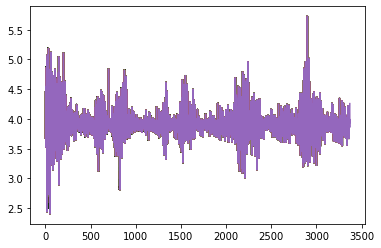

In [20]:
error=[]
accuracy=[]
for epoch in range(5):
    print("epoch",epoch)
    for i in tqdm(range(x_train.shape[0])):
        x_train_ind=np.expand_dims(x_train[i],axis=0)
        met=model.fit(np.asarray(x_train_ind).astype(np.float32),np.asarray(y_train[i]).astype(np.float32),batch_size=1,epochs=1)
        error.append(met.history['loss'])
        if(i%5==0):
            plt.plot(error)
        

In [21]:
model.save("capstone-Model-cnn-V2-onehotencoding.h5")

In [22]:
np.array(ed.iloc[0][:-1])

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

In [23]:
x_train_ind=np.expand_dims(x_train[0],axis=0)
pred=model.predict(x_train_ind)

In [24]:
x_train_pred=[]
for i in tqdm(range(x_train.shape[0])):
    x_train_ind=np.expand_dims(x_train[i],axis=0)
    pred=model.predict(x_train_ind)
    pred=words[np.argmax(pred)]
    x_train_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 675/675 [39:45<00:00,  3.53s/it]


In [25]:
x_train_pred

['drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',
 'drink',


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [24]:
a=[1,1,[1,1,1],[1,2]]

In [27]:
del a[1]

[1, [1, 2]]

In [26]:
x_test_pred=[]

for i in tqdm(range(x_test.shape[0])):
    x_test_ind=np.expand_dims(x_test[i],axis=0)
    pred=model.predict(x_test_ind)
    pred=words[np.argmax(pred)]
    x_test_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [07:49<00:00,  3.56s/it]


In [27]:
x_val_pred=[]

for i in tqdm(range(x_val.shape[0])):
    x_val_ind=np.expand_dims(x_val[i],axis=0)
    pred=model.predict(x_val_ind)
    pred=words[np.argmax(pred)]
    x_val_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 158/158 [09:44<00:00,  3.70s/it]


In [28]:
x_val_pred=np.asarray(x_val_pred)
x_test_pred=np.asarray(x_test_pred)
x_train_pred=np.asarray(x_train_pred)

In [29]:
np.unique(x_train_pred)

array(['drink', 'hearing'], dtype='<U7')

In [30]:
y_words_train=np.asarray(y_words_train)
 

In [31]:
np.all([x_train_pred==y_words_train ,x_train_pred=='deaf'],axis=0).sum()/np.all([y_words_train=='deaf'],axis=0).sum()

0.0

In [32]:
np.all(x_train_pred==y_words_train , x_train_pred=='thin')

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
np.all(x_train_pred==y_words_train and x_train_pred=='thin').sum()/(x_train_pred=='thin').sum()

In [ ]:
(x_test_pred==y_words_test).sum()/x_test_pred.shape[0]*100

In [ ]:
(x_val_pred==y_words_val).sum()/x_val_pred.shape[0]*100